<center><font size=6> Bank Churn Prediction </font></center>

#Problem Statement



### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Import Libraries

In [44]:
# data libraries
import pandas as pd
import numpy as np

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# to avoid warnings
import warnings
warnings.filterwarnings('ignore')

# Test and train split
from sklearn.model_selection import train_test_split

# neural network libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras import backend as K
from tensorflow.keras.metrics import Recall


# review model performance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, recall_score, precision_score, f1_score

# model tunings
import optuna

# for under and oversampling the Exited Data
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# miscellaneous libraries
import time
import random
from sklearn.preprocessing import StandardScaler


## Import Dataset

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#churn_data = pd.read_csv('/content/drive/MyDrive/UT/Project 4/Churn.csv')

In [2]:
churn_data = pd.read_csv('Churn.csv')

In [3]:
df = churn_data.copy()

## Exploratory Data Analysis

### Initial Data Review

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 14)

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


**Initial Data Observations**
* Looks like `RowNumber` and `CustomerId` are unique and will not provide value since we already have that covered from index. Therefore we're going to drop those columns
* We have 3 object columns that will need to be treated later on. However, `Surname` will likely also need to be dropped. Needs a closer look
* `Gender` will need to be adjusted to integer values of 0 and 1
* `IsActiveMember` needs a closer look. Just looking at the first 5 rows, we can see that even if the Customer is active, they will can attrite.
* There are no null or duplicated values in the churn dataset
* We have 3 columns that are `true` or `false`, which are `HasCrCard`, `IsActiveMember`, and our target column, `Exited`
* We can assume that the bank offers 4 total different products since that's the max in that column. This can be either categorical or numerical, but we'll leave as is: numerical.

### Univariate Analysis

#### `RowNumber` and `CustomerId`

In [10]:
df['RowNumber'].nunique()

10000

In [11]:
df['CustomerId'].nunique()

10000

**Drop `RowNumber` and `CustomerId`**
* Just to double check, we reviewed the number of unique values in each of the columns above and confirmed that there are the same amount of unique values as there are rows. We'll move forward with dropping these values.

In [12]:
df.drop(['RowNumber', 'CustomerId'], axis=1, inplace=True)

#### Categorical

##### `Surname`

In [13]:
df['Surname'].value_counts()

Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64

In [14]:
df['Surname'].nunique()/len(df)*100

29.32

In [15]:
df.drop('Surname', axis=1, inplace=True)

* After reviewing `Surname` we can see that there are over 2,900 different values for the last names of Bank Customers.
* Due to the characteristics of the `Surname` as it relates to potential importance to churn, and the number of unique values, we've dropped that from the dataframe.

In [16]:
df_num = df.select_dtypes(include='number')
df_cat = df.select_dtypes(exclude='number')

##### `Geography`

In [17]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

* For this column, we have three values: France, Germany, and Spain

##### Gender

In [18]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

#### Numerical

##### Initial review

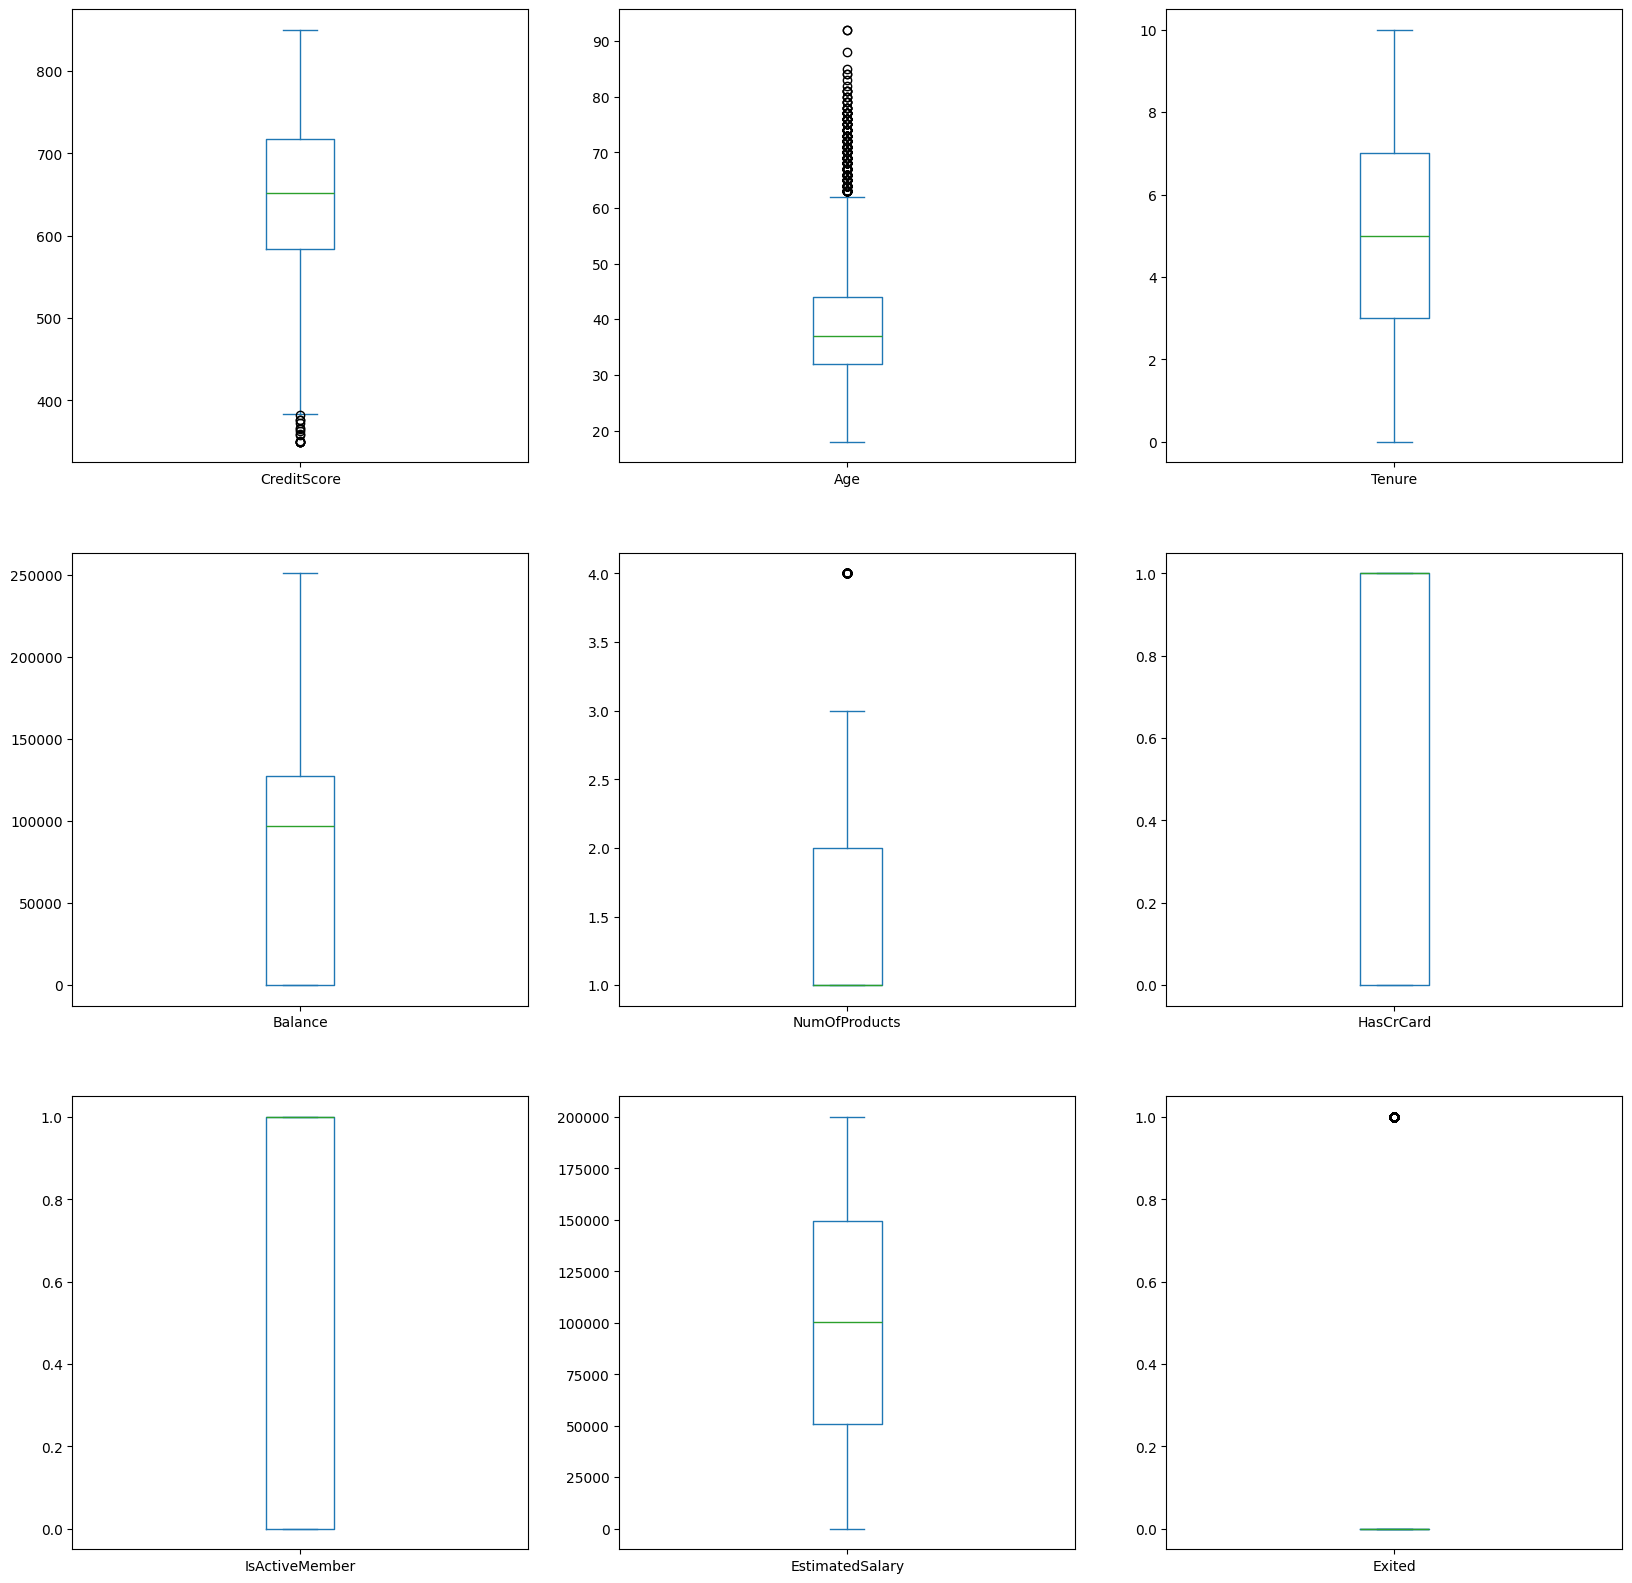

In [19]:
df_num.plot(kind = 'box', subplots = True, figsize = (20, 20), layout = (3, 3), sharex = False, sharey = False)
plt.show();

**Observations from Boxplot**
* `CreditScore`, `Age`, and `NumberOfProducts` are the only non-target columns with outliers.
* `CreditScore` outliers fall below what's considered 'Very Poor' Credit Score according to FICO.
* For `Age`, we can see Customers that are above the age of ~62 are outside the core Customer base
* For `NumberOfProducts`, most Customers either have 1 or 2, with some at 3, but those with 4 make up a small percentage of the base.

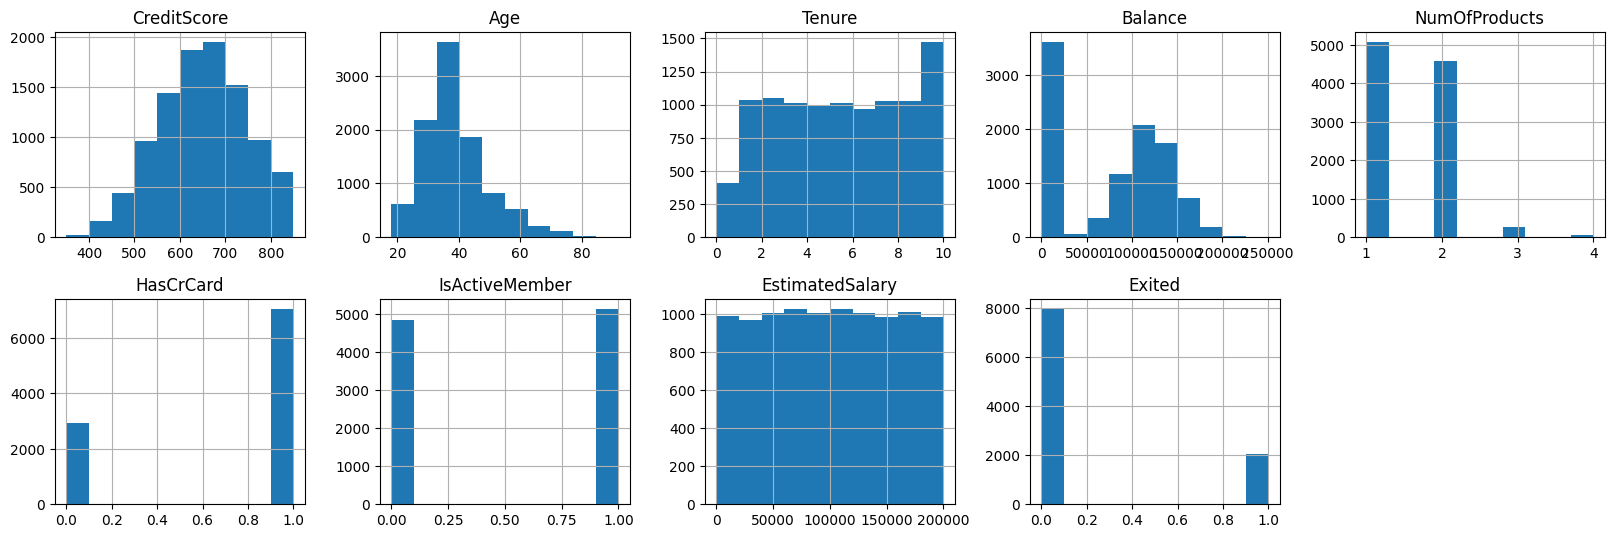

In [20]:
df_num.hist(layout = (6, 5), figsize = (20, 20))
plt.show();

**Observations from Histogram**
* `CreditScore` has somewhat of a normal distribution
* `Age` is right skewed with most of the CUstomers landing under 40 years of age
* `Tenure`  and `EstimatedSalare` are uniform
* Most customers have a $0 `Balance`, and this distribution could cause some issues from bias and weights of thee model. This is a column to keep an eye on.

##### Closer look into Certain Columns

###### `Exited`

In [21]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [22]:
df['Exited'].value_counts()/len(df)*100

Exited
0    79.63
1    20.37
Name: count, dtype: float64

**Observations**
* There is an 80/20 split between Customers that have stayed vs left, respectively. This could require balancing out the data to be analyzed. Will need to import imbalance `SMOTE` and `RandomUndersampler`

#### Bivariate Analysis

In [23]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [24]:
### Function to plot distributions

def distribution_plot(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

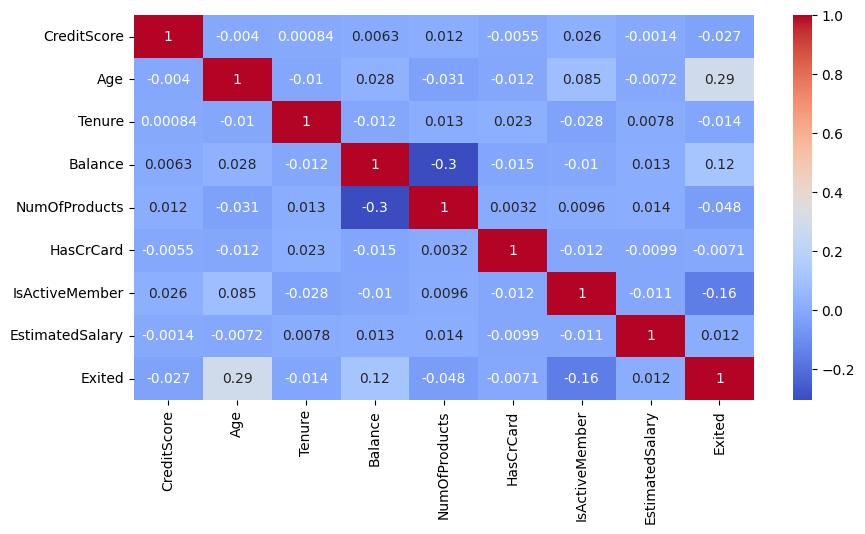

In [25]:
plt.figure(figsize = (10, 5))
sns.heatmap(df_num.corr(), annot = True, cmap = 'coolwarm')
plt.show();

**Observations from Correlation Matrix**
* Strongest correlation is a negative one between `NumOfProducts` and `Balance`
* Second strongest is a postive correlation between our target variable, `Exited`, and `Age`. We can assume that the older someone is, and the longer they've been with the bank, the less likely they are to attrite. However, there is little to no correlation between `Tenure` and `Age`.

###### `Exited` versus Categorical Columns

----------------------------------------
Geography
Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


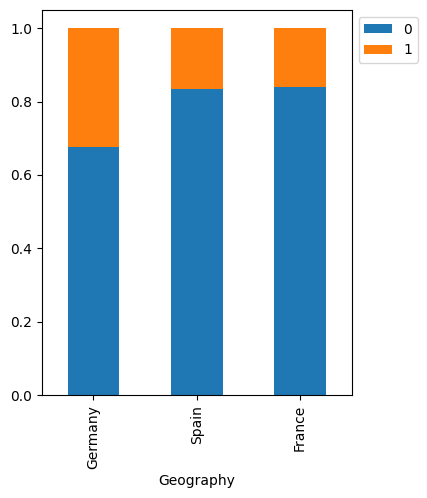

----------------------------------------
Gender
Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


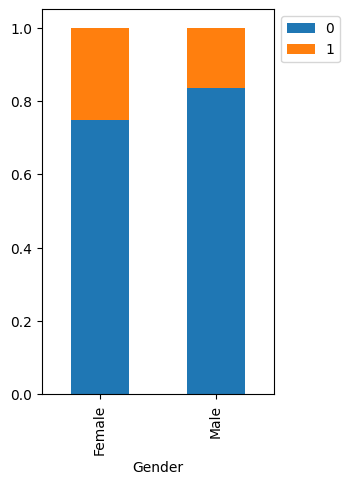

In [26]:
for col in df_cat.columns:
    print("--"*20)
    print(col)
    stacked_barplot(df, col, 'Exited')

**Observations from Bivariate Categorical**
* Women make up a lesser percentage of the overall Customer base, but are more likely to attrite
* Germans make up the second most of the Customer base, and more more likely to attrite

###### `Exited` vs. Numerical Columns

----------------------------------------
CreditScore


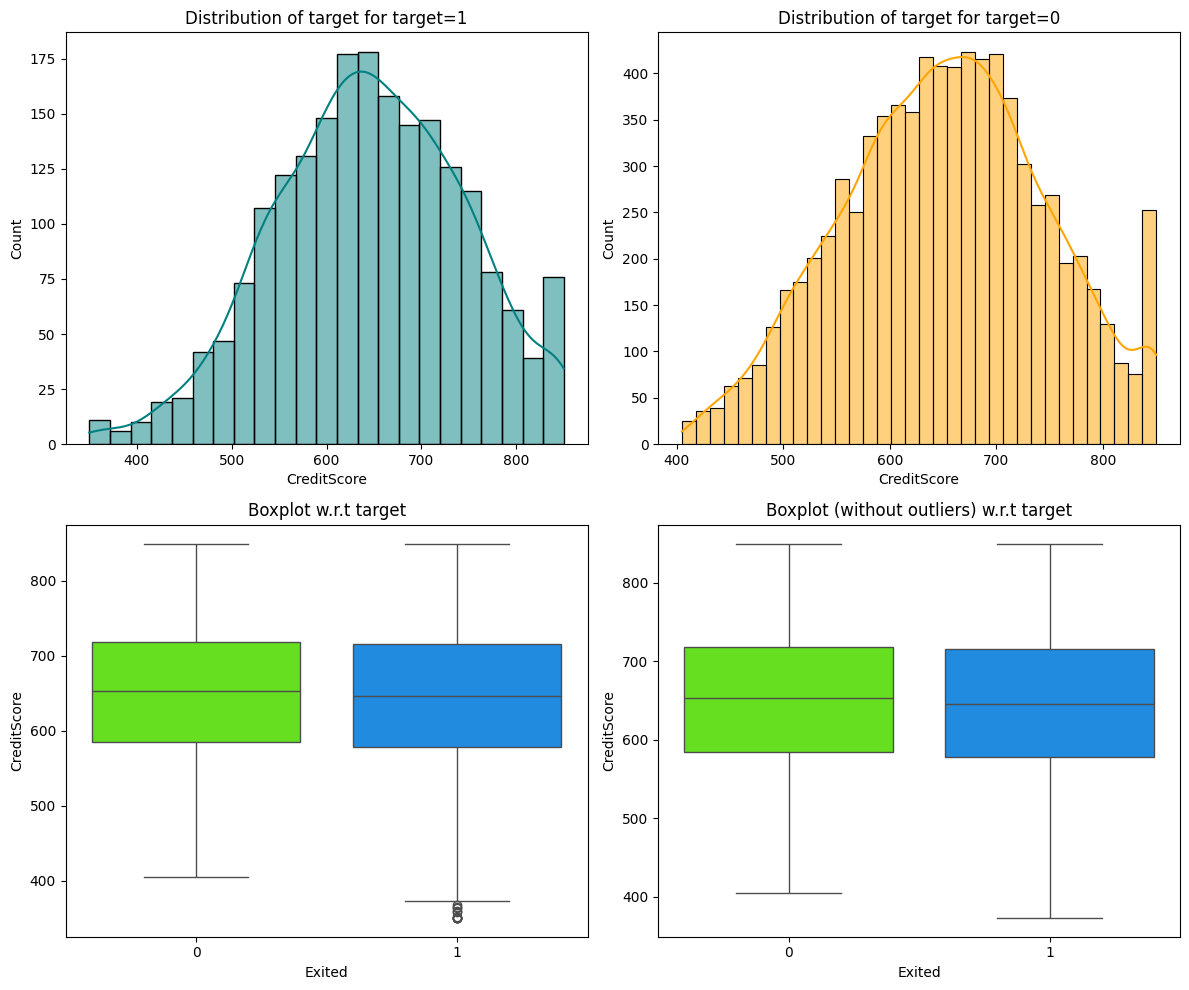

----------------------------------------
Age


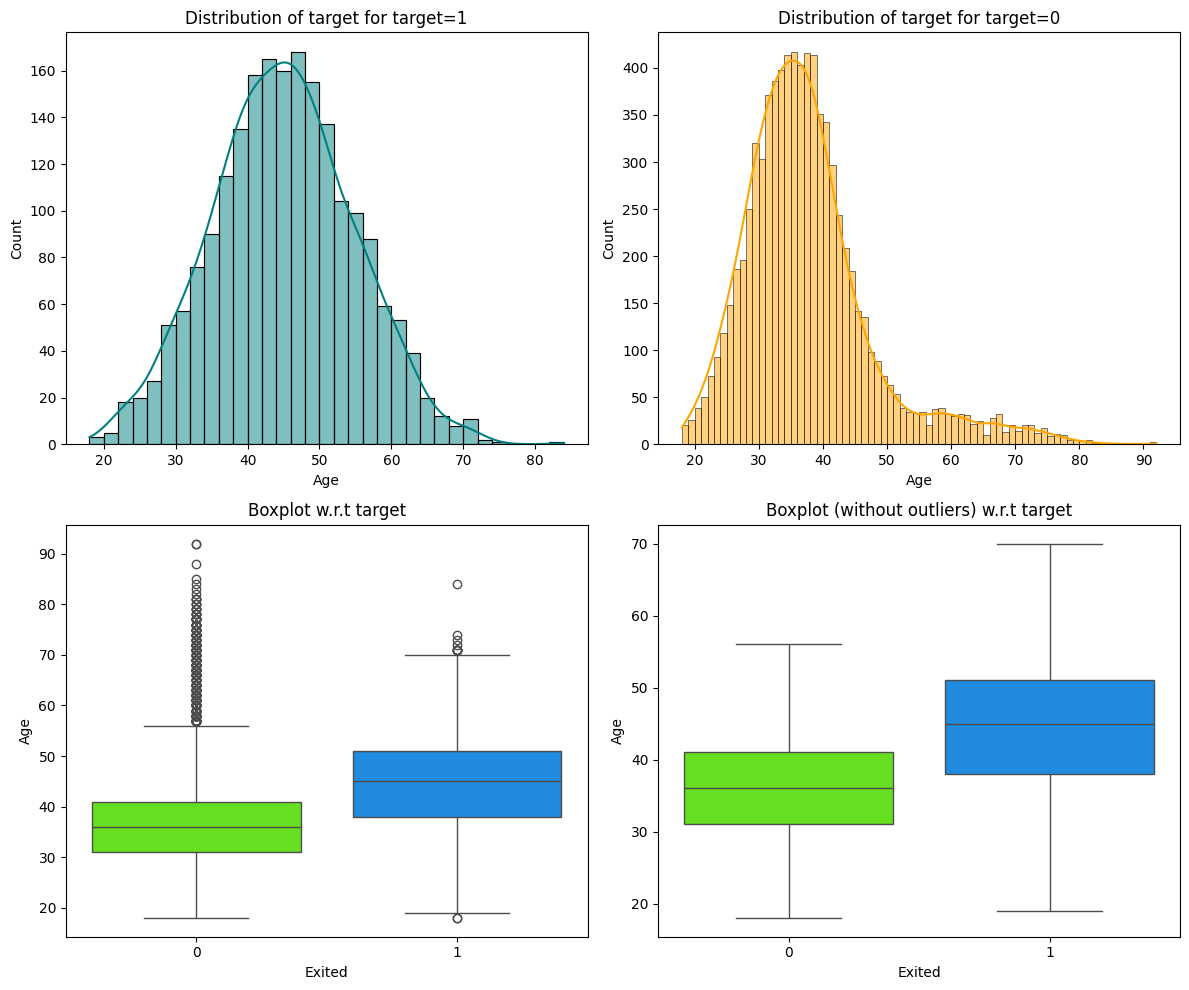

----------------------------------------
Tenure


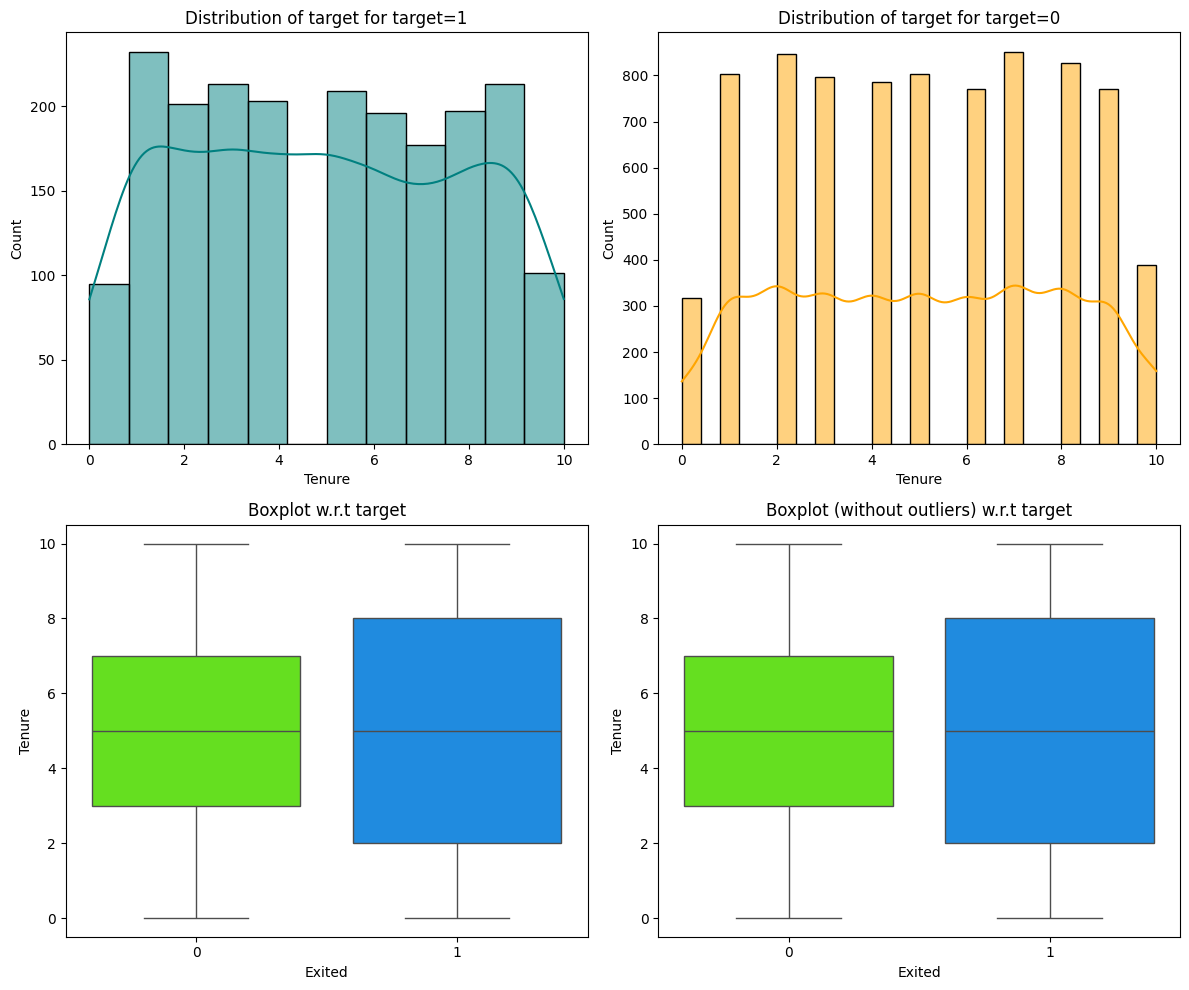

----------------------------------------
Balance


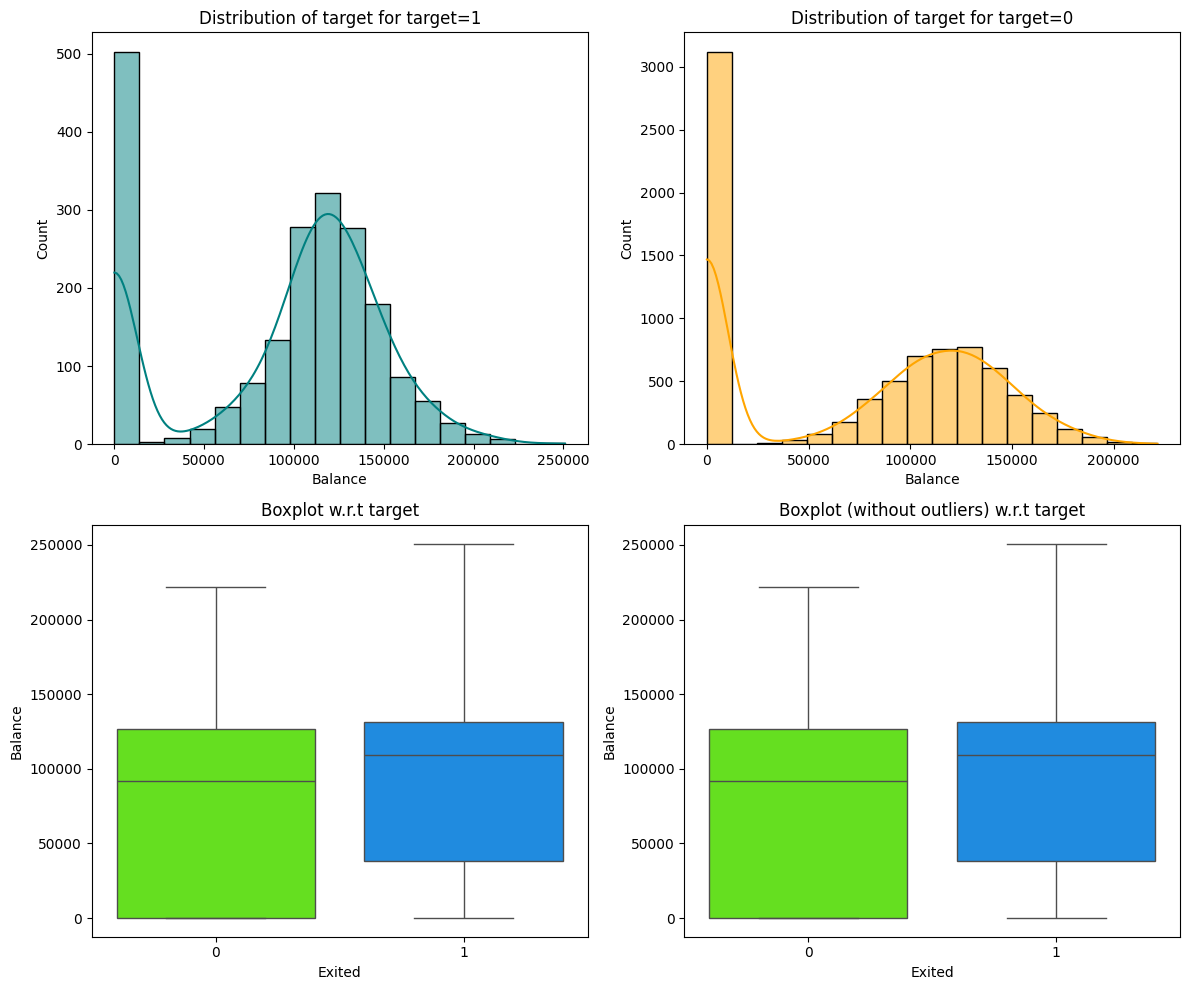

----------------------------------------
NumOfProducts


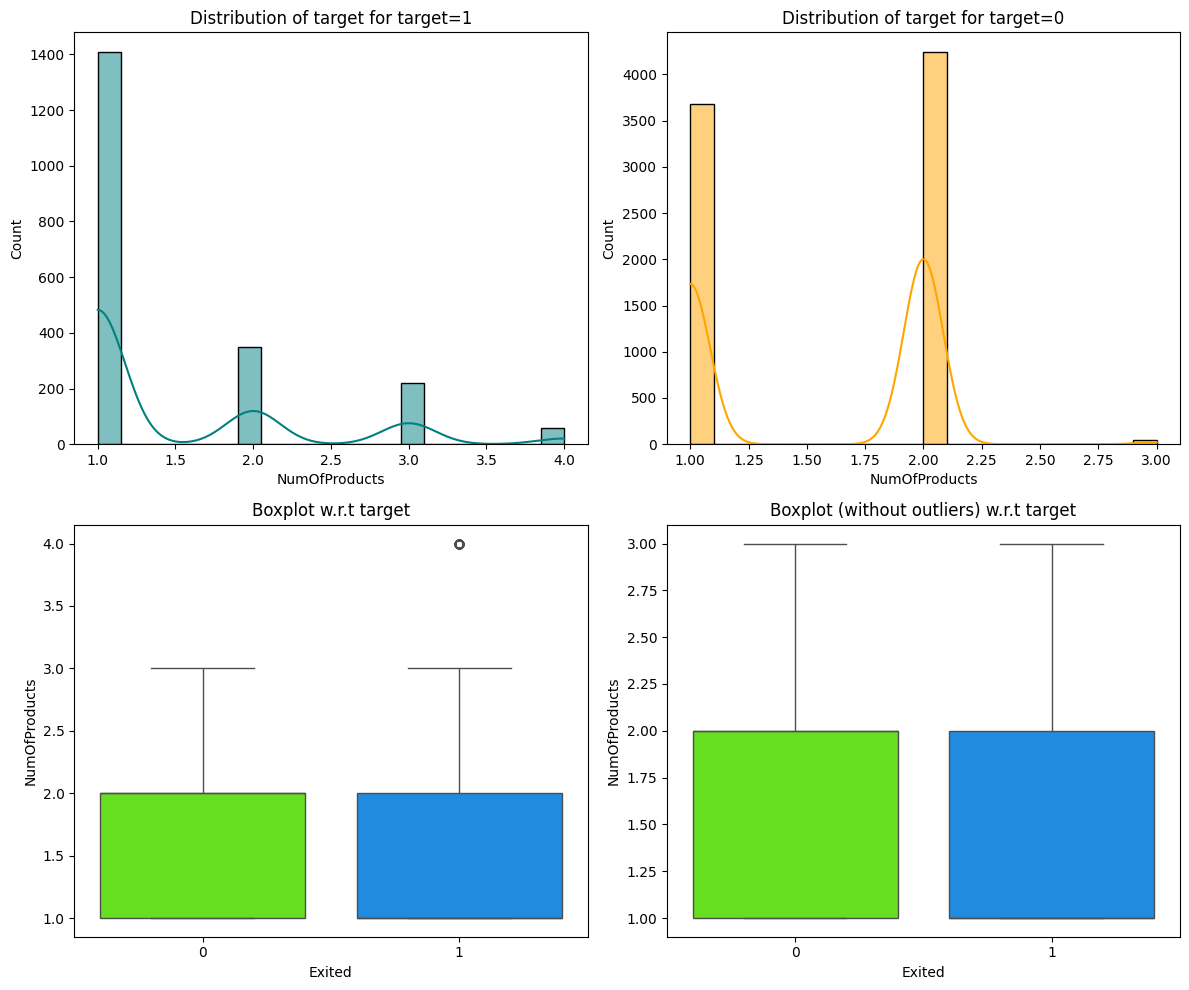

----------------------------------------
HasCrCard


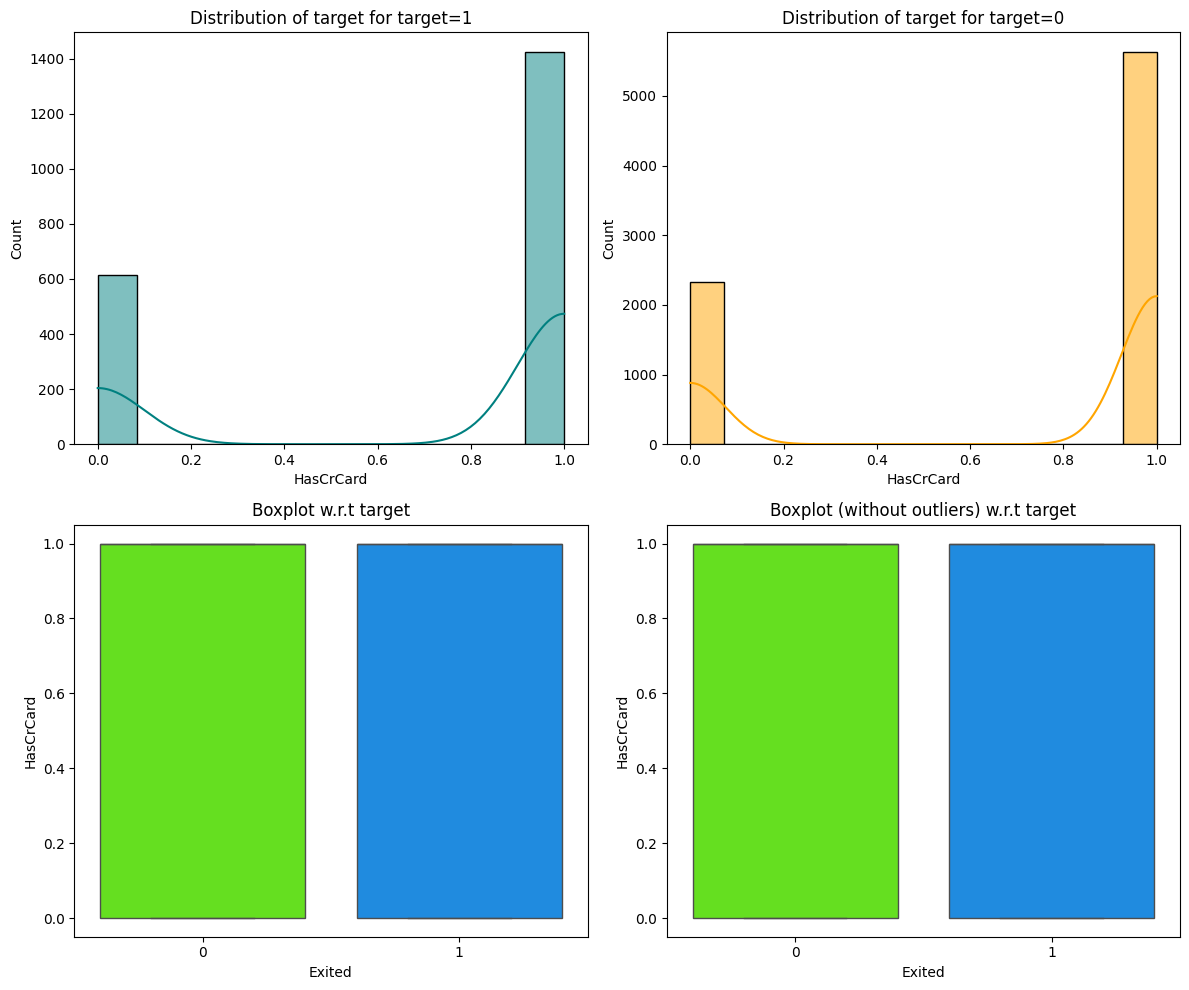

----------------------------------------
IsActiveMember


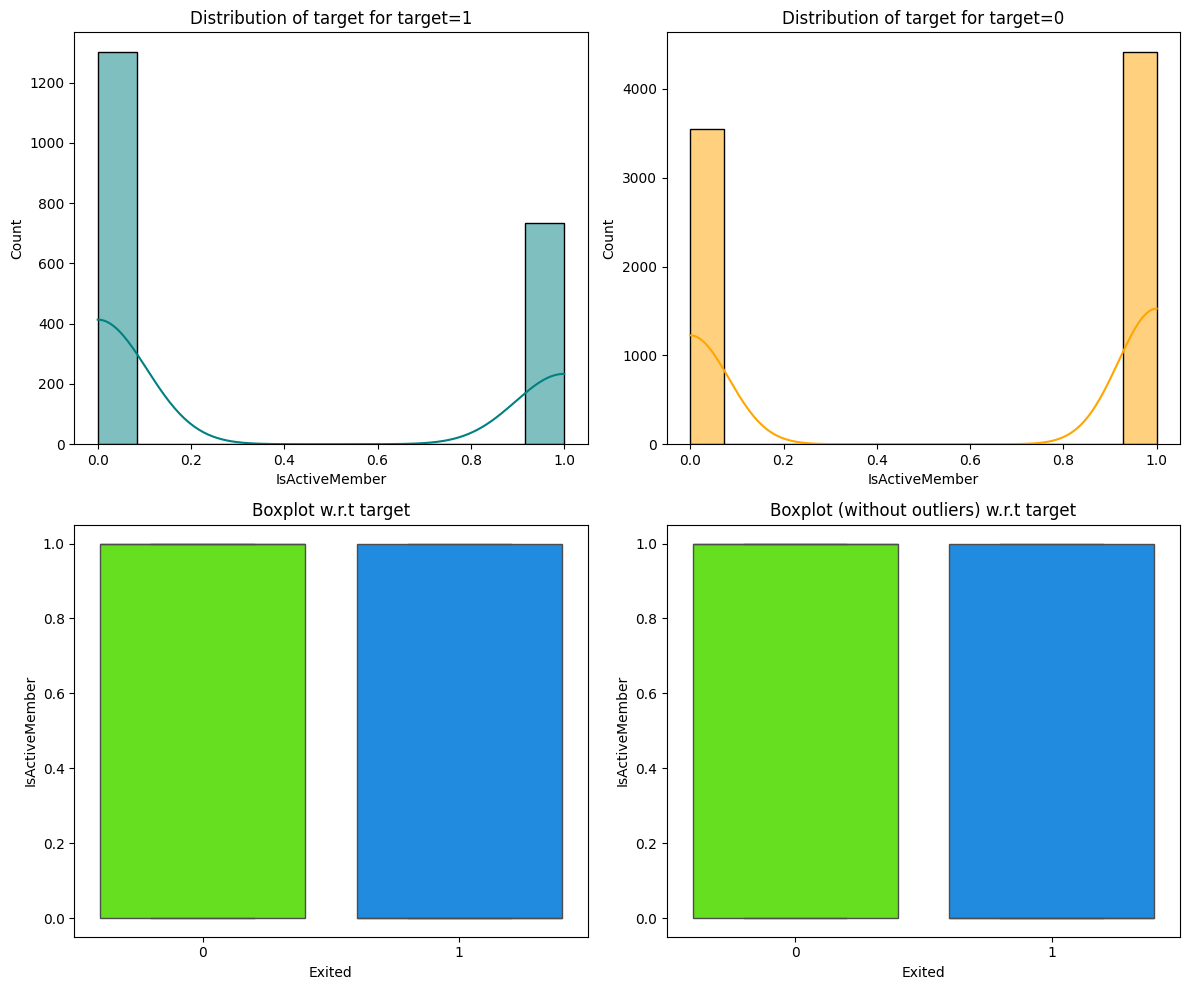

----------------------------------------
EstimatedSalary


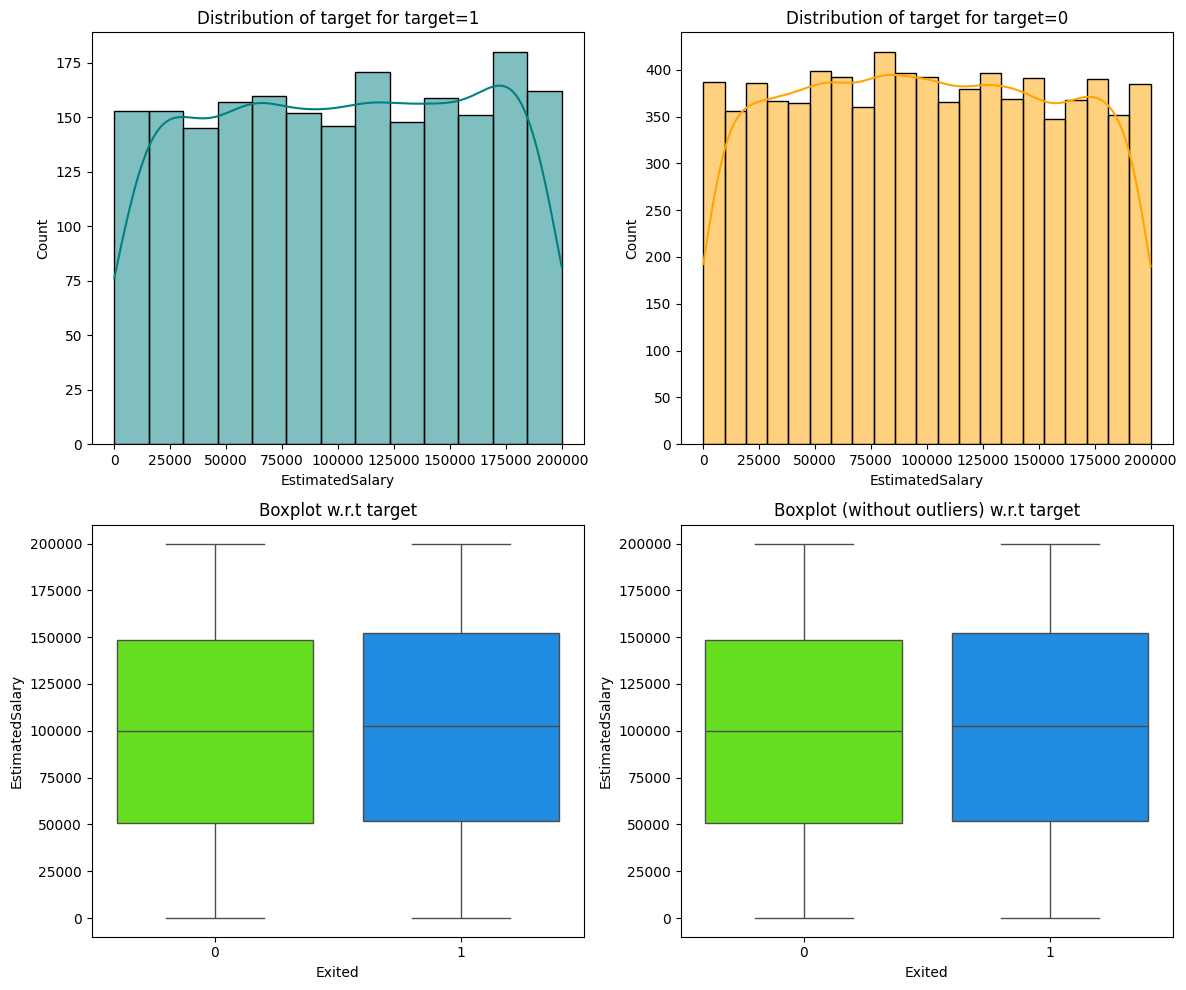

In [27]:
for col in df_num.columns:
    if col == 'Exited': #we want it to do this for all columns except for the target variable
        continue
    print("--"*20)
    print(col)
    distribution_plot(df, col, 'Exited')

**Observations**
* The biggest change when analyzing `Exited` versus any of the numerical columns, is that when we remove the outliers from `Age`, the characteristic of the histogram changes from a more uniform distribution to a right skewed, biasing towards a younger Customer base.
* Taking a closer look at `IsActiveMember` and `Exited`, we can see that there doesn't appear to be any value to the prediction of `Exited`. Therefore, we'll go ahead and remove this column, as well.

In [28]:
df.drop('IsActiveMember', axis = 1, inplace = True)


In [29]:
df_num.drop('IsActiveMember', axis = 1, inplace = True)

## Data Pre-processing

* Split the target variable and predictors (y = `Exited`)
* Split the data into train and test (and val?)
* Categorical encoding

In [30]:
# split data
X = df.drop('Exited', axis = 1)
y = df['Exited']

In [31]:
# Adjust categorical columns to boolean for model
X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True, dtype=float)

In [32]:
num_cols = df_num.columns.tolist()
num_cols.remove('Exited')
num_cols
X[num_cols] = StandardScaler().fit_transform(X[num_cols])

In [33]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.021886,0.0,0.0,0.0
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.216534,0.0,1.0,0.0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,0.240687,0.0,0.0,0.0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-0.108918,0.0,0.0,0.0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,-0.365276,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-0.066419,0.0,0.0,1.0
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.027988,0.0,0.0,1.0
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,-1.008643,0.0,0.0,0.0
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-0.125231,1.0,0.0,1.0


### Train, Validation, Test Split

In [34]:
# split between test and temp
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify = y_temp)

In [36]:
# SMOTE Train Data
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [37]:
# undersample data
unsamp = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = unsamp.fit_resample(X_train, y_train)

In [38]:
print(
    "Training data shape: \n\n",
    "X:", X_train.shape,"\n",
    "y:", y_train.shape,
    "\n\nValidation Data Shape: \n\n",
    "X:", X_val.shape,"\n",
    "y:", y_val.shape,
    "\n\nTesting Data Shape: \n\n",
    "X:", X_test.shape,"\n",
    "y:", y_test.shape
)

Training data shape: 

 X: (6000, 10) 
 y: (6000,) 

Validation Data Shape: 

 X: (2000, 10) 
 y: (2000,) 

Testing Data Shape: 

 X: (2000, 10) 
 y: (2000,)


## Model Building

Rubric Requirements:
* Choose metric of choice with proper rationale: The focus should be on reducing as many false negatives as possible, so the appropriate metric of choice should be `Recall`.
* Train Neural Network with SGD as an Optimizer
* Comment on Model Performance

In [39]:
# clear current Keras session
tf.keras.backend.clear_session()
# set randomseed generator
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [40]:
# initial the neural network
model_0 = Sequential()
model_0.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model_0.add(Dense(64, activation='relu'))
model_0.add(Dense(1, activation='sigmoid'))


In [54]:
# compile NN model
#metric = Recall()
model_0.compile(loss = 'binary_crossentropy', optimizer='SGD', metrics=['recall'])

In [55]:
batch_size = 32
epochs = 10

history_0 = model_0.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_val, y_val),
                        verbose=1
                        )



Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3637 - recall: 0.3778 - val_loss: 0.3709 - val_recall: 0.3505
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - loss: 0.3619 - recall: 0.3904 - val_loss: 0.3697 - val_recall: 0.3554
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - loss: 0.3603 - recall: 0.3944 - val_loss: 0.3687 - val_recall: 0.3652
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - loss: 0.3590 - recall: 0.4013 - val_loss: 0.3678 - val_recall: 0.3701
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 0.3578 - recall: 0.4021 - val_loss: 0.3670 - val_recall: 0.3775
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 0.3568 - recall: 0.4071 - val_loss: 0.3664 - val_recall: 0.3775
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 0.3559 - recall: 0.4085 - val_loss: 0.3659 - val_recall: 0.3775
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - loss: 0.3551 - recall: 0.4111 - val_loss: 0.3655 - val_recall: 0

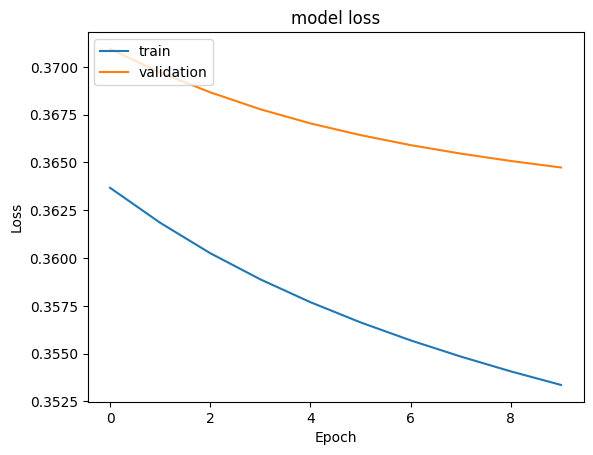

In [57]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

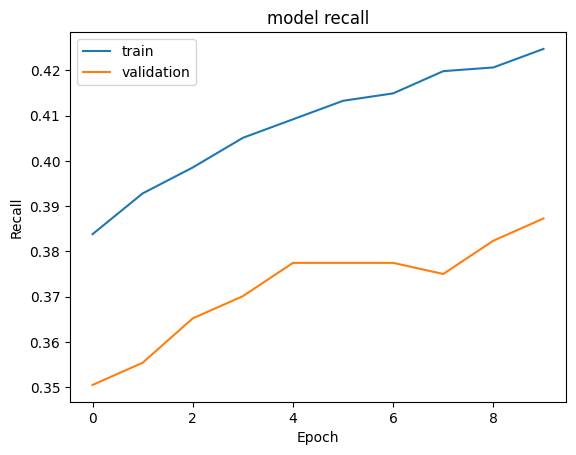

In [56]:
#Plotting Train recall vs Validation recall
plt.plot(history_0.history['recall'])
plt.plot(history_0.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [58]:
# adjust outputs
y_pred_val = model_0.predict(X_val)
y_pred_val = (y_pred_val > 0.5)

y_pred_train = model_0.predict(X_train)
y_pred_train = (y_pred_train > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step


In [59]:
#lassification report
cr = classification_report(y_train, y_pred_train)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4778
           1       0.74      0.43      0.54      1222

    accuracy                           0.85      6000
   macro avg       0.80      0.69      0.73      6000
weighted avg       0.84      0.85      0.84      6000



##### Review Outputs

In [60]:
def make_confusion_matrix(title, actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.title(title)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [61]:
# Evaluation Function
def show_scores(model):
    scores = {"Training Recall": recall_score(y_train, y_pred_train),
              "Validation Recall": recall_score(y_val, y_pred_val),
              "Training Precision": precision_score(y_train, y_pred_train),
              "Validation Precision": precision_score(y_val, y_pred_val),
              "Training F1 Score": f1_score(y_train, y_pred_train),
              "Validation F1 Score": f1_score(y_val, y_pred_val),}
    return scores

In [62]:
# Evaluation Function
def show_scores_over(model):
    scores = {"Training Recall": recall_score(y_train_over, y_pred_train),
              "Validation Recall": recall_score(y_val, y_pred_val),
              "Training Precision": precision_score(y_train_over, y_pred_train),
              "Validation Precision": precision_score(y_val, y_pred_val),
              "Training F1 Score": f1_score(y_train_over, y_pred_train),
              "Validation F1 Score": f1_score(y_val, y_pred_val),}
    return scores

In [63]:
# Evaluation Function
def show_scores_under(model):
    scores = {"Training Recall": recall_score(y_train_un, y_pred_train),
              "Validation Recall": recall_score(y_val, y_pred_val),
              "Training Precision": precision_score(y_train_un, y_pred_train),
              "Validation Precision": precision_score(y_val, y_pred_val),
              "Training F1 Score": f1_score(y_train_un, y_pred_train),
              "Validation F1 Score": f1_score(y_val, y_pred_val),}
    return scores

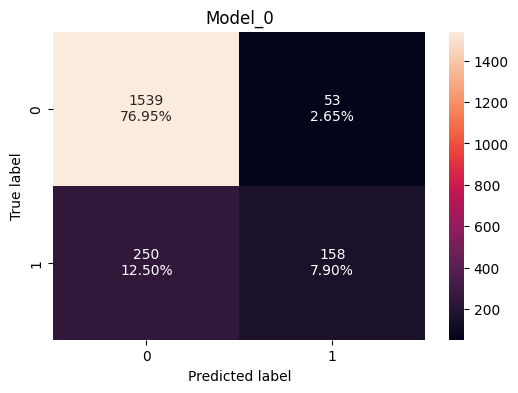

In [64]:
make_confusion_matrix("Model_0", y_val, y_pred_val)

In [65]:
show_scores(model_0)

{'Training Recall': 0.4288052373158756,
 'Validation Recall': 0.3872549019607843,
 'Training Precision': 0.7359550561797753,
 'Validation Precision': 0.7488151658767772,
 'Training F1 Score': 0.5418821096173733,
 'Validation F1 Score': 0.5105008077544426}

In [66]:
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,731 (38.02 KB)

 Trainable params: 9,729 (38.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [68]:
model_summary = pd.DataFrame({'Model': ['model_0: SGD'],
                             **show_scores(model_0)})


## Model Performance Improvement and Final Model Selection

* Use different methods to improve the model performance:
  * model_1: Build model with Adam optimizer
  * model_2: Build model with Adam and Dropout
  * model_3: Build model with SMOTE and SGD
  * model_4: Build a model with SMOTE and Adam
  * model_5: Build model with SMOTE, Adam, and Dropout
* Comment on model performance for each of the models
* Choose the best model from the ones built with proper reasoning

In [70]:
# clear current Keras session
tf.keras.backend.clear_session()
# set randomseed generator
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

# Adam
# initial the neural network
model_1 = Sequential()
model_1.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))
model_1.compile(loss = 'binary_crossentropy', optimizer='Adam', metrics=['recall'])
history_1 = model_1.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_val, y_val),
                        verbose=1
                        )

# adjust outputs
y_pred_val = model_1.predict(X_val)
y_pred_val = (y_pred_val > 0.5)

y_pred_train = model_1.predict(X_train)
y_pred_train = (y_pred_train > 0.5)

show_scores(model_1)

model_1_scores = pd.DataFrame({'Model': ['model_1: Adam'],
                             **show_scores(model_1)})
model_summary = pd.concat([model_summary, model_1_scores])



Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4877 - recall: 0.0668 - val_loss: 0.3928 - val_recall: 0.2304
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 0.3793 - recall: 0.3234 - val_loss: 0.3742 - val_recall: 0.3284
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - loss: 0.3623 - recall: 0.3943 - val_loss: 0.3707 - val_recall: 0.3456
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - loss: 0.3566 - recall: 0.4073 - val_loss: 0.3688 - val_recall: 0.3652
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 0.3525 - recall: 0.4256 - val_loss: 0.3680 - val_recall: 0.3824
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - loss: 0.3492 - recall: 0.4335 - val_loss: 0.3676 - val_recall: 0.3946
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 0.3467 - recall: 0.4392 - val_loss: 0.3676 - val_recall: 0.4020
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - loss: 0.3442 - recall: 0.4440 - val_loss: 0.3679 - val_recall: 0

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5168 - recall: 0.0926 - val_loss: 0.4091 - val_recall: 0.1985
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - loss: 0.4086 - recall: 0.2496 - val_loss: 0.3787 - val_recall: 0.3162
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 0.3832 - recall: 0.3420 - val_loss: 0.3724 - val_recall: 0.3431
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 0.3750 - recall: 0.3782 - val_loss: 0.3703 - val_recall: 0.3480
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 0.3714 - recall: 0.3701 - val_loss: 0.3668 - val_recall: 0.3676
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.3643 - recall: 0.4171 - val_loss: 0.3661 - val_recall: 0.3824
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 0.3612 - recall: 0.3967 - val_loss: 0.3650 - val_recall: 0.3995
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - loss: 0.3594 - recall: 0.4136 - val_loss: 0.3651 - val_recall: 0

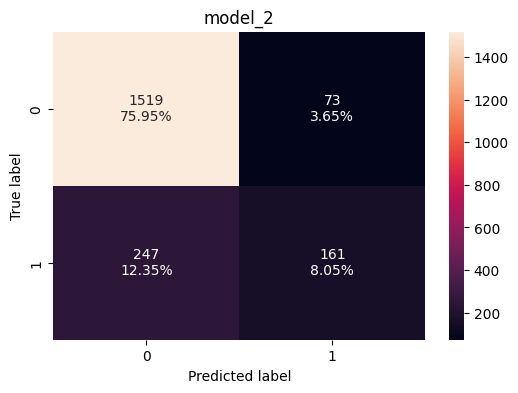

In [71]:
# clear current Keras session
tf.keras.backend.clear_session()
# set randomseed generator
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

# Adam and dropout
model_2 = Sequential()
model_2.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model_2.add(Dropout(0.2))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation='sigmoid'))
model_2.compile(loss = 'binary_crossentropy', optimizer='Adam', metrics=['recall'])
history_2 = model_2.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_val, y_val),
                        verbose=1
                        )

# adjust outputs
y_pred_val = model_2.predict(X_val)
y_pred_val = (y_pred_val > 0.5)

y_pred_train = model_2.predict(X_train)
y_pred_train = (y_pred_train > 0.5)


#show scores
show_scores(model_2)

#add to dataframe
model_scores = pd.DataFrame({'Model': ['model_2: Adam and Dropout'],
                             **show_scores(model_2)})
model_summary = pd.concat([model_summary, model_scores])

In [72]:
# clear current Keras session
tf.keras.backend.clear_session()
# set randomseed generator
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

# SMOTE and SGD
model_3 = Sequential()
model_3.add(Dense(128, activation='relu', input_shape=(X_train_over.shape[1],)))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))
model_3.compile(loss = 'binary_crossentropy', optimizer='SGD', metrics=['recall'])
history_3 = model_3.fit(X_train_over, y_train_over,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_val, y_val),
                        verbose=1
                        )

# adjust outputs
y_pred_val = model_3.predict(X_val)
y_pred_val = (y_pred_val > 0.5)

y_pred_train = model_3.predict(X_train_over)
y_pred_train = (y_pred_train > 0.5)

#show scores
show_scores_over(model_3)

#add to dataframe
model_scores = pd.DataFrame({'Model': ['model_3: SGD and SMOTE'],
                             **show_scores_over(model_3)})
model_summary = pd.concat([model_summary, model_scores])

Epoch 1/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 847us/step - loss: 0.6847 - recall: 0.5081 - val_loss: 0.6419 - val_recall: 0.7500
Epoch 2/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - loss: 0.6096 - recall: 0.7816 - val_loss: 0.5909 - val_recall: 0.7157
Epoch 3/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - loss: 0.5685 - recall: 0.7584 - val_loss: 0.5610 - val_recall: 0.7206
Epoch 4/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - loss: 0.5424 - recall: 0.7694 - val_loss: 0.5391 - val_recall: 0.7451
Epoch 5/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 0.5211 - recall: 0.7842 - val_loss: 0.5206 - val_recall: 0.7549
Epoch 6/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 0.5022 - recall: 0.7948 - val_loss: 0.5055 - val_recall: 0.7647
Epoch 7/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 0.4867 - recall: 0.7974 - val_loss: 0.4941 - val_recall: 0.7598
Epoch 8/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - loss: 0.4751 - recall: 0.8032 - val_loss: 0.4860 - val_recall:

In [74]:
# clear current Keras session
tf.keras.backend.clear_session()
# set randomseed generator
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

# SGD, SMOTE, and Dropout
model_4 = Sequential()
model_4.add(Dense(128, activation='relu', input_shape=(X_train_over.shape[1],)))
model_4.add(Dropout(0.2))
model_4.add(Dense(64, activation='relu'))
model_4.add(Dropout(0.2))
model_4.add(Dense(1, activation='sigmoid'))
model_4.compile(loss = 'binary_crossentropy', optimizer='SGD', metrics=['recall'])
history_4 = model_4.fit(X_train_over, y_train_over,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_val, y_val),
                        verbose=1
                        )

# adjust outputs
y_pred_val = model_4.predict(X_val)
y_pred_val = (y_pred_val > 0.5)

y_pred_train = model_4.predict(X_train_over)
y_pred_train = (y_pred_train > 0.5)

#show scores
show_scores_over(model_4)

#add to dataframe
model_scores = pd.DataFrame({'Model': ['model_4: SGD, SMOTE, and Dropout'],
                             **show_scores_over(model_4)})
model_summary = pd.concat([model_summary, model_scores])

Epoch 1/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 961us/step - loss: 0.6847 - recall: 0.7055 - val_loss: 0.6432 - val_recall: 0.6887
Epoch 2/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - loss: 0.6251 - recall: 0.7291 - val_loss: 0.5990 - val_recall: 0.7010
Epoch 3/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 0.5916 - recall: 0.7266 - val_loss: 0.5688 - val_recall: 0.7059
Epoch 4/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 0.5633 - recall: 0.7520 - val_loss: 0.5484 - val_recall: 0.7206
Epoch 5/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - loss: 0.5451 - recall: 0.7623 - val_loss: 0.5310 - val_recall: 0.7328
Epoch 6/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 0.5297 - recall: 0.7704 - val_loss: 0.5161 - val_recall: 0.7451
Epoch 7/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - loss: 0.5213 - recall: 0.7719 - val_loss: 0.5080 - val_recall: 0.7574
Epoch 8/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 0.5060 - recall: 0.7830 - val_loss: 0.4978 - val_recall:

In [75]:
# clear current Keras session
tf.keras.backend.clear_session()
# set randomseed generator
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

# SMOTE and Adam
model_5 = Sequential()
model_5.add(Dense(128, activation='relu', input_shape=(X_train_over.shape[1],)))
model_5.add(Dense(64, activation='relu'))
model_5.add(Dense(1, activation='sigmoid'))
model_5.compile(loss = 'binary_crossentropy', optimizer='Adam', metrics=['recall'])
history_5 = model_5.fit(X_train_over, y_train_over,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_val, y_val),
                        verbose=1
                        )

# adjust outputs
y_pred_val = model_5.predict(X_val)
y_pred_val = (y_pred_val > 0.5)

y_pred_train = model_5.predict(X_train_over)
y_pred_train = (y_pred_train > 0.5)

#show scores
show_scores_over(model_5)

#add to dataframe
model_scores = pd.DataFrame({'Model': ['model_5: Adam and SMOTE'],
                             **show_scores_over(model_5)})
model_summary = pd.concat([model_summary, model_scores])

Epoch 1/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 967us/step - loss: 0.5725 - recall: 0.7276 - val_loss: 0.4751 - val_recall: 0.7475
Epoch 2/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - loss: 0.4526 - recall: 0.8079 - val_loss: 0.4659 - val_recall: 0.7279
Epoch 3/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 0.4370 - recall: 0.8074 - val_loss: 0.4614 - val_recall: 0.7181
Epoch 4/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - loss: 0.4263 - recall: 0.8131 - val_loss: 0.4591 - val_recall: 0.7108
Epoch 5/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - loss: 0.4169 - recall: 0.8164 - val_loss: 0.4585 - val_recall: 0.7059
Epoch 6/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - loss: 0.4086 - recall: 0.8248 - val_loss: 0.4572 - val_recall: 0.6838
Epoch 7/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - loss: 0.4007 - recall: 0.8258 - val_loss: 0.4562 - val_recall: 0.6863
Epoch 8/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 0.3928 - recall: 0.8351 - val_loss: 0.4550 - val_recall:

In [76]:
# clear current Keras session
tf.keras.backend.clear_session()
# set randomseed generator
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

# Adam, SMOTE, and Dropout
model_6 = Sequential()
model_6.add(Dense(128, activation='relu', input_shape=(X_train_over.shape[1],)))
model_6.add(Dropout(0.2))
model_6.add(Dense(64, activation='relu'))
model_6.add(Dropout(0.2))
model_6.add(Dense(1, activation='sigmoid'))
model_6.compile(loss = 'binary_crossentropy', optimizer='Adam', metrics=['recall'])
history_6 = model_6.fit(X_train_over, y_train_over,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_val, y_val),
                        verbose=1
                        )

# adjust outputs
y_pred_val = model_6.predict(X_val)
y_pred_val = (y_pred_val > 0.5)

y_pred_train = model_6.predict(X_train_over)
y_pred_train = (y_pred_train > 0.5)

#show scores
show_scores_over(model_6)

#add to dataframe
model_scores = pd.DataFrame({'Model': ['model_6: Adam, SMOTE, and Dropout'],
                             **show_scores_over(model_6)})
model_summary = pd.concat([model_summary, model_scores])

Epoch 1/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5954 - recall: 0.7503 - val_loss: 0.4805 - val_recall: 0.7377
Epoch 2/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - loss: 0.4772 - recall: 0.7879 - val_loss: 0.4795 - val_recall: 0.7500
Epoch 3/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - loss: 0.4662 - recall: 0.8025 - val_loss: 0.4718 - val_recall: 0.7426
Epoch 4/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 0.4548 - recall: 0.8007 - val_loss: 0.4682 - val_recall: 0.7377
Epoch 5/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 0.4478 - recall: 0.7977 - val_loss: 0.4626 - val_recall: 0.7279
Epoch 6/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 0.4414 - recall: 0.8012 - val_loss: 0.4619 - val_recall: 0.7255
Epoch 7/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - loss: 0.4343 - recall: 0.8137 - val_loss: 0.4581 - val_recall: 0.7083
Epoch 8/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - loss: 0.4300 - recall: 0.8119 - val_loss: 0.4593 - val_recall: 0

In [77]:
# clear current Keras session
tf.keras.backend.clear_session()
# set randomseed generator
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

# SGD and RandomUnderSampler
model_7 = Sequential()
model_7.add(Dense(128, activation='relu', input_shape=(X_train_un.shape[1],)))
model_7.add(Dense(64, activation='relu'))
model_7.add(Dense(1, activation='sigmoid'))
model_7.compile(loss = 'binary_crossentropy', optimizer='SGD', metrics=['recall'])
history_7 = model_7.fit(X_train_un, y_train_un,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_val, y_val),
                        verbose=1
                        )

# adjust outputs
y_pred_val = model_7.predict(X_val)
y_pred_val = (y_pred_val > 0.5)

y_pred_train = model_7.predict(X_train_un)
y_pred_train = (y_pred_train > 0.5)

#show scores
show_scores_under(model_7)

#add to dataframe
model_scores = pd.DataFrame({'Model': ['model_7: SGD and RandomUnderSampler'],
                             **show_scores_under(model_7)})
model_summary = pd.concat([model_summary, model_scores])

Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7018 - recall: 0.3531 - val_loss: 0.6841 - val_recall: 0.5882
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - loss: 0.6736 - recall: 0.6300 - val_loss: 0.6742 - val_recall: 0.7451
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - loss: 0.6539 - recall: 0.7387 - val_loss: 0.6594 - val_recall: 0.7721
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 0.6376 - recall: 0.7598 - val_loss: 0.6441 - val_recall: 0.7623
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - loss: 0.6236 - recall: 0.7652 - val_loss: 0.6302 - val_recall: 0.7525
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - loss: 0.6117 - recall: 0.7607 - val_loss: 0.6180 - val_recall: 0.7500
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 0.6017 - recall: 0.7585 - val_loss: 0.6073 - val_recall: 0.7377
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - loss: 0.5931 - recall: 0.7582 - val_loss: 0.5984 - val_recall: 0.7328
Epoch 9/10

In [78]:
# clear current Keras session
tf.keras.backend.clear_session()
# set randomseed generator
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

# SGD, RandomUnderSampler, and Dropout
model_8 = Sequential()
model_8.add(Dense(128, activation='relu', input_shape=(X_train_un.shape[1],)))
model_8.add(Dropout(0.2))
model_8.add(Dense(64, activation='relu'))
model_8.add(Dropout(0.2))
model_8.add(Dense(1, activation='sigmoid'))
model_8.compile(loss = 'binary_crossentropy', optimizer='SGD', metrics=['recall'])
history_8 = model_8.fit(X_train_un, y_train_un,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_val, y_val),
                        verbose=1
                        )

# adjust outputs
y_pred_val = model_8.predict(X_val)
y_pred_val = (y_pred_val > 0.5)

y_pred_train = model_8.predict(X_train_un)
y_pred_train = (y_pred_train > 0.5)

#show scores
show_scores_under(model_8)

#add to dataframe
model_scores = pd.DataFrame({'Model': ['model_8: SGD, RandomUnderSampler, and Dropout'],
                             **show_scores_under(model_8)})
model_summary = pd.concat([model_summary, model_scores])

Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7005 - recall: 0.6834 - val_loss: 0.7010 - val_recall: 0.7328
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 0.6795 - recall: 0.6942 - val_loss: 0.6821 - val_recall: 0.7181
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - loss: 0.6661 - recall: 0.7000 - val_loss: 0.6634 - val_recall: 0.6985
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 0.6480 - recall: 0.7202 - val_loss: 0.6459 - val_recall: 0.6789
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.6407 - recall: 0.6940 - val_loss: 0.6337 - val_recall: 0.6838
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 0.6302 - recall: 0.7049 - val_loss: 0.6233 - val_recall: 0.6936
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 0.6201 - recall: 0.7041 - val_loss: 0.6150 - val_recall: 0.6961
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 0.6079 - recall: 0.7120 - val_loss: 0.6059 - val_recall: 0.6936
Epoch 9/10

In [79]:
# clear current Keras session
tf.keras.backend.clear_session()
# set randomseed generator
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

# Adam, and RandomeUnderSampler
model_9 = Sequential()
model_9.add(Dense(128, activation='relu', input_shape=(X_train_un.shape[1],)))
model_9.add(Dense(64, activation='relu'))
model_9.add(Dense(1, activation='sigmoid'))
model_9.compile(loss = 'binary_crossentropy', optimizer='Adam', metrics=['recall'])
history_9 = model_9.fit(X_train_un, y_train_un,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_val, y_val),
                        verbose=1
                        )

# adjust outputs
y_pred_val = model_9.predict(X_val)
y_pred_val = (y_pred_val > 0.5)

y_pred_train = model_9.predict(X_train_un)
y_pred_train = (y_pred_train > 0.5)

#show scores
show_scores_under(model_9)

#add to dataframe
model_scores = pd.DataFrame({'Model': ['model_9: Adam, and RandomUnderSampler'],
                             **show_scores_under(model_9)})
model_summary = pd.concat([model_summary, model_scores])

Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6466 - recall: 0.6201 - val_loss: 0.5450 - val_recall: 0.6961
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - loss: 0.5516 - recall: 0.7522 - val_loss: 0.5024 - val_recall: 0.7402
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 0.5118 - recall: 0.7725 - val_loss: 0.4761 - val_recall: 0.7475
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 0.4914 - recall: 0.7835 - val_loss: 0.4643 - val_recall: 0.7451
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 0.4803 - recall: 0.7874 - val_loss: 0.4601 - val_recall: 0.7426
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 0.4723 - recall: 0.7918 - val_loss: 0.4567 - val_recall: 0.7377
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - loss: 0.4656 - recall: 0.7910 - val_loss: 0.4538 - val_recall: 0.7328
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 0.4600 - recall: 0.7904 - val_loss: 0.4521 - val_recall: 0.7255
Epoch 9/10

In [80]:
# clear current Keras session
tf.keras.backend.clear_session()
# set randomseed generator
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

# Adam, RandomeUnderSampler, and Dropout
model_10 = Sequential()
model_10.add(Dense(128, activation='relu', input_shape=(X_train_un.shape[1],)))
model_10.add(Dropout(0.2))
model_10.add(Dense(64, activation='relu'))
model_10.add(Dropout(0.2))
model_10.add(Dense(1, activation='sigmoid'))
model_10.compile(loss = 'binary_crossentropy', optimizer='Adam', metrics=['recall'])
history_10 = model_10.fit(X_train_un, y_train_un,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_val, y_val),
                        verbose=1
                        )

# adjust outputs
y_pred_val = model_10.predict(X_val)
y_pred_val = (y_pred_val > 0.5)

y_pred_train = model_10.predict(X_train_un)
y_pred_train = (y_pred_train > 0.5)

#show scores
show_scores_under(model_10)

#add to dataframe
model_scores = pd.DataFrame({'Model': ['model_10: Adam, RandomUnderSampler, and Dropout'],
                             **show_scores_under(model_10)})
model_summary = pd.concat([model_summary, model_scores])

Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6620 - recall: 0.7007 - val_loss: 0.5689 - val_recall: 0.6985
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 0.5792 - recall: 0.7116 - val_loss: 0.5318 - val_recall: 0.7328
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 0.5406 - recall: 0.7527 - val_loss: 0.4988 - val_recall: 0.7377
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 0.5169 - recall: 0.7453 - val_loss: 0.4778 - val_recall: 0.7353
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 0.5105 - recall: 0.7469 - val_loss: 0.4711 - val_recall: 0.7402
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - loss: 0.5076 - recall: 0.7572 - val_loss: 0.4783 - val_recall: 0.7549
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.5001 - recall: 0.7566 - val_loss: 0.4671 - val_recall: 0.7402
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - loss: 0.4944 - recall: 0.7648 - val_loss: 0.4674 - val_recall: 0.7525
Epoch 9/10

#Model Comparison

In [81]:
model_summary = model_summary.reset_index(drop=True)
model_summary['Recall ∆'] = model_summary['Training Recall'] - model_summary['Validation Recall']
model_summary.sort_values(by=['Validation Recall'], ascending=False)

,Model,Training Recall,Validation Recall,Training Precision,Validation Precision,Training F1 Score,Validation F1 Score,Recall ∆
4,"model_4: SGD, SMOTE, and Dropout",0.801800,0.762255,0.769123,0.458027,0.785121,0.572217,0.039545
3,model_3: SGD and SMOTE,0.811427,0.757353,0.770775,0.456425,0.790579,0.569585,0.054074
10,"model_10: Adam, RandomUnderSampler, and Dropout",0.775777,0.750000,0.782178,0.460150,0.778965,0.570363,0.025777
7,model_7: SGD and RandomUnderSampler,0.738134,0.730392,0.730956,0.415042,0.734528,0.529307,0.007742
9,"model_9: Adam, and RandomUnderSampler",0.761866,0.720588,0.807459,0.482759,0.784000,0.578171,0.041278
6,"model_6: Adam, SMOTE, and Dropout",0.835077,0.718137,0.813456,0.475649,0.824125,0.572266,0.116940
8,"model_8: SGD, RandomUnderSampler, and Dropout",0.705401,0.700980,0.741187,0.424963,0.722851,0.529140,0.004421
5,model_5: Adam and SMOTE,0.847844,0.681373,0.841679,0.506375,0.844750,0.580982,0.166472
1,model_1: Adam,0.468903,0.414216,0.754941,0.689796,0.578496,0.517611,0.054688
2,model_2: Adam and Dropout,0.447627,0.394608,0.748290,0.688034,0.560164,0.501558,0.053019


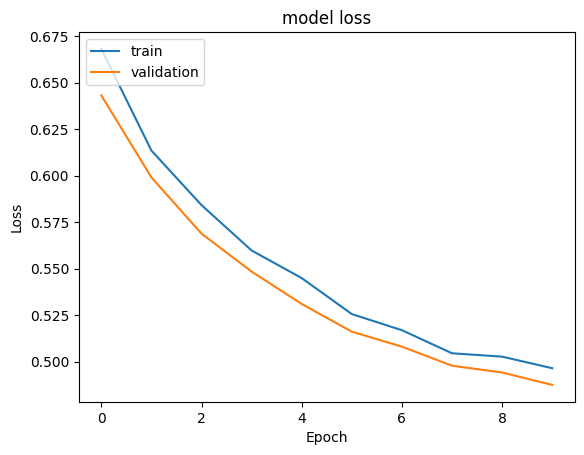

In [82]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

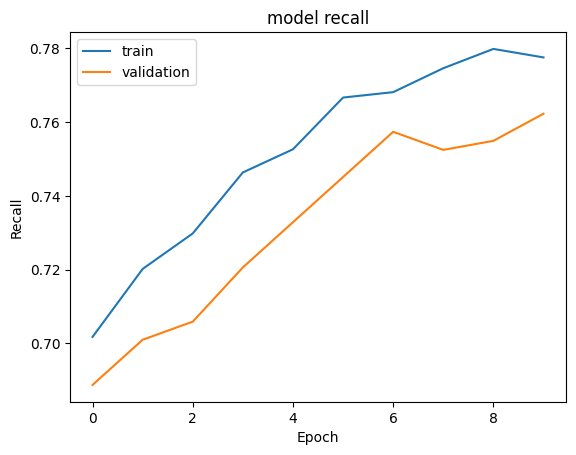

In [83]:
#Plotting Train recall vs Validation recall
plt.plot(history_4.history['recall'])
plt.plot(history_4.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observations**

**Chosen Model: `model_4`**

* Both `model_4` and `model_6` are viable choices. `model_4` has the highest overall recall scores on both the

# Model Tuning

In [171]:
def objective(trial):
    tf.keras.backend.clear_session()
    np.random.seed(1)
    random.seed(1)
    tf.random.set_seed(1)
    model = Sequential()
    model.add(Dense(trial.suggest_int('input_layer', 1, 8)*16, activation='relu', input_shape=(X_train_over.shape[1],)))


    # Define the number of hidden layers
    n_layers = trial.suggest_int('n_layers', 1, 3)

    for i in range(n_layers):
        model.add(Dense(trial.suggest_int(f'hidden_layer_{i+1}', 1, 8)*16, activation='relu'))
        model.add(Dropout(trial.suggest_float(f'dropout_{i+1}', 0.1, 0.5)))

    model.add(Dense(1, activation='sigmoid'))


    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer="SGD", metrics=[tf.keras.metrics.BinaryAccuracy(), 'recall'])

    # early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

    # Train the model
    history = model.fit(X_train_over, y_train_over, batch_size=trial.suggest_int('batch', 1, 10)*10, epochs=10, validation_data=(X_val, y_val), verbose=1, callbacks = [es])

    # adjust outputs
    y_pred_val = model.predict(X_val)
    y_pred_val = (y_pred_val > 0.5)
    y_pred_train = model.predict(X_train_over)
    y_pred_train = (y_pred_train > 0.5)

    accuracy = accuracy_score(y_val, y_pred_val)
    return accuracy

# Define the study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)

# Get the best parameters
best_params = study.best_params



[I 2024-05-12 15:45:48,034] A new study created in memory with name: no-name-a14aa15d-5639-40d8-bb76-582500942427


Epoch 1/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.5382 - loss: 0.6929 - recall: 0.4756 - val_binary_accuracy: 0.6855 - val_loss: 0.6627 - val_recall: 0.6348
Epoch 2/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - binary_accuracy: 0.6228 - loss: 0.6564 - recall: 0.6466 - val_binary_accuracy: 0.7215 - val_loss: 0.6250 - val_recall: 0.6838
Epoch 3/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - binary_accuracy: 0.6751 - loss: 0.6229 - recall: 0.6818 - val_binary_accuracy: 0.7235 - val_loss: 0.5940 - val_recall: 0.7010
Epoch 4/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - binary_accuracy: 0.6940 - loss: 0.5956 - recall: 0.6901 - val_binary_accuracy: 0.7370 - val_loss: 0.5615 - val_recall: 0.7059
Epoch 5/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - binary_accuracy: 0.7272 - loss: 0.5708 - recall: 0.7281 - val_binary_accuracy: 0.7445 - val_loss: 0.5363 - val_recall: 0.7304
Epoch 6/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - binary_accuracy: 0.7310 - loss: 0.56

[I 2024-05-12 15:46:00,944] Trial 0 finished with value: 0.774 and parameters: {'input_layer': 8, 'n_layers': 2, 'hidden_layer_1': 3, 'dropout_1': 0.36089531412829706, 'hidden_layer_2': 2, 'dropout_2': 0.46199903153368926, 'batch': 3}. Best is trial 0 with value: 0.774.


Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.5081 - loss: 0.6959 - recall: 0.3377 - val_binary_accuracy: 0.5945 - val_loss: 0.6812 - val_recall: 0.6838
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - binary_accuracy: 0.5590 - loss: 0.6816 - recall: 0.5084 - val_binary_accuracy: 0.6335 - val_loss: 0.6671 - val_recall: 0.7353
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - binary_accuracy: 0.6070 - loss: 0.6693 - recall: 0.5908 - val_binary_accuracy: 0.6760 - val_loss: 0.6420 - val_recall: 0.7328
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - binary_accuracy: 0.6526 - loss: 0.6457 - recall: 0.6460 - val_binary_accuracy: 0.6970 - val_loss: 0.6064 - val_recall: 0.7230
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - binary_accuracy: 0.6809 - loss: 0.6248 - recall: 0.6986 - val_binary_accuracy: 0.7030 - val_loss: 0.5807 - val_recall: 0.7475
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - binary_accuracy: 0.7013 - loss: 0.59

[I 2024-05-12 15:46:12,369] Trial 1 finished with value: 0.734 and parameters: {'input_layer': 6, 'n_layers': 3, 'hidden_layer_1': 3, 'dropout_1': 0.23095417559999212, 'hidden_layer_2': 8, 'dropout_2': 0.3985496995397823, 'hidden_layer_3': 2, 'dropout_3': 0.30827229017300317, 'batch': 5}. Best is trial 0 with value: 0.774.


Epoch 1/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.5152 - loss: 0.6957 - recall: 0.7904 - val_binary_accuracy: 0.5680 - val_loss: 0.6848 - val_recall: 0.8186
Epoch 2/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - binary_accuracy: 0.6520 - loss: 0.6548 - recall: 0.7526 - val_binary_accuracy: 0.6780 - val_loss: 0.6407 - val_recall: 0.7525
Epoch 3/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - binary_accuracy: 0.7058 - loss: 0.6125 - recall: 0.7506 - val_binary_accuracy: 0.7250 - val_loss: 0.5958 - val_recall: 0.7377
Epoch 4/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - binary_accuracy: 0.7265 - loss: 0.5761 - recall: 0.7460 - val_binary_accuracy: 0.7430 - val_loss: 0.5632 - val_recall: 0.7451
Epoch 5/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - binary_accuracy: 0.7425 - loss: 0.5490 - recall: 0.7623 - val_binary_accuracy: 0.7590 - val_loss: 0.5310 - val_recall: 0.7475
Epoch 6/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - binary_accuracy: 0.7486 - loss: 0.53

[I 2024-05-12 15:46:23,625] Trial 2 finished with value: 0.766 and parameters: {'input_layer': 7, 'n_layers': 2, 'hidden_layer_1': 3, 'dropout_1': 0.11146203380871925, 'hidden_layer_2': 5, 'dropout_2': 0.3947610393003036, 'batch': 3}. Best is trial 0 with value: 0.774.


Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.5383 - loss: 0.6930 - recall: 0.7624 - val_binary_accuracy: 0.5420 - val_loss: 0.6975 - val_recall: 0.7353
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - binary_accuracy: 0.5749 - loss: 0.6798 - recall: 0.6293 - val_binary_accuracy: 0.6160 - val_loss: 0.6794 - val_recall: 0.6838
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - binary_accuracy: 0.6098 - loss: 0.6718 - recall: 0.6207 - val_binary_accuracy: 0.6425 - val_loss: 0.6681 - val_recall: 0.6789
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - binary_accuracy: 0.6293 - loss: 0.6611 - recall: 0.6367 - val_binary_accuracy: 0.6595 - val_loss: 0.6565 - val_recall: 0.6887
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - binary_accuracy: 0.6397 - loss: 0.6497 - recall: 0.6385 - val_binary_accuracy: 0.6735 - val_loss: 0.6422 - val_recall: 0.6814
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - binary_accuracy: 0.6635 - loss: 0.63

[I 2024-05-12 15:46:34,173] Trial 3 finished with value: 0.7145 and parameters: {'input_layer': 1, 'n_layers': 2, 'hidden_layer_1': 3, 'dropout_1': 0.12809567332313063, 'hidden_layer_2': 8, 'dropout_2': 0.4122298234198505, 'batch': 7}. Best is trial 0 with value: 0.774.


Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.5776 - loss: 0.6795 - recall: 0.7209 - val_binary_accuracy: 0.6530 - val_loss: 0.6705 - val_recall: 0.7525
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - binary_accuracy: 0.6759 - loss: 0.6466 - recall: 0.7403 - val_binary_accuracy: 0.7025 - val_loss: 0.6413 - val_recall: 0.7132
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - binary_accuracy: 0.7177 - loss: 0.6198 - recall: 0.7504 - val_binary_accuracy: 0.7205 - val_loss: 0.6147 - val_recall: 0.7034
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - binary_accuracy: 0.7234 - loss: 0.5969 - recall: 0.7415 - val_binary_accuracy: 0.7315 - val_loss: 0.5925 - val_recall: 0.7034
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - binary_accuracy: 0.7343 - loss: 0.5784 - recall: 0.7527 - val_binary_accuracy: 0.7335 - val_loss: 0.5760 - val_recall: 0.7083
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - binary_accuracy: 0.7445 - loss: 0.56

[I 2024-05-12 15:46:45,360] Trial 4 finished with value: 0.753 and parameters: {'input_layer': 4, 'n_layers': 1, 'hidden_layer_1': 8, 'dropout_1': 0.21304920477313516, 'batch': 5}. Best is trial 0 with value: 0.774.


Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.5673 - loss: 0.6852 - recall: 0.6482 - val_binary_accuracy: 0.5660 - val_loss: 0.6773 - val_recall: 0.7598
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - binary_accuracy: 0.5735 - loss: 0.6777 - recall: 0.6367 - val_binary_accuracy: 0.6160 - val_loss: 0.6638 - val_recall: 0.7451
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - binary_accuracy: 0.5891 - loss: 0.6700 - recall: 0.6383 - val_binary_accuracy: 0.6555 - val_loss: 0.6538 - val_recall: 0.7500
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - binary_accuracy: 0.6160 - loss: 0.6586 - recall: 0.6589 - val_binary_accuracy: 0.6645 - val_loss: 0.6461 - val_recall: 0.7206
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - binary_accuracy: 0.6230 - loss: 0.6533 - recall: 0.6550 - val_binary_accuracy: 0.6715 - val_loss: 0.6376 - val_recall: 0.7083
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - binary_accuracy: 0.6494 - loss: 0.6394 - recall:

[I 2024-05-12 15:46:56,058] Trial 5 finished with value: 0.705 and parameters: {'input_layer': 1, 'n_layers': 1, 'hidden_layer_1': 2, 'dropout_1': 0.4135432776955821, 'batch': 10}. Best is trial 0 with value: 0.774.


Epoch 1/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.5227 - loss: 0.6899 - recall: 0.4569 - val_binary_accuracy: 0.5615 - val_loss: 0.6861 - val_recall: 0.7647
Epoch 2/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - binary_accuracy: 0.5888 - loss: 0.6756 - recall: 0.5929 - val_binary_accuracy: 0.6570 - val_loss: 0.6608 - val_recall: 0.7132
Epoch 3/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - binary_accuracy: 0.6266 - loss: 0.6571 - recall: 0.5748 - val_binary_accuracy: 0.7110 - val_loss: 0.6238 - val_recall: 0.7132
Epoch 4/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - binary_accuracy: 0.6681 - loss: 0.6277 - recall: 0.6191 - val_binary_accuracy: 0.7395 - val_loss: 0.5821 - val_recall: 0.7255
Epoch 5/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - binary_accuracy: 0.6864 - loss: 0.5986 - recall: 0.6378 - val_binary_accuracy: 0.7515 - val_loss: 0.5471 - val_recall: 0.7304
Epoch 6/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - binary_accuracy: 0.7185 - loss: 0.57

[I 2024-05-12 15:47:07,620] Trial 6 finished with value: 0.7745 and parameters: {'input_layer': 8, 'n_layers': 3, 'hidden_layer_1': 2, 'dropout_1': 0.11551392268344496, 'hidden_layer_2': 5, 'dropout_2': 0.22604123539197826, 'hidden_layer_3': 1, 'dropout_3': 0.4163057825541836, 'batch': 3}. Best is trial 6 with value: 0.7745.


Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.5257 - loss: 0.6950 - recall: 0.4675 - val_binary_accuracy: 0.5670 - val_loss: 0.6863 - val_recall: 0.6814
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - binary_accuracy: 0.6313 - loss: 0.6580 - recall: 0.7068 - val_binary_accuracy: 0.6290 - val_loss: 0.6649 - val_recall: 0.6961
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - binary_accuracy: 0.6732 - loss: 0.6364 - recall: 0.7148 - val_binary_accuracy: 0.6655 - val_loss: 0.6450 - val_recall: 0.6961
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - binary_accuracy: 0.6914 - loss: 0.6184 - recall: 0.7197 - val_binary_accuracy: 0.6830 - val_loss: 0.6249 - val_recall: 0.6838
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - binary_accuracy: 0.7144 - loss: 0.6034 - recall: 0.7359 - val_binary_accuracy: 0.7025 - val_loss: 0.6066 - val_recall: 0.6863
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - binary_accuracy: 0.7228 - loss: 0.58

[I 2024-05-12 15:47:18,097] Trial 7 finished with value: 0.7525 and parameters: {'input_layer': 2, 'n_layers': 1, 'hidden_layer_1': 5, 'dropout_1': 0.18741831686403743, 'batch': 6}. Best is trial 6 with value: 0.7745.


Epoch 1/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.5183 - loss: 0.6953 - recall: 0.4366 - val_binary_accuracy: 0.6410 - val_loss: 0.6610 - val_recall: 0.6299
Epoch 2/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - binary_accuracy: 0.6445 - loss: 0.6500 - recall: 0.6719 - val_binary_accuracy: 0.6970 - val_loss: 0.6281 - val_recall: 0.6691
Epoch 3/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - binary_accuracy: 0.6929 - loss: 0.6201 - recall: 0.7097 - val_binary_accuracy: 0.7250 - val_loss: 0.5956 - val_recall: 0.6863
Epoch 4/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - binary_accuracy: 0.7131 - loss: 0.5930 - recall: 0.7158 - val_binary_accuracy: 0.7355 - val_loss: 0.5760 - val_recall: 0.6985
Epoch 5/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - binary_accuracy: 0.7313 - loss: 0.5713 - recall: 0.7448 - val_binary_accuracy: 0.7415 - val_loss: 0.5553 - val_recall: 0.7034
Epoch 6/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - binary_accuracy: 0.7281 - loss: 0.55

[I 2024-05-12 15:47:28,449] Trial 8 finished with value: 0.7565 and parameters: {'input_layer': 4, 'n_layers': 1, 'hidden_layer_1': 6, 'dropout_1': 0.40514188716330246, 'batch': 4}. Best is trial 6 with value: 0.7745.


Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.5009 - loss: 0.7064 - recall: 0.7982 - val_binary_accuracy: 0.3905 - val_loss: 0.7123 - val_recall: 0.8235
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - binary_accuracy: 0.5715 - loss: 0.6821 - recall: 0.6907 - val_binary_accuracy: 0.6020 - val_loss: 0.6852 - val_recall: 0.7426
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - binary_accuracy: 0.6115 - loss: 0.6684 - recall: 0.6488 - val_binary_accuracy: 0.6720 - val_loss: 0.6657 - val_recall: 0.7010
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - binary_accuracy: 0.6545 - loss: 0.6523 - recall: 0.6601 - val_binary_accuracy: 0.6920 - val_loss: 0.6513 - val_recall: 0.7010
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - binary_accuracy: 0.6679 - loss: 0.6377 - recall: 0.6627 - val_binary_accuracy: 0.7075 - val_loss: 0.6363 - val_recall: 0.6961
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - binary_accuracy: 0.6750 - loss: 0.62

[I 2024-05-12 15:47:35,825] Trial 9 finished with value: 0.725 and parameters: {'input_layer': 1, 'n_layers': 1, 'hidden_layer_1': 7, 'dropout_1': 0.3948369084060133, 'batch': 7}. Best is trial 6 with value: 0.7745.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 460us/step - binary_accuracy: 0.5208 - loss: 0.6912 - recall: 0.6241 - val_binary_accuracy: 0.7115 - val_loss: 0.6612 - val_recall: 0.6642
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - binary_accuracy: 0.6387 - loss: 0.6524 - recall: 0.5909 - val_binary_accuracy: 0.7500 - val_loss: 0.5767 - val_recall: 0.6887
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - binary_accuracy: 0.7053 - loss: 0.5970 - recall: 0.6472 - val_binary_accuracy: 0.7645 - val_loss: 0.5143 - val_recall: 0.7304
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - binary_accuracy: 0.7350 - loss: 0.5540 - recall: 0.7119 - val_binary_accuracy: 0.7520 - val_loss: 0.5028 - val_recall: 0.7696
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - binary_accuracy: 0.7551 - loss: 0.5230 - recall: 0.7496 - val_binary_accuracy: 0.7660 - val_loss: 0.4841 - val_recall: 0.7623
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - binary_accuracy: 0.7637 - loss: 0.

[I 2024-05-12 15:47:44,014] Trial 10 finished with value: 0.77 and parameters: {'input_layer': 6, 'n_layers': 3, 'hidden_layer_1': 1, 'dropout_1': 0.4946678146487947, 'hidden_layer_2': 4, 'dropout_2': 0.14817763410199286, 'hidden_layer_3': 8, 'dropout_3': 0.47866303129352616, 'batch': 1}. Best is trial 6 with value: 0.7745.


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 573us/step - binary_accuracy: 0.5071 - loss: 0.6955 - recall: 0.4280 - val_binary_accuracy: 0.4700 - val_loss: 0.6918 - val_recall: 0.7598
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - binary_accuracy: 0.5643 - loss: 0.6853 - recall: 0.6523 - val_binary_accuracy: 0.5965 - val_loss: 0.6756 - val_recall: 0.7794
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - binary_accuracy: 0.6170 - loss: 0.6649 - recall: 0.6660 - val_binary_accuracy: 0.6755 - val_loss: 0.6295 - val_recall: 0.7402
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - binary_accuracy: 0.6475 - loss: 0.6312 - recall: 0.6498 - val_binary_accuracy: 0.7210 - val_loss: 0.5735 - val_recall: 0.7230
Epoch 5/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - binary_accuracy: 0.6918 - loss: 0.6009 - recall: 0.7024 - val_binary_accuracy: 0.7405 - val_loss: 0.5398 - val_recall: 0.7500
Epoch 6/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - binary_accuracy: 0.7103 - loss: 0.

[I 2024-05-12 15:47:50,529] Trial 11 finished with value: 0.763 and parameters: {'input_layer': 8, 'n_layers': 3, 'hidden_layer_1': 1, 'dropout_1': 0.32444161636918256, 'hidden_layer_2': 2, 'dropout_2': 0.20513894714950479, 'hidden_layer_3': 1, 'dropout_3': 0.4185690090161108, 'batch': 2}. Best is trial 6 with value: 0.7745.


Epoch 1/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 737us/step - binary_accuracy: 0.5485 - loss: 0.6861 - recall: 0.7031 - val_binary_accuracy: 0.6930 - val_loss: 0.6645 - val_recall: 0.7328
Epoch 2/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - binary_accuracy: 0.6644 - loss: 0.6398 - recall: 0.6756 - val_binary_accuracy: 0.7335 - val_loss: 0.6225 - val_recall: 0.7230
Epoch 3/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - binary_accuracy: 0.6958 - loss: 0.6050 - recall: 0.6928 - val_binary_accuracy: 0.7550 - val_loss: 0.5845 - val_recall: 0.7328
Epoch 4/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - binary_accuracy: 0.7144 - loss: 0.5785 - recall: 0.7110 - val_binary_accuracy: 0.7635 - val_loss: 0.5480 - val_recall: 0.7402
Epoch 5/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - binary_accuracy: 0.7274 - loss: 0.5548 - recall: 0.7176 - val_binary_accuracy: 0.7695 - val_loss: 0.5193 - val_recall: 0.7500
Epoch 6/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - binary_accuracy: 0.7414 - loss: 0.

[I 2024-05-12 15:47:56,347] Trial 12 finished with value: 0.7745 and parameters: {'input_layer': 8, 'n_layers': 2, 'hidden_layer_1': 4, 'dropout_1': 0.29699484815311655, 'hidden_layer_2': 1, 'dropout_2': 0.2714672671168401, 'batch': 3}. Best is trial 6 with value: 0.7745.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 480us/step - binary_accuracy: 0.5821 - loss: 0.6718 - recall: 0.6611 - val_binary_accuracy: 0.7235 - val_loss: 0.5822 - val_recall: 0.7230
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - binary_accuracy: 0.7339 - loss: 0.5587 - recall: 0.7555 - val_binary_accuracy: 0.7505 - val_loss: 0.5109 - val_recall: 0.7672
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - binary_accuracy: 0.7588 - loss: 0.5103 - recall: 0.7952 - val_binary_accuracy: 0.7615 - val_loss: 0.4843 - val_recall: 0.7696
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - binary_accuracy: 0.7689 - loss: 0.4813 - recall: 0.7915 - val_binary_accuracy: 0.7645 - val_loss: 0.4805 - val_recall: 0.7794
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - binary_accuracy: 0.7803 - loss: 0.4711 - recall: 0.8029 - val_binary_accuracy: 0.7630 - val_loss: 0.4788 - val_recall: 0.7696
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - binary_accuracy: 0.7849 - loss: 0.

[I 2024-05-12 15:48:04,797] Trial 13 finished with value: 0.774 and parameters: {'input_layer': 6, 'n_layers': 3, 'hidden_layer_1': 5, 'dropout_1': 0.2746777946721404, 'hidden_layer_2': 5, 'dropout_2': 0.2548975432818011, 'hidden_layer_3': 5, 'dropout_3': 0.1338157435545414, 'batch': 1}. Best is trial 6 with value: 0.7745.


Epoch 1/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - binary_accuracy: 0.5505 - loss: 0.6845 - recall: 0.7236 - val_binary_accuracy: 0.6915 - val_loss: 0.6633 - val_recall: 0.7426
Epoch 2/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - binary_accuracy: 0.6791 - loss: 0.6330 - recall: 0.6958 - val_binary_accuracy: 0.7375 - val_loss: 0.6160 - val_recall: 0.7230
Epoch 3/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - binary_accuracy: 0.7067 - loss: 0.5960 - recall: 0.7019 - val_binary_accuracy: 0.7570 - val_loss: 0.5721 - val_recall: 0.7279
Epoch 4/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - binary_accuracy: 0.7260 - loss: 0.5663 - recall: 0.7207 - val_binary_accuracy: 0.7650 - val_loss: 0.5351 - val_recall: 0.7353
Epoch 5/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - binary_accuracy: 0.7365 - loss: 0.5402 - recall: 0.7265 - val_binary_accuracy: 0.7685 - val_loss: 0.5088 - val_recall: 0.7475
Epoch 6/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - binary_accuracy: 0.7523 - loss: 0.

[I 2024-05-12 15:48:10,808] Trial 14 finished with value: 0.778 and parameters: {'input_layer': 8, 'n_layers': 2, 'hidden_layer_1': 4, 'dropout_1': 0.15284775187833075, 'hidden_layer_2': 1, 'dropout_2': 0.2900659069354534, 'batch': 3}. Best is trial 14 with value: 0.778.


Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.5455 - loss: 0.6875 - recall: 0.7790 - val_binary_accuracy: 0.4950 - val_loss: 0.6917 - val_recall: 0.8529
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - binary_accuracy: 0.5887 - loss: 0.6724 - recall: 0.7428 - val_binary_accuracy: 0.6190 - val_loss: 0.6740 - val_recall: 0.7843
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - binary_accuracy: 0.6253 - loss: 0.6601 - recall: 0.7310 - val_binary_accuracy: 0.6695 - val_loss: 0.6597 - val_recall: 0.7574
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - binary_accuracy: 0.6560 - loss: 0.6458 - recall: 0.7316 - val_binary_accuracy: 0.6890 - val_loss: 0.6448 - val_recall: 0.7426
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - binary_accuracy: 0.6795 - loss: 0.6280 - recall: 0.7388 - val_binary_accuracy: 0.7085 - val_loss: 0.6295 - val_recall: 0.7279
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - binary_accuracy: 0.7060 - loss: 0.6167 - recall:

[I 2024-05-12 15:48:15,989] Trial 15 finished with value: 0.761 and parameters: {'input_layer': 7, 'n_layers': 2, 'hidden_layer_1': 4, 'dropout_1': 0.17700921297368094, 'hidden_layer_2': 4, 'dropout_2': 0.32308112872172734, 'batch': 10}. Best is trial 14 with value: 0.778.


Epoch 1/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.5171 - loss: 0.6928 - recall: 0.4912 - val_binary_accuracy: 0.6370 - val_loss: 0.6719 - val_recall: 0.5907
Epoch 2/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - binary_accuracy: 0.5984 - loss: 0.6757 - recall: 0.5766 - val_binary_accuracy: 0.6840 - val_loss: 0.6467 - val_recall: 0.6373
Epoch 3/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - binary_accuracy: 0.6478 - loss: 0.6488 - recall: 0.6283 - val_binary_accuracy: 0.7160 - val_loss: 0.6067 - val_recall: 0.6691
Epoch 4/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - binary_accuracy: 0.6780 - loss: 0.6131 - recall: 0.6713 - val_binary_accuracy: 0.7335 - val_loss: 0.5661 - val_recall: 0.6838
Epoch 5/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - binary_accuracy: 0.7151 - loss: 0.5799 - recall: 0.7144 - val_binary_accuracy: 0.7405 - val_loss: 0.5382 - val_recall: 0.7034
Epoch 6/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - binary_accuracy: 0.7344 - loss: 0.55

[I 2024-05-12 15:48:21,943] Trial 16 finished with value: 0.765 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 2, 'dropout_1': 0.13964483041223955, 'hidden_layer_2': 6, 'dropout_2': 0.12577036075574682, 'hidden_layer_3': 4, 'dropout_3': 0.32770256083280835, 'batch': 4}. Best is trial 14 with value: 0.778.


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 543us/step - binary_accuracy: 0.5758 - loss: 0.6791 - recall: 0.5910 - val_binary_accuracy: 0.6470 - val_loss: 0.6481 - val_recall: 0.7132
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - binary_accuracy: 0.6870 - loss: 0.6173 - recall: 0.7113 - val_binary_accuracy: 0.7300 - val_loss: 0.5767 - val_recall: 0.7304
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - binary_accuracy: 0.7306 - loss: 0.5643 - recall: 0.7484 - val_binary_accuracy: 0.7475 - val_loss: 0.5345 - val_recall: 0.7426
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - binary_accuracy: 0.7499 - loss: 0.5306 - recall: 0.7768 - val_binary_accuracy: 0.7510 - val_loss: 0.5100 - val_recall: 0.7574
Epoch 5/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - binary_accuracy: 0.7591 - loss: 0.5066 - recall: 0.7881 - val_binary_accuracy: 0.7565 - val_loss: 0.4897 - val_recall: 0.7549
Epoch 6/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - binary_accuracy: 0.7703 - loss: 0.

[I 2024-05-12 15:48:28,563] Trial 17 finished with value: 0.769 and parameters: {'input_layer': 7, 'n_layers': 2, 'hidden_layer_1': 2, 'dropout_1': 0.10346556157929399, 'hidden_layer_2': 6, 'dropout_2': 0.32310596716994183, 'batch': 2}. Best is trial 14 with value: 0.778.


Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.5106 - loss: 0.7036 - recall: 0.1733 - val_binary_accuracy: 0.5775 - val_loss: 0.6815 - val_recall: 0.5564
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - binary_accuracy: 0.5788 - loss: 0.6780 - recall: 0.5989 - val_binary_accuracy: 0.6175 - val_loss: 0.6743 - val_recall: 0.6863
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - binary_accuracy: 0.6372 - loss: 0.6596 - recall: 0.6877 - val_binary_accuracy: 0.6575 - val_loss: 0.6534 - val_recall: 0.6936
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - binary_accuracy: 0.6559 - loss: 0.6454 - recall: 0.6772 - val_binary_accuracy: 0.6900 - val_loss: 0.6285 - val_recall: 0.6961
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - binary_accuracy: 0.6880 - loss: 0.6227 - recall: 0.7098 - val_binary_accuracy: 0.7120 - val_loss: 0.6037 - val_recall: 0.6985
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - binary_accuracy: 0.6929 - loss: 0.60

[I 2024-05-12 15:48:34,131] Trial 18 finished with value: 0.728 and parameters: {'input_layer': 3, 'n_layers': 3, 'hidden_layer_1': 6, 'dropout_1': 0.15715020481198533, 'hidden_layer_2': 3, 'dropout_2': 0.20275478314546203, 'hidden_layer_3': 3, 'dropout_3': 0.12612333176920842, 'batch': 8}. Best is trial 14 with value: 0.778.


Epoch 1/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step - binary_accuracy: 0.5407 - loss: 0.6943 - recall: 0.7355 - val_binary_accuracy: 0.6425 - val_loss: 0.6674 - val_recall: 0.7377
Epoch 2/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - binary_accuracy: 0.6553 - loss: 0.6455 - recall: 0.6824 - val_binary_accuracy: 0.7160 - val_loss: 0.6299 - val_recall: 0.7010
Epoch 3/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - binary_accuracy: 0.6951 - loss: 0.6144 - recall: 0.6946 - val_binary_accuracy: 0.7395 - val_loss: 0.6007 - val_recall: 0.7059
Epoch 4/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - binary_accuracy: 0.7081 - loss: 0.5947 - recall: 0.7043 - val_binary_accuracy: 0.7500 - val_loss: 0.5754 - val_recall: 0.7108
Epoch 5/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - binary_accuracy: 0.7268 - loss: 0.5686 - recall: 0.7169 - val_binary_accuracy: 0.7560 - val_loss: 0.5524 - val_recall: 0.7157
Epoch 6/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - binary_accuracy: 0.7376 - loss: 0.

[I 2024-05-12 15:48:39,955] Trial 19 finished with value: 0.7625 and parameters: {'input_layer': 5, 'n_layers': 2, 'hidden_layer_1': 4, 'dropout_1': 0.2261531810896108, 'hidden_layer_2': 1, 'dropout_2': 0.21451893337508088, 'batch': 4}. Best is trial 14 with value: 0.778.


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 608us/step - binary_accuracy: 0.5857 - loss: 0.6723 - recall: 0.7911 - val_binary_accuracy: 0.6930 - val_loss: 0.6454 - val_recall: 0.6961
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - binary_accuracy: 0.6922 - loss: 0.6230 - recall: 0.6784 - val_binary_accuracy: 0.7365 - val_loss: 0.5731 - val_recall: 0.6765
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - binary_accuracy: 0.7092 - loss: 0.5872 - recall: 0.6928 - val_binary_accuracy: 0.7575 - val_loss: 0.5363 - val_recall: 0.7255
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - binary_accuracy: 0.7436 - loss: 0.5493 - recall: 0.7462 - val_binary_accuracy: 0.7540 - val_loss: 0.5170 - val_recall: 0.7549
Epoch 5/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - binary_accuracy: 0.7524 - loss: 0.5240 - recall: 0.7707 - val_binary_accuracy: 0.7620 - val_loss: 0.4894 - val_recall: 0.7451
Epoch 6/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - binary_accuracy: 0.7662 - loss: 0.

[I 2024-05-12 15:48:46,767] Trial 20 finished with value: 0.774 and parameters: {'input_layer': 7, 'n_layers': 2, 'hidden_layer_1': 1, 'dropout_1': 0.2576714462178349, 'hidden_layer_2': 6, 'dropout_2': 0.3030577188610055, 'batch': 2}. Best is trial 14 with value: 0.778.


Epoch 1/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - binary_accuracy: 0.5459 - loss: 0.6857 - recall: 0.7073 - val_binary_accuracy: 0.6905 - val_loss: 0.6650 - val_recall: 0.7377
Epoch 2/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - binary_accuracy: 0.6577 - loss: 0.6404 - recall: 0.6728 - val_binary_accuracy: 0.7335 - val_loss: 0.6221 - val_recall: 0.7230
Epoch 3/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - binary_accuracy: 0.6961 - loss: 0.6071 - recall: 0.6938 - val_binary_accuracy: 0.7575 - val_loss: 0.5853 - val_recall: 0.7328
Epoch 4/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - binary_accuracy: 0.7107 - loss: 0.5824 - recall: 0.7040 - val_binary_accuracy: 0.7610 - val_loss: 0.5519 - val_recall: 0.7402
Epoch 5/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - binary_accuracy: 0.7325 - loss: 0.5575 - recall: 0.7275 - val_binary_accuracy: 0.7695 - val_loss: 0.5217 - val_recall: 0.7500
Epoch 6/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - binary_accuracy: 0.7403 - loss: 0.

[I 2024-05-12 15:48:53,859] Trial 21 finished with value: 0.774 and parameters: {'input_layer': 8, 'n_layers': 2, 'hidden_layer_1': 4, 'dropout_1': 0.3216614012674858, 'hidden_layer_2': 1, 'dropout_2': 0.2591856594165356, 'batch': 3}. Best is trial 14 with value: 0.778.


Epoch 1/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - binary_accuracy: 0.5251 - loss: 0.6918 - recall: 0.5245 - val_binary_accuracy: 0.6665 - val_loss: 0.6649 - val_recall: 0.7696
Epoch 2/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - binary_accuracy: 0.6213 - loss: 0.6569 - recall: 0.6788 - val_binary_accuracy: 0.7160 - val_loss: 0.6193 - val_recall: 0.7279
Epoch 3/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - binary_accuracy: 0.6715 - loss: 0.6178 - recall: 0.6944 - val_binary_accuracy: 0.7330 - val_loss: 0.5820 - val_recall: 0.7426
Epoch 4/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - binary_accuracy: 0.7023 - loss: 0.5906 - recall: 0.7264 - val_binary_accuracy: 0.7380 - val_loss: 0.5541 - val_recall: 0.7377
Epoch 5/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - binary_accuracy: 0.7191 - loss: 0.5733 - recall: 0.7411 - val_binary_accuracy: 0.7485 - val_loss: 0.5290 - val_recall: 0.7377
Epoch 6/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - binary_accuracy: 0.7334 - loss: 0.

[I 2024-05-12 15:49:00,945] Trial 22 finished with value: 0.7665 and parameters: {'input_layer': 8, 'n_layers': 2, 'hidden_layer_1': 5, 'dropout_1': 0.496624210308812, 'hidden_layer_2': 2, 'dropout_2': 0.2612262093707786, 'batch': 3}. Best is trial 14 with value: 0.778.


Epoch 1/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step - binary_accuracy: 0.5352 - loss: 0.6899 - recall: 0.7120 - val_binary_accuracy: 0.6785 - val_loss: 0.6658 - val_recall: 0.7230
Epoch 2/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - binary_accuracy: 0.6480 - loss: 0.6481 - recall: 0.6863 - val_binary_accuracy: 0.7275 - val_loss: 0.6190 - val_recall: 0.7059
Epoch 3/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - binary_accuracy: 0.7008 - loss: 0.6104 - recall: 0.7102 - val_binary_accuracy: 0.7380 - val_loss: 0.5808 - val_recall: 0.7059
Epoch 4/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - binary_accuracy: 0.7157 - loss: 0.5829 - recall: 0.7280 - val_binary_accuracy: 0.7485 - val_loss: 0.5545 - val_recall: 0.7304
Epoch 5/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - binary_accuracy: 0.7388 - loss: 0.5573 - recall: 0.7599 - val_binary_accuracy: 0.7520 - val_loss: 0.5362 - val_recall: 0.7451
Epoch 6/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - binary_accuracy: 0.7434 - loss: 0.

[I 2024-05-12 15:49:07,213] Trial 23 finished with value: 0.765 and parameters: {'input_layer': 8, 'n_layers': 2, 'hidden_layer_1': 6, 'dropout_1': 0.18148338860701413, 'hidden_layer_2': 3, 'dropout_2': 0.3524148343108248, 'batch': 4}. Best is trial 14 with value: 0.778.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 459us/step - binary_accuracy: 0.5781 - loss: 0.6745 - recall: 0.6529 - val_binary_accuracy: 0.7415 - val_loss: 0.6012 - val_recall: 0.7059
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - binary_accuracy: 0.7091 - loss: 0.5872 - recall: 0.7006 - val_binary_accuracy: 0.7635 - val_loss: 0.5197 - val_recall: 0.7549
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - binary_accuracy: 0.7463 - loss: 0.5325 - recall: 0.7497 - val_binary_accuracy: 0.7555 - val_loss: 0.4966 - val_recall: 0.7770
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7666 - loss: 0.5051 - recall: 0.7741 - val_binary_accuracy: 0.7685 - val_loss: 0.4797 - val_recall: 0.7525
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - binary_accuracy: 0.7804 - loss: 0.4836 - recall: 0.7850 - val_binary_accuracy: 0.7740 - val_loss: 0.4793 - val_recall: 0.7672
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - binary_accuracy: 0.7791 - loss: 0.

[I 2024-05-12 15:49:16,070] Trial 24 finished with value: 0.7725 and parameters: {'input_layer': 7, 'n_layers': 3, 'hidden_layer_1': 4, 'dropout_1': 0.2797405929601587, 'hidden_layer_2': 1, 'dropout_2': 0.16917436020711643, 'hidden_layer_3': 6, 'dropout_3': 0.4122862537068248, 'batch': 1}. Best is trial 14 with value: 0.778.


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 554us/step - binary_accuracy: 0.5640 - loss: 0.6783 - recall: 0.7445 - val_binary_accuracy: 0.7050 - val_loss: 0.6438 - val_recall: 0.6912
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - binary_accuracy: 0.6577 - loss: 0.6344 - recall: 0.6550 - val_binary_accuracy: 0.7455 - val_loss: 0.5860 - val_recall: 0.6618
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - binary_accuracy: 0.7046 - loss: 0.5938 - recall: 0.6724 - val_binary_accuracy: 0.7560 - val_loss: 0.5502 - val_recall: 0.7108
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - binary_accuracy: 0.7260 - loss: 0.5675 - recall: 0.7085 - val_binary_accuracy: 0.7620 - val_loss: 0.5251 - val_recall: 0.7402
Epoch 5/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - binary_accuracy: 0.7386 - loss: 0.5430 - recall: 0.7298 - val_binary_accuracy: 0.7710 - val_loss: 0.4990 - val_recall: 0.7549
Epoch 6/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - binary_accuracy: 0.7496 - loss: 0.

[I 2024-05-12 15:49:22,907] Trial 25 finished with value: 0.7795 and parameters: {'input_layer': 6, 'n_layers': 2, 'hidden_layer_1': 2, 'dropout_1': 0.4500751057831918, 'hidden_layer_2': 3, 'dropout_2': 0.2646765915126766, 'batch': 2}. Best is trial 25 with value: 0.7795.


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 659us/step - binary_accuracy: 0.5056 - loss: 0.6926 - recall: 0.4413 - val_binary_accuracy: 0.5725 - val_loss: 0.6788 - val_recall: 0.6765
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - binary_accuracy: 0.5889 - loss: 0.6750 - recall: 0.6342 - val_binary_accuracy: 0.6620 - val_loss: 0.6423 - val_recall: 0.6716
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - binary_accuracy: 0.6514 - loss: 0.6379 - recall: 0.6687 - val_binary_accuracy: 0.7125 - val_loss: 0.5975 - val_recall: 0.7181
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.6950 - loss: 0.6042 - recall: 0.7010 - val_binary_accuracy: 0.7520 - val_loss: 0.5479 - val_recall: 0.7206
Epoch 5/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - binary_accuracy: 0.7165 - loss: 0.5778 - recall: 0.7135 - val_binary_accuracy: 0.7370 - val_loss: 0.5345 - val_recall: 0.7623
Epoch 6/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7300 - loss: 0.

[I 2024-05-12 15:49:30,225] Trial 26 finished with value: 0.774 and parameters: {'input_layer': 6, 'n_layers': 3, 'hidden_layer_1': 2, 'dropout_1': 0.4519978989969552, 'hidden_layer_2': 3, 'dropout_2': 0.23808455901680262, 'hidden_layer_3': 1, 'dropout_3': 0.22508752258471065, 'batch': 2}. Best is trial 25 with value: 0.7795.


Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/step - binary_accuracy: 0.5567 - loss: 0.6823 - recall: 0.6654 - val_binary_accuracy: 0.6640 - val_loss: 0.6635 - val_recall: 0.5784
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - binary_accuracy: 0.6035 - loss: 0.6686 - recall: 0.6021 - val_binary_accuracy: 0.7010 - val_loss: 0.6405 - val_recall: 0.5760
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - binary_accuracy: 0.6447 - loss: 0.6471 - recall: 0.6164 - val_binary_accuracy: 0.7180 - val_loss: 0.6196 - val_recall: 0.6275
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - binary_accuracy: 0.6623 - loss: 0.6276 - recall: 0.6392 - val_binary_accuracy: 0.7230 - val_loss: 0.5991 - val_recall: 0.6520
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - binary_accuracy: 0.6821 - loss: 0.6103 - recall: 0.6671 - val_binary_accuracy: 0.7350 - val_loss: 0.5775 - val_recall: 0.6667
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - binary_accuracy: 0.7112 - loss: 0.

[I 2024-05-12 15:49:36,114] Trial 27 finished with value: 0.7555 and parameters: {'input_layer': 5, 'n_layers': 2, 'hidden_layer_1': 2, 'dropout_1': 0.3599767655513063, 'hidden_layer_2': 4, 'dropout_2': 0.29168676931127546, 'batch': 5}. Best is trial 25 with value: 0.7795.


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 548us/step - binary_accuracy: 0.5965 - loss: 0.6695 - recall: 0.8004 - val_binary_accuracy: 0.6520 - val_loss: 0.6386 - val_recall: 0.6936
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - binary_accuracy: 0.6942 - loss: 0.6088 - recall: 0.7467 - val_binary_accuracy: 0.7250 - val_loss: 0.5722 - val_recall: 0.7157
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - binary_accuracy: 0.7226 - loss: 0.5691 - recall: 0.7448 - val_binary_accuracy: 0.7370 - val_loss: 0.5412 - val_recall: 0.7328
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - binary_accuracy: 0.7488 - loss: 0.5441 - recall: 0.7750 - val_binary_accuracy: 0.7450 - val_loss: 0.5180 - val_recall: 0.7475
Epoch 5/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - binary_accuracy: 0.7572 - loss: 0.5199 - recall: 0.7903 - val_binary_accuracy: 0.7560 - val_loss: 0.4976 - val_recall: 0.7549
Epoch 6/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - binary_accuracy: 0.7669 - loss: 0.

[I 2024-05-12 15:49:43,181] Trial 28 finished with value: 0.769 and parameters: {'input_layer': 7, 'n_layers': 2, 'hidden_layer_1': 1, 'dropout_1': 0.15222390846940634, 'hidden_layer_2': 7, 'dropout_2': 0.35827168562052986, 'batch': 2}. Best is trial 25 with value: 0.7795.


Epoch 1/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - binary_accuracy: 0.5479 - loss: 0.6843 - recall: 0.5265 - val_binary_accuracy: 0.7095 - val_loss: 0.6373 - val_recall: 0.6936
Epoch 2/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - binary_accuracy: 0.6796 - loss: 0.6250 - recall: 0.7017 - val_binary_accuracy: 0.7310 - val_loss: 0.5940 - val_recall: 0.7059
Epoch 3/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - binary_accuracy: 0.7144 - loss: 0.5878 - recall: 0.7230 - val_binary_accuracy: 0.7395 - val_loss: 0.5658 - val_recall: 0.7108
Epoch 4/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - binary_accuracy: 0.7400 - loss: 0.5561 - recall: 0.7498 - val_binary_accuracy: 0.7465 - val_loss: 0.5438 - val_recall: 0.7181
Epoch 5/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - binary_accuracy: 0.7464 - loss: 0.5426 - recall: 0.7626 - val_binary_accuracy: 0.7535 - val_loss: 0.5240 - val_recall: 0.7304
Epoch 6/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - binary_accuracy: 0.7476 - loss: 0.

[I 2024-05-12 15:49:49,448] Trial 29 finished with value: 0.768 and parameters: {'input_layer': 6, 'n_layers': 1, 'hidden_layer_1': 3, 'dropout_1': 0.3611743060339264, 'batch': 3}. Best is trial 25 with value: 0.7795.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step - binary_accuracy: 0.5591 - loss: 0.6838 - recall: 0.4662 - val_binary_accuracy: 0.6980 - val_loss: 0.5908 - val_recall: 0.7181
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7222 - loss: 0.5749 - recall: 0.7502 - val_binary_accuracy: 0.7545 - val_loss: 0.5099 - val_recall: 0.7623
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - binary_accuracy: 0.7611 - loss: 0.5083 - recall: 0.8033 - val_binary_accuracy: 0.7500 - val_loss: 0.4973 - val_recall: 0.7623
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7774 - loss: 0.4833 - recall: 0.8079 - val_binary_accuracy: 0.7605 - val_loss: 0.4919 - val_recall: 0.7696
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7873 - loss: 0.4645 - recall: 0.8195 - val_binary_accuracy: 0.7645 - val_loss: 0.4795 - val_recall: 0.7475
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - binary_accuracy: 0.7904 - loss: 0.

[I 2024-05-12 15:49:58,296] Trial 30 finished with value: 0.7785 and parameters: {'input_layer': 8, 'n_layers': 3, 'hidden_layer_1': 2, 'dropout_1': 0.10295078471530192, 'hidden_layer_2': 5, 'dropout_2': 0.10050699090368076, 'hidden_layer_3': 7, 'dropout_3': 0.4883394155250242, 'batch': 1}. Best is trial 25 with value: 0.7795.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 499us/step - binary_accuracy: 0.5469 - loss: 0.6867 - recall: 0.6132 - val_binary_accuracy: 0.6910 - val_loss: 0.6194 - val_recall: 0.7279
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - binary_accuracy: 0.7152 - loss: 0.5920 - recall: 0.7462 - val_binary_accuracy: 0.7570 - val_loss: 0.5118 - val_recall: 0.7598
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7620 - loss: 0.5162 - recall: 0.7945 - val_binary_accuracy: 0.7615 - val_loss: 0.4858 - val_recall: 0.7721
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7770 - loss: 0.4832 - recall: 0.8042 - val_binary_accuracy: 0.7620 - val_loss: 0.4836 - val_recall: 0.7721
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - binary_accuracy: 0.7836 - loss: 0.4708 - recall: 0.8067 - val_binary_accuracy: 0.7735 - val_loss: 0.4669 - val_recall: 0.7525
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - binary_accuracy: 0.7922 - loss: 0.

[I 2024-05-12 15:50:07,008] Trial 31 finished with value: 0.775 and parameters: {'input_layer': 8, 'n_layers': 3, 'hidden_layer_1': 2, 'dropout_1': 0.11788540706588661, 'hidden_layer_2': 5, 'dropout_2': 0.1677647267747121, 'hidden_layer_3': 8, 'dropout_3': 0.4935889684294771, 'batch': 1}. Best is trial 25 with value: 0.7795.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - binary_accuracy: 0.5597 - loss: 0.6792 - recall: 0.6990 - val_binary_accuracy: 0.6975 - val_loss: 0.6259 - val_recall: 0.7426
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - binary_accuracy: 0.7295 - loss: 0.5763 - recall: 0.7447 - val_binary_accuracy: 0.7510 - val_loss: 0.5283 - val_recall: 0.7696
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - binary_accuracy: 0.7662 - loss: 0.5162 - recall: 0.7845 - val_binary_accuracy: 0.7530 - val_loss: 0.5076 - val_recall: 0.7647
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - binary_accuracy: 0.7725 - loss: 0.4839 - recall: 0.7813 - val_binary_accuracy: 0.7585 - val_loss: 0.4984 - val_recall: 0.7745
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - binary_accuracy: 0.7758 - loss: 0.4730 - recall: 0.7883 - val_binary_accuracy: 0.7570 - val_loss: 0.4968 - val_recall: 0.7745
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - binary_accuracy: 0.7870 - loss: 0.

[I 2024-05-12 15:50:15,835] Trial 32 finished with value: 0.7725 and parameters: {'input_layer': 8, 'n_layers': 3, 'hidden_layer_1': 3, 'dropout_1': 0.2058358257370517, 'hidden_layer_2': 5, 'dropout_2': 0.10287631047299833, 'hidden_layer_3': 8, 'dropout_3': 0.49880929173868677, 'batch': 1}. Best is trial 25 with value: 0.7795.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 471us/step - binary_accuracy: 0.5577 - loss: 0.6787 - recall: 0.5300 - val_binary_accuracy: 0.7020 - val_loss: 0.5963 - val_recall: 0.7304
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7269 - loss: 0.5692 - recall: 0.7485 - val_binary_accuracy: 0.7515 - val_loss: 0.5166 - val_recall: 0.7525
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7569 - loss: 0.5141 - recall: 0.7898 - val_binary_accuracy: 0.7675 - val_loss: 0.4774 - val_recall: 0.7377
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - binary_accuracy: 0.7771 - loss: 0.4841 - recall: 0.7943 - val_binary_accuracy: 0.7600 - val_loss: 0.4866 - val_recall: 0.7475
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - binary_accuracy: 0.7822 - loss: 0.4689 - recall: 0.7989 - val_binary_accuracy: 0.7695 - val_loss: 0.4724 - val_recall: 0.7451
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - binary_accuracy: 0.7869 - loss: 0.

[I 2024-05-12 15:50:24,358] Trial 33 finished with value: 0.781 and parameters: {'input_layer': 7, 'n_layers': 3, 'hidden_layer_1': 3, 'dropout_1': 0.10311581261294926, 'hidden_layer_2': 4, 'dropout_2': 0.17149996236405396, 'hidden_layer_3': 7, 'dropout_3': 0.3635935526394416, 'batch': 1}. Best is trial 33 with value: 0.781.


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 603us/step - binary_accuracy: 0.5490 - loss: 0.6884 - recall: 0.4760 - val_binary_accuracy: 0.6330 - val_loss: 0.6673 - val_recall: 0.7623
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - binary_accuracy: 0.6796 - loss: 0.6354 - recall: 0.7328 - val_binary_accuracy: 0.7310 - val_loss: 0.5821 - val_recall: 0.7181
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - binary_accuracy: 0.7303 - loss: 0.5655 - recall: 0.7503 - val_binary_accuracy: 0.7495 - val_loss: 0.5318 - val_recall: 0.7451
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - binary_accuracy: 0.7504 - loss: 0.5297 - recall: 0.7733 - val_binary_accuracy: 0.7540 - val_loss: 0.5022 - val_recall: 0.7574
Epoch 5/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - binary_accuracy: 0.7670 - loss: 0.4964 - recall: 0.7926 - val_binary_accuracy: 0.7580 - val_loss: 0.4876 - val_recall: 0.7696
Epoch 6/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - binary_accuracy: 0.7771 - loss: 0.

[I 2024-05-12 15:50:31,230] Trial 34 finished with value: 0.7775 and parameters: {'input_layer': 7, 'n_layers': 3, 'hidden_layer_1': 3, 'dropout_1': 0.1007746187402363, 'hidden_layer_2': 3, 'dropout_2': 0.11578152628031133, 'hidden_layer_3': 6, 'dropout_3': 0.36537332717578974, 'batch': 2}. Best is trial 33 with value: 0.781.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 434us/step - binary_accuracy: 0.6363 - loss: 0.6512 - recall: 0.6985 - val_binary_accuracy: 0.7305 - val_loss: 0.5705 - val_recall: 0.7010
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - binary_accuracy: 0.7415 - loss: 0.5531 - recall: 0.7644 - val_binary_accuracy: 0.7510 - val_loss: 0.5121 - val_recall: 0.7525
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - binary_accuracy: 0.7614 - loss: 0.5081 - recall: 0.7926 - val_binary_accuracy: 0.7590 - val_loss: 0.4806 - val_recall: 0.7598
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - binary_accuracy: 0.7761 - loss: 0.4798 - recall: 0.7957 - val_binary_accuracy: 0.7705 - val_loss: 0.4691 - val_recall: 0.7500
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - binary_accuracy: 0.7756 - loss: 0.4698 - recall: 0.7932 - val_binary_accuracy: 0.7615 - val_loss: 0.4744 - val_recall: 0.7549
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - binary_accuracy: 0.7867 - loss: 0.

[I 2024-05-12 15:50:39,638] Trial 35 finished with value: 0.773 and parameters: {'input_layer': 7, 'n_layers': 2, 'hidden_layer_1': 3, 'dropout_1': 0.14500809436212192, 'hidden_layer_2': 4, 'dropout_2': 0.17637051006397655, 'batch': 1}. Best is trial 33 with value: 0.781.


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 589us/step - binary_accuracy: 0.5801 - loss: 0.6732 - recall: 0.6298 - val_binary_accuracy: 0.6635 - val_loss: 0.6356 - val_recall: 0.7010
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - binary_accuracy: 0.7040 - loss: 0.6024 - recall: 0.7279 - val_binary_accuracy: 0.7330 - val_loss: 0.5661 - val_recall: 0.7010
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - binary_accuracy: 0.7279 - loss: 0.5580 - recall: 0.7407 - val_binary_accuracy: 0.7435 - val_loss: 0.5329 - val_recall: 0.7451
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - binary_accuracy: 0.7478 - loss: 0.5219 - recall: 0.7724 - val_binary_accuracy: 0.7490 - val_loss: 0.5052 - val_recall: 0.7525
Epoch 5/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - binary_accuracy: 0.7643 - loss: 0.5027 - recall: 0.7856 - val_binary_accuracy: 0.7565 - val_loss: 0.4857 - val_recall: 0.7426
Epoch 6/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - binary_accuracy: 0.7695 - loss: 0.

[I 2024-05-12 15:50:46,287] Trial 36 finished with value: 0.7635 and parameters: {'input_layer': 6, 'n_layers': 2, 'hidden_layer_1': 3, 'dropout_1': 0.1674710937423664, 'hidden_layer_2': 2, 'dropout_2': 0.13930374625539682, 'batch': 2}. Best is trial 33 with value: 0.781.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 457us/step - binary_accuracy: 0.5527 - loss: 0.6849 - recall: 0.5041 - val_binary_accuracy: 0.7015 - val_loss: 0.6023 - val_recall: 0.7132
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - binary_accuracy: 0.6927 - loss: 0.6010 - recall: 0.7056 - val_binary_accuracy: 0.7400 - val_loss: 0.5306 - val_recall: 0.7426
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - binary_accuracy: 0.7407 - loss: 0.5517 - recall: 0.7739 - val_binary_accuracy: 0.7650 - val_loss: 0.4948 - val_recall: 0.7623
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - binary_accuracy: 0.7660 - loss: 0.5164 - recall: 0.7998 - val_binary_accuracy: 0.7660 - val_loss: 0.4780 - val_recall: 0.7598
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - binary_accuracy: 0.7755 - loss: 0.4979 - recall: 0.7988 - val_binary_accuracy: 0.7680 - val_loss: 0.4807 - val_recall: 0.7426
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - binary_accuracy: 0.7838 - loss: 0.

[I 2024-05-12 15:50:54,831] Trial 37 finished with value: 0.7745 and parameters: {'input_layer': 7, 'n_layers': 3, 'hidden_layer_1': 3, 'dropout_1': 0.24472771078666394, 'hidden_layer_2': 2, 'dropout_2': 0.4760305291033936, 'hidden_layer_3': 6, 'dropout_3': 0.2585671678455781, 'batch': 1}. Best is trial 33 with value: 0.781.


Epoch 1/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.5005 - loss: 0.6937 - recall: 0.6624 - val_binary_accuracy: 0.3465 - val_loss: 0.7018 - val_recall: 0.8456
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - binary_accuracy: 0.5386 - loss: 0.6876 - recall: 0.6578 - val_binary_accuracy: 0.4715 - val_loss: 0.6948 - val_recall: 0.8358
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - binary_accuracy: 0.5735 - loss: 0.6818 - recall: 0.6802 - val_binary_accuracy: 0.5620 - val_loss: 0.6875 - val_recall: 0.8088
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - binary_accuracy: 0.6019 - loss: 0.6724 - recall: 0.6848 - val_binary_accuracy: 0.6005 - val_loss: 0.6792 - val_recall: 0.7696
Epoch 5/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - binary_accuracy: 0.6330 - loss: 0.6656 - recall: 0.7052 - val_binary_accuracy: 0.6435 - val_loss: 0.6681 - val_recall: 0.7451
Epoch 6/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - binary_accuracy: 0.6468 - loss: 0.65

[I 2024-05-12 15:51:00,648] Trial 38 finished with value: 0.736 and parameters: {'input_layer': 6, 'n_layers': 3, 'hidden_layer_1': 2, 'dropout_1': 0.1319432035572676, 'hidden_layer_2': 3, 'dropout_2': 0.18184373088641304, 'hidden_layer_3': 7, 'dropout_3': 0.36631764889292195, 'batch': 9}. Best is trial 33 with value: 0.781.


Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.5165 - loss: 0.6927 - recall: 0.9082 - val_binary_accuracy: 0.4365 - val_loss: 0.7044 - val_recall: 0.8088
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - binary_accuracy: 0.5849 - loss: 0.6780 - recall: 0.7608 - val_binary_accuracy: 0.5935 - val_loss: 0.6885 - val_recall: 0.7475
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - binary_accuracy: 0.6420 - loss: 0.6637 - recall: 0.7339 - val_binary_accuracy: 0.6720 - val_loss: 0.6719 - val_recall: 0.7230
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - binary_accuracy: 0.6787 - loss: 0.6442 - recall: 0.7159 - val_binary_accuracy: 0.7010 - val_loss: 0.6504 - val_recall: 0.7181
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - binary_accuracy: 0.7071 - loss: 0.6212 - recall: 0.7221 - val_binary_accuracy: 0.7270 - val_loss: 0.6231 - val_recall: 0.7083
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - binary_accuracy: 0.7141 - loss: 0.60

[I 2024-05-12 15:51:06,456] Trial 39 finished with value: 0.7655 and parameters: {'input_layer': 8, 'n_layers': 2, 'hidden_layer_1': 1, 'dropout_1': 0.19460464379805587, 'hidden_layer_2': 4, 'dropout_2': 0.10003014697746615, 'batch': 6}. Best is trial 33 with value: 0.781.


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 579us/step - binary_accuracy: 0.5768 - loss: 0.6754 - recall: 0.6641 - val_binary_accuracy: 0.7075 - val_loss: 0.6338 - val_recall: 0.7181
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - binary_accuracy: 0.7009 - loss: 0.6121 - recall: 0.7231 - val_binary_accuracy: 0.7410 - val_loss: 0.5781 - val_recall: 0.7034
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - binary_accuracy: 0.7290 - loss: 0.5695 - recall: 0.7447 - val_binary_accuracy: 0.7505 - val_loss: 0.5498 - val_recall: 0.7377
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - binary_accuracy: 0.7529 - loss: 0.5395 - recall: 0.7705 - val_binary_accuracy: 0.7490 - val_loss: 0.5287 - val_recall: 0.7500
Epoch 5/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - binary_accuracy: 0.7578 - loss: 0.5169 - recall: 0.7821 - val_binary_accuracy: 0.7570 - val_loss: 0.5095 - val_recall: 0.7598
Epoch 6/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - binary_accuracy: 0.7713 - loss: 0.

[I 2024-05-12 15:51:13,116] Trial 40 finished with value: 0.7685 and parameters: {'input_layer': 4, 'n_layers': 1, 'hidden_layer_1': 8, 'dropout_1': 0.4429631120092214, 'batch': 2}. Best is trial 33 with value: 0.781.


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 603us/step - binary_accuracy: 0.5479 - loss: 0.6885 - recall: 0.4770 - val_binary_accuracy: 0.6330 - val_loss: 0.6675 - val_recall: 0.7672
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - binary_accuracy: 0.6799 - loss: 0.6362 - recall: 0.7338 - val_binary_accuracy: 0.7310 - val_loss: 0.5829 - val_recall: 0.7181
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - binary_accuracy: 0.7306 - loss: 0.5681 - recall: 0.7492 - val_binary_accuracy: 0.7505 - val_loss: 0.5333 - val_recall: 0.7500
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - binary_accuracy: 0.7483 - loss: 0.5319 - recall: 0.7709 - val_binary_accuracy: 0.7545 - val_loss: 0.5006 - val_recall: 0.7525
Epoch 5/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - binary_accuracy: 0.7655 - loss: 0.4976 - recall: 0.7909 - val_binary_accuracy: 0.7575 - val_loss: 0.4881 - val_recall: 0.7696
Epoch 6/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - binary_accuracy: 0.7766 - loss: 0.

[I 2024-05-12 15:51:20,009] Trial 41 finished with value: 0.779 and parameters: {'input_layer': 7, 'n_layers': 3, 'hidden_layer_1': 3, 'dropout_1': 0.10323416234856847, 'hidden_layer_2': 3, 'dropout_2': 0.13054493977074613, 'hidden_layer_3': 6, 'dropout_3': 0.36610176556057583, 'batch': 2}. Best is trial 33 with value: 0.781.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 494us/step - binary_accuracy: 0.5597 - loss: 0.6780 - recall: 0.7047 - val_binary_accuracy: 0.7165 - val_loss: 0.6215 - val_recall: 0.7402
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - binary_accuracy: 0.7313 - loss: 0.5678 - recall: 0.7323 - val_binary_accuracy: 0.7635 - val_loss: 0.5110 - val_recall: 0.7574
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7624 - loss: 0.4945 - recall: 0.7817 - val_binary_accuracy: 0.7535 - val_loss: 0.4983 - val_recall: 0.7819
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7782 - loss: 0.4760 - recall: 0.7937 - val_binary_accuracy: 0.7570 - val_loss: 0.4985 - val_recall: 0.7794
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7898 - loss: 0.4627 - recall: 0.8045 - val_binary_accuracy: 0.7635 - val_loss: 0.4815 - val_recall: 0.7525
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - binary_accuracy: 0.7864 - loss: 0.

[I 2024-05-12 15:51:28,604] Trial 42 finished with value: 0.7715 and parameters: {'input_layer': 7, 'n_layers': 3, 'hidden_layer_1': 4, 'dropout_1': 0.1235142522548044, 'hidden_layer_2': 3, 'dropout_2': 0.14396940893867968, 'hidden_layer_3': 7, 'dropout_3': 0.2473084553051124, 'batch': 1}. Best is trial 33 with value: 0.781.


Epoch 1/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 785us/step - binary_accuracy: 0.5352 - loss: 0.6896 - recall: 0.4916 - val_binary_accuracy: 0.6750 - val_loss: 0.6789 - val_recall: 0.6765
Epoch 2/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - binary_accuracy: 0.6232 - loss: 0.6725 - recall: 0.6597 - val_binary_accuracy: 0.7055 - val_loss: 0.6513 - val_recall: 0.7230
Epoch 3/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - binary_accuracy: 0.6885 - loss: 0.6321 - recall: 0.7129 - val_binary_accuracy: 0.7225 - val_loss: 0.5945 - val_recall: 0.7108
Epoch 4/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - binary_accuracy: 0.7224 - loss: 0.5823 - recall: 0.7404 - val_binary_accuracy: 0.7260 - val_loss: 0.5614 - val_recall: 0.7353
Epoch 5/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - binary_accuracy: 0.7412 - loss: 0.5515 - recall: 0.7662 - val_binary_accuracy: 0.7325 - val_loss: 0.5372 - val_recall: 0.7549
Epoch 6/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - binary_accuracy: 0.7452 - loss: 0.

[I 2024-05-12 15:51:35,147] Trial 43 finished with value: 0.764 and parameters: {'input_layer': 8, 'n_layers': 3, 'hidden_layer_1': 3, 'dropout_1': 0.1274448523903234, 'hidden_layer_2': 2, 'dropout_2': 0.15129640946924236, 'hidden_layer_3': 7, 'dropout_3': 0.36040014671908327, 'batch': 3}. Best is trial 33 with value: 0.781.


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 607us/step - binary_accuracy: 0.5299 - loss: 0.6891 - recall: 0.6465 - val_binary_accuracy: 0.6200 - val_loss: 0.6693 - val_recall: 0.7623
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - binary_accuracy: 0.6732 - loss: 0.6382 - recall: 0.7451 - val_binary_accuracy: 0.7240 - val_loss: 0.5830 - val_recall: 0.7157
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - binary_accuracy: 0.7305 - loss: 0.5701 - recall: 0.7385 - val_binary_accuracy: 0.7495 - val_loss: 0.5318 - val_recall: 0.7500
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - binary_accuracy: 0.7590 - loss: 0.5207 - recall: 0.7760 - val_binary_accuracy: 0.7615 - val_loss: 0.4984 - val_recall: 0.7623
Epoch 5/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - binary_accuracy: 0.7627 - loss: 0.4985 - recall: 0.7771 - val_binary_accuracy: 0.7565 - val_loss: 0.4947 - val_recall: 0.7794
Epoch 6/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - binary_accuracy: 0.7779 - loss: 0.

[I 2024-05-12 15:51:42,278] Trial 44 finished with value: 0.771 and parameters: {'input_layer': 6, 'n_layers': 3, 'hidden_layer_1': 2, 'dropout_1': 0.10299699866118658, 'hidden_layer_2': 4, 'dropout_2': 0.11851660967152017, 'hidden_layer_3': 5, 'dropout_3': 0.4333991632552651, 'batch': 2}. Best is trial 33 with value: 0.781.


Epoch 1/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 737us/step - binary_accuracy: 0.5096 - loss: 0.6970 - recall: 0.7646 - val_binary_accuracy: 0.5740 - val_loss: 0.6841 - val_recall: 0.8162
Epoch 2/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - binary_accuracy: 0.6369 - loss: 0.6569 - recall: 0.7301 - val_binary_accuracy: 0.6755 - val_loss: 0.6424 - val_recall: 0.7451
Epoch 3/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - binary_accuracy: 0.6963 - loss: 0.6172 - recall: 0.7375 - val_binary_accuracy: 0.7210 - val_loss: 0.6001 - val_recall: 0.7304
Epoch 4/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - binary_accuracy: 0.7271 - loss: 0.5818 - recall: 0.7438 - val_binary_accuracy: 0.7435 - val_loss: 0.5665 - val_recall: 0.7451
Epoch 5/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - binary_accuracy: 0.7404 - loss: 0.5554 - recall: 0.7563 - val_binary_accuracy: 0.7610 - val_loss: 0.5331 - val_recall: 0.7426
Epoch 6/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - binary_accuracy: 0.7461 - loss: 0.

[I 2024-05-12 15:51:48,844] Trial 45 finished with value: 0.7655 and parameters: {'input_layer': 7, 'n_layers': 2, 'hidden_layer_1': 3, 'dropout_1': 0.15858381984843878, 'hidden_layer_2': 5, 'dropout_2': 0.4367189543380582, 'batch': 3}. Best is trial 33 with value: 0.781.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 488us/step - binary_accuracy: 0.5435 - loss: 0.6829 - recall: 0.5667 - val_binary_accuracy: 0.6990 - val_loss: 0.5994 - val_recall: 0.7255
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - binary_accuracy: 0.7117 - loss: 0.5827 - recall: 0.7302 - val_binary_accuracy: 0.7415 - val_loss: 0.5165 - val_recall: 0.7525
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - binary_accuracy: 0.7545 - loss: 0.5191 - recall: 0.7951 - val_binary_accuracy: 0.7525 - val_loss: 0.4983 - val_recall: 0.7696
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - binary_accuracy: 0.7754 - loss: 0.4848 - recall: 0.7940 - val_binary_accuracy: 0.7630 - val_loss: 0.4929 - val_recall: 0.7672
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - binary_accuracy: 0.7862 - loss: 0.4687 - recall: 0.8075 - val_binary_accuracy: 0.7630 - val_loss: 0.4914 - val_recall: 0.7721
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - binary_accuracy: 0.7919 - loss: 0.

[I 2024-05-12 15:51:57,830] Trial 46 finished with value: 0.78 and parameters: {'input_layer': 8, 'n_layers': 3, 'hidden_layer_1': 5, 'dropout_1': 0.13371300200445688, 'hidden_layer_2': 3, 'dropout_2': 0.1932776881179679, 'hidden_layer_3': 7, 'dropout_3': 0.4519195980294109, 'batch': 1}. Best is trial 33 with value: 0.781.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 504us/step - binary_accuracy: 0.5922 - loss: 0.6715 - recall: 0.6280 - val_binary_accuracy: 0.7285 - val_loss: 0.5804 - val_recall: 0.7132
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - binary_accuracy: 0.7291 - loss: 0.5680 - recall: 0.7479 - val_binary_accuracy: 0.7565 - val_loss: 0.4985 - val_recall: 0.7475
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - binary_accuracy: 0.7623 - loss: 0.5071 - recall: 0.7948 - val_binary_accuracy: 0.7545 - val_loss: 0.4875 - val_recall: 0.7574
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - binary_accuracy: 0.7747 - loss: 0.4830 - recall: 0.8028 - val_binary_accuracy: 0.7600 - val_loss: 0.4767 - val_recall: 0.7402
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - binary_accuracy: 0.7893 - loss: 0.4652 - recall: 0.8084 - val_binary_accuracy: 0.7660 - val_loss: 0.4712 - val_recall: 0.7426
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - binary_accuracy: 0.7916 - loss: 0.

[I 2024-05-12 15:52:06,663] Trial 47 finished with value: 0.786 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 5, 'dropout_1': 0.11740811030384685, 'hidden_layer_2': 3, 'dropout_2': 0.18632195752297365, 'hidden_layer_3': 7, 'dropout_3': 0.4487547725362942, 'batch': 1}. Best is trial 47 with value: 0.786.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 531us/step - binary_accuracy: 0.5585 - loss: 0.6785 - recall: 0.5695 - val_binary_accuracy: 0.7420 - val_loss: 0.5826 - val_recall: 0.6912
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - binary_accuracy: 0.7329 - loss: 0.5654 - recall: 0.7413 - val_binary_accuracy: 0.7635 - val_loss: 0.4931 - val_recall: 0.7426
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - binary_accuracy: 0.7624 - loss: 0.5108 - recall: 0.7807 - val_binary_accuracy: 0.7625 - val_loss: 0.4893 - val_recall: 0.7500
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - binary_accuracy: 0.7763 - loss: 0.4790 - recall: 0.8012 - val_binary_accuracy: 0.7675 - val_loss: 0.4754 - val_recall: 0.7549
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - binary_accuracy: 0.7873 - loss: 0.4689 - recall: 0.8059 - val_binary_accuracy: 0.7645 - val_loss: 0.4772 - val_recall: 0.7525
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - binary_accuracy: 0.7965 - loss: 0.

[I 2024-05-12 15:52:16,805] Trial 48 finished with value: 0.7805 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 5, 'dropout_1': 0.13124506159878432, 'hidden_layer_2': 3, 'dropout_2': 0.19220195089720082, 'hidden_layer_3': 6, 'dropout_3': 0.44413400612268794, 'batch': 1}. Best is trial 47 with value: 0.786.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 497us/step - binary_accuracy: 0.5632 - loss: 0.6816 - recall: 0.6340 - val_binary_accuracy: 0.7055 - val_loss: 0.6229 - val_recall: 0.7255
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - binary_accuracy: 0.7128 - loss: 0.5892 - recall: 0.7331 - val_binary_accuracy: 0.7455 - val_loss: 0.5214 - val_recall: 0.7549
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7562 - loss: 0.5177 - recall: 0.7813 - val_binary_accuracy: 0.7560 - val_loss: 0.4912 - val_recall: 0.7647
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - binary_accuracy: 0.7716 - loss: 0.4902 - recall: 0.7937 - val_binary_accuracy: 0.7545 - val_loss: 0.4972 - val_recall: 0.7843
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - binary_accuracy: 0.7836 - loss: 0.4707 - recall: 0.8087 - val_binary_accuracy: 0.7560 - val_loss: 0.4853 - val_recall: 0.7672
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - binary_accuracy: 0.7847 - loss: 0.

[I 2024-05-12 15:52:28,042] Trial 49 finished with value: 0.7735 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 5, 'dropout_1': 0.21179916616128633, 'hidden_layer_2': 3, 'dropout_2': 0.18995905823163595, 'hidden_layer_3': 7, 'dropout_3': 0.4549131121363795, 'batch': 1}. Best is trial 47 with value: 0.786.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 482us/step - binary_accuracy: 0.5434 - loss: 0.6834 - recall: 0.5577 - val_binary_accuracy: 0.7235 - val_loss: 0.5941 - val_recall: 0.7328
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - binary_accuracy: 0.7129 - loss: 0.5830 - recall: 0.7270 - val_binary_accuracy: 0.7495 - val_loss: 0.5120 - val_recall: 0.7255
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - binary_accuracy: 0.7505 - loss: 0.5268 - recall: 0.7759 - val_binary_accuracy: 0.7555 - val_loss: 0.4899 - val_recall: 0.7598
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - binary_accuracy: 0.7679 - loss: 0.5005 - recall: 0.7952 - val_binary_accuracy: 0.7575 - val_loss: 0.4812 - val_recall: 0.7672
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - binary_accuracy: 0.7764 - loss: 0.4755 - recall: 0.8023 - val_binary_accuracy: 0.7685 - val_loss: 0.4756 - val_recall: 0.7574
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - binary_accuracy: 0.7898 - loss: 0.

[I 2024-05-12 15:52:37,804] Trial 50 finished with value: 0.777 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 6, 'dropout_1': 0.13993628814367678, 'hidden_layer_2': 4, 'dropout_2': 0.23365972545666927, 'hidden_layer_3': 5, 'dropout_3': 0.4464498596494668, 'batch': 1}. Best is trial 47 with value: 0.786.


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 621us/step - binary_accuracy: 0.5374 - loss: 0.6881 - recall: 0.4912 - val_binary_accuracy: 0.6865 - val_loss: 0.6633 - val_recall: 0.6863
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - binary_accuracy: 0.6832 - loss: 0.6372 - recall: 0.7073 - val_binary_accuracy: 0.7400 - val_loss: 0.5777 - val_recall: 0.6985
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - binary_accuracy: 0.7278 - loss: 0.5743 - recall: 0.7358 - val_binary_accuracy: 0.7515 - val_loss: 0.5288 - val_recall: 0.7328
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - binary_accuracy: 0.7456 - loss: 0.5315 - recall: 0.7693 - val_binary_accuracy: 0.7615 - val_loss: 0.4964 - val_recall: 0.7402
Epoch 5/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - binary_accuracy: 0.7646 - loss: 0.5060 - recall: 0.7958 - val_binary_accuracy: 0.7550 - val_loss: 0.4966 - val_recall: 0.7574
Epoch 6/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - binary_accuracy: 0.7722 - loss: 0.

[I 2024-05-12 15:52:46,029] Trial 51 finished with value: 0.774 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 5, 'dropout_1': 0.12192720425658429, 'hidden_layer_2': 3, 'dropout_2': 0.1966734798714277, 'hidden_layer_3': 6, 'dropout_3': 0.3869918327642507, 'batch': 2}. Best is trial 47 with value: 0.786.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 479us/step - binary_accuracy: 0.5527 - loss: 0.6850 - recall: 0.5433 - val_binary_accuracy: 0.6860 - val_loss: 0.6302 - val_recall: 0.6936
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - binary_accuracy: 0.6888 - loss: 0.6111 - recall: 0.6893 - val_binary_accuracy: 0.7375 - val_loss: 0.5469 - val_recall: 0.7230
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7331 - loss: 0.5543 - recall: 0.7504 - val_binary_accuracy: 0.7635 - val_loss: 0.4942 - val_recall: 0.7377
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - binary_accuracy: 0.7639 - loss: 0.5106 - recall: 0.7927 - val_binary_accuracy: 0.7660 - val_loss: 0.4893 - val_recall: 0.7647
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - binary_accuracy: 0.7769 - loss: 0.4818 - recall: 0.8004 - val_binary_accuracy: 0.7780 - val_loss: 0.4734 - val_recall: 0.7623
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - binary_accuracy: 0.7777 - loss: 0.

[I 2024-05-12 15:52:55,842] Trial 52 finished with value: 0.777 and parameters: {'input_layer': 3, 'n_layers': 3, 'hidden_layer_1': 5, 'dropout_1': 0.16635979246853083, 'hidden_layer_2': 2, 'dropout_2': 0.21691029202055412, 'hidden_layer_3': 6, 'dropout_3': 0.3954669995962906, 'batch': 1}. Best is trial 47 with value: 0.786.


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - binary_accuracy: 0.5392 - loss: 0.6898 - recall: 0.5656 - val_binary_accuracy: 0.6695 - val_loss: 0.6613 - val_recall: 0.7010
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - binary_accuracy: 0.6509 - loss: 0.6455 - recall: 0.6826 - val_binary_accuracy: 0.7315 - val_loss: 0.5834 - val_recall: 0.7083
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - binary_accuracy: 0.7283 - loss: 0.5764 - recall: 0.7376 - val_binary_accuracy: 0.7460 - val_loss: 0.5387 - val_recall: 0.7328
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - binary_accuracy: 0.7469 - loss: 0.5365 - recall: 0.7635 - val_binary_accuracy: 0.7655 - val_loss: 0.4950 - val_recall: 0.7500
Epoch 5/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - binary_accuracy: 0.7654 - loss: 0.4996 - recall: 0.7931 - val_binary_accuracy: 0.7620 - val_loss: 0.4847 - val_recall: 0.7672
Epoch 6/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - binary_accuracy: 0.7725 - loss: 0.

[I 2024-05-12 15:53:03,496] Trial 53 finished with value: 0.768 and parameters: {'input_layer': 6, 'n_layers': 3, 'hidden_layer_1': 6, 'dropout_1': 0.14073585075244283, 'hidden_layer_2': 3, 'dropout_2': 0.1548264511427354, 'hidden_layer_3': 7, 'dropout_3': 0.45085552580395016, 'batch': 2}. Best is trial 47 with value: 0.786.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 517us/step - binary_accuracy: 0.5730 - loss: 0.6793 - recall: 0.6760 - val_binary_accuracy: 0.7055 - val_loss: 0.5889 - val_recall: 0.7034
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - binary_accuracy: 0.7254 - loss: 0.5674 - recall: 0.7499 - val_binary_accuracy: 0.7360 - val_loss: 0.5220 - val_recall: 0.7574
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - binary_accuracy: 0.7626 - loss: 0.5072 - recall: 0.7950 - val_binary_accuracy: 0.7505 - val_loss: 0.4933 - val_recall: 0.7623
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - binary_accuracy: 0.7734 - loss: 0.4774 - recall: 0.7993 - val_binary_accuracy: 0.7640 - val_loss: 0.4888 - val_recall: 0.7770
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - binary_accuracy: 0.7847 - loss: 0.4665 - recall: 0.8072 - val_binary_accuracy: 0.7605 - val_loss: 0.4842 - val_recall: 0.7500
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - binary_accuracy: 0.7947 - loss: 0.

[I 2024-05-12 15:53:13,130] Trial 54 finished with value: 0.79 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.11422616052810948, 'hidden_layer_2': 4, 'dropout_2': 0.23090310479700937, 'hidden_layer_3': 8, 'dropout_3': 0.34588241985756024, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 517us/step - binary_accuracy: 0.5608 - loss: 0.6814 - recall: 0.6642 - val_binary_accuracy: 0.6990 - val_loss: 0.5986 - val_recall: 0.7059
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - binary_accuracy: 0.7199 - loss: 0.5756 - recall: 0.7358 - val_binary_accuracy: 0.7420 - val_loss: 0.5231 - val_recall: 0.7549
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - binary_accuracy: 0.7532 - loss: 0.5202 - recall: 0.7808 - val_binary_accuracy: 0.7485 - val_loss: 0.4973 - val_recall: 0.7647
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - binary_accuracy: 0.7751 - loss: 0.4860 - recall: 0.8012 - val_binary_accuracy: 0.7645 - val_loss: 0.4843 - val_recall: 0.7672
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - binary_accuracy: 0.7795 - loss: 0.4728 - recall: 0.7995 - val_binary_accuracy: 0.7630 - val_loss: 0.4810 - val_recall: 0.7647
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - binary_accuracy: 0.7908 - loss: 0.

[I 2024-05-12 15:53:22,414] Trial 55 finished with value: 0.786 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.19222309950146466, 'hidden_layer_2': 4, 'dropout_2': 0.24432989703282817, 'hidden_layer_3': 8, 'dropout_3': 0.32156755204847326, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 501us/step - binary_accuracy: 0.5307 - loss: 0.6897 - recall: 0.6307 - val_binary_accuracy: 0.6890 - val_loss: 0.6470 - val_recall: 0.7181
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - binary_accuracy: 0.6999 - loss: 0.6115 - recall: 0.7263 - val_binary_accuracy: 0.7410 - val_loss: 0.5393 - val_recall: 0.7721
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - binary_accuracy: 0.7468 - loss: 0.5273 - recall: 0.7697 - val_binary_accuracy: 0.7560 - val_loss: 0.4899 - val_recall: 0.7647
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - binary_accuracy: 0.7656 - loss: 0.4960 - recall: 0.7809 - val_binary_accuracy: 0.7505 - val_loss: 0.4896 - val_recall: 0.7672
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - binary_accuracy: 0.7774 - loss: 0.4763 - recall: 0.7911 - val_binary_accuracy: 0.7670 - val_loss: 0.4797 - val_recall: 0.7500
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - binary_accuracy: 0.7863 - loss: 0.

[I 2024-05-12 15:53:31,593] Trial 56 finished with value: 0.7735 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.17789087896877226, 'hidden_layer_2': 4, 'dropout_2': 0.24215174744543227, 'hidden_layer_3': 8, 'dropout_3': 0.32586913406661694, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 492us/step - binary_accuracy: 0.5732 - loss: 0.6788 - recall: 0.6792 - val_binary_accuracy: 0.7060 - val_loss: 0.5863 - val_recall: 0.7010
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - binary_accuracy: 0.7280 - loss: 0.5650 - recall: 0.7534 - val_binary_accuracy: 0.7405 - val_loss: 0.5189 - val_recall: 0.7598
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - binary_accuracy: 0.7623 - loss: 0.5061 - recall: 0.7924 - val_binary_accuracy: 0.7530 - val_loss: 0.4895 - val_recall: 0.7623
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - binary_accuracy: 0.7760 - loss: 0.4760 - recall: 0.8020 - val_binary_accuracy: 0.7655 - val_loss: 0.4873 - val_recall: 0.7696
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - binary_accuracy: 0.7847 - loss: 0.4660 - recall: 0.8064 - val_binary_accuracy: 0.7600 - val_loss: 0.4864 - val_recall: 0.7549
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - binary_accuracy: 0.7933 - loss: 0.

[I 2024-05-12 15:53:40,855] Trial 57 finished with value: 0.783 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.11536394799396056, 'hidden_layer_2': 4, 'dropout_2': 0.2168914892981047, 'hidden_layer_3': 8, 'dropout_3': 0.3328079756616872, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 499us/step - binary_accuracy: 0.5687 - loss: 0.6795 - recall: 0.6768 - val_binary_accuracy: 0.7015 - val_loss: 0.5934 - val_recall: 0.7010
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - binary_accuracy: 0.7273 - loss: 0.5706 - recall: 0.7468 - val_binary_accuracy: 0.7435 - val_loss: 0.5198 - val_recall: 0.7525
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - binary_accuracy: 0.7568 - loss: 0.5166 - recall: 0.7858 - val_binary_accuracy: 0.7500 - val_loss: 0.4904 - val_recall: 0.7623
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - binary_accuracy: 0.7756 - loss: 0.4825 - recall: 0.8031 - val_binary_accuracy: 0.7670 - val_loss: 0.4809 - val_recall: 0.7672
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - binary_accuracy: 0.7819 - loss: 0.4702 - recall: 0.8026 - val_binary_accuracy: 0.7640 - val_loss: 0.4823 - val_recall: 0.7647
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - binary_accuracy: 0.7924 - loss: 0.

[I 2024-05-12 15:53:50,187] Trial 58 finished with value: 0.787 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.19778977063178943, 'hidden_layer_2': 4, 'dropout_2': 0.21551338506732712, 'hidden_layer_3': 8, 'dropout_3': 0.2882132521787177, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 492us/step - binary_accuracy: 0.5901 - loss: 0.6732 - recall: 0.7140 - val_binary_accuracy: 0.7140 - val_loss: 0.6070 - val_recall: 0.7230
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - binary_accuracy: 0.7100 - loss: 0.5888 - recall: 0.7198 - val_binary_accuracy: 0.7360 - val_loss: 0.5424 - val_recall: 0.7328
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - binary_accuracy: 0.7435 - loss: 0.5438 - recall: 0.7690 - val_binary_accuracy: 0.7610 - val_loss: 0.4993 - val_recall: 0.7598
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - binary_accuracy: 0.7600 - loss: 0.5025 - recall: 0.7800 - val_binary_accuracy: 0.7655 - val_loss: 0.4848 - val_recall: 0.7696
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - binary_accuracy: 0.7741 - loss: 0.4881 - recall: 0.7862 - val_binary_accuracy: 0.7655 - val_loss: 0.4839 - val_recall: 0.7598
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - binary_accuracy: 0.7844 - loss: 0.

[I 2024-05-12 15:53:59,451] Trial 59 finished with value: 0.7745 and parameters: {'input_layer': 3, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.19680171915207745, 'hidden_layer_2': 4, 'dropout_2': 0.21957951890241, 'hidden_layer_3': 8, 'dropout_3': 0.28533495133023007, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 532us/step - binary_accuracy: 0.5426 - loss: 0.6855 - recall: 0.6702 - val_binary_accuracy: 0.6910 - val_loss: 0.6283 - val_recall: 0.7157
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - binary_accuracy: 0.7190 - loss: 0.5933 - recall: 0.7349 - val_binary_accuracy: 0.7495 - val_loss: 0.5289 - val_recall: 0.7353
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - binary_accuracy: 0.7561 - loss: 0.5232 - recall: 0.7800 - val_binary_accuracy: 0.7480 - val_loss: 0.4991 - val_recall: 0.7598
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - binary_accuracy: 0.7645 - loss: 0.4920 - recall: 0.7922 - val_binary_accuracy: 0.7630 - val_loss: 0.4789 - val_recall: 0.7598
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - binary_accuracy: 0.7745 - loss: 0.4831 - recall: 0.7930 - val_binary_accuracy: 0.7630 - val_loss: 0.4833 - val_recall: 0.7598
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - binary_accuracy: 0.7859 - loss: 0.

[I 2024-05-12 15:54:08,778] Trial 60 finished with value: 0.773 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.23403706823975165, 'hidden_layer_2': 5, 'dropout_2': 0.24584731953557565, 'hidden_layer_3': 8, 'dropout_3': 0.3002205054285023, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 493us/step - binary_accuracy: 0.5641 - loss: 0.6808 - recall: 0.6596 - val_binary_accuracy: 0.7010 - val_loss: 0.5929 - val_recall: 0.6985
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - binary_accuracy: 0.7213 - loss: 0.5714 - recall: 0.7425 - val_binary_accuracy: 0.7390 - val_loss: 0.5228 - val_recall: 0.7574
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - binary_accuracy: 0.7546 - loss: 0.5137 - recall: 0.7866 - val_binary_accuracy: 0.7460 - val_loss: 0.4977 - val_recall: 0.7623
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - binary_accuracy: 0.7715 - loss: 0.4802 - recall: 0.7976 - val_binary_accuracy: 0.7615 - val_loss: 0.4916 - val_recall: 0.7819
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - binary_accuracy: 0.7849 - loss: 0.4690 - recall: 0.8101 - val_binary_accuracy: 0.7580 - val_loss: 0.4883 - val_recall: 0.7598
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - binary_accuracy: 0.7893 - loss: 0.

[I 2024-05-12 15:54:17,977] Trial 61 finished with value: 0.779 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.1163650460402924, 'hidden_layer_2': 4, 'dropout_2': 0.27578715571970713, 'hidden_layer_3': 8, 'dropout_3': 0.3316875578482471, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - binary_accuracy: 0.5680 - loss: 0.6786 - recall: 0.6821 - val_binary_accuracy: 0.6990 - val_loss: 0.5927 - val_recall: 0.7034
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - binary_accuracy: 0.7288 - loss: 0.5651 - recall: 0.7493 - val_binary_accuracy: 0.7450 - val_loss: 0.5140 - val_recall: 0.7475
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - binary_accuracy: 0.7564 - loss: 0.5104 - recall: 0.7822 - val_binary_accuracy: 0.7500 - val_loss: 0.4933 - val_recall: 0.7623
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - binary_accuracy: 0.7763 - loss: 0.4788 - recall: 0.8017 - val_binary_accuracy: 0.7660 - val_loss: 0.4806 - val_recall: 0.7696
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - binary_accuracy: 0.7839 - loss: 0.4666 - recall: 0.8058 - val_binary_accuracy: 0.7605 - val_loss: 0.4845 - val_recall: 0.7598
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - binary_accuracy: 0.7916 - loss: 0.

[I 2024-05-12 15:54:27,272] Trial 62 finished with value: 0.786 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.16648885959361545, 'hidden_layer_2': 4, 'dropout_2': 0.20401107940303145, 'hidden_layer_3': 8, 'dropout_3': 0.2823719915381292, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.4933 - loss: 0.6951 - recall: 0.6930 - val_binary_accuracy: 0.4725 - val_loss: 0.6949 - val_recall: 0.6912
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - binary_accuracy: 0.5496 - loss: 0.6860 - recall: 0.6209 - val_binary_accuracy: 0.5925 - val_loss: 0.6792 - val_recall: 0.6544
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - binary_accuracy: 0.6010 - loss: 0.6769 - recall: 0.6245 - val_binary_accuracy: 0.6255 - val_loss: 0.6666 - val_recall: 0.6691
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - binary_accuracy: 0.6508 - loss: 0.6624 - recall: 0.6787 - val_binary_accuracy: 0.6625 - val_loss: 0.6499 - val_recall: 0.6838
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - binary_accuracy: 0.6669 - loss: 0.6461 - recall: 0.6906 - val_binary_accuracy: 0.6815 - val_loss: 0.6294 - val_recall: 0.6838
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - binary_accuracy: 0.6845 - loss: 0.62

[I 2024-05-12 15:54:34,985] Trial 63 finished with value: 0.7345 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.17491531144707598, 'hidden_layer_2': 4, 'dropout_2': 0.2093268575426599, 'hidden_layer_3': 8, 'dropout_3': 0.281518381282612, 'batch': 7}. Best is trial 54 with value: 0.79.


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step - binary_accuracy: 0.5309 - loss: 0.6901 - recall: 0.6640 - val_binary_accuracy: 0.6390 - val_loss: 0.6617 - val_recall: 0.6789
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - binary_accuracy: 0.6644 - loss: 0.6444 - recall: 0.6980 - val_binary_accuracy: 0.7080 - val_loss: 0.5884 - val_recall: 0.6838
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - binary_accuracy: 0.7125 - loss: 0.5862 - recall: 0.7290 - val_binary_accuracy: 0.7310 - val_loss: 0.5469 - val_recall: 0.7304
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - binary_accuracy: 0.7422 - loss: 0.5472 - recall: 0.7733 - val_binary_accuracy: 0.7485 - val_loss: 0.5050 - val_recall: 0.7206
Epoch 5/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - binary_accuracy: 0.7601 - loss: 0.5123 - recall: 0.7954 - val_binary_accuracy: 0.7505 - val_loss: 0.4928 - val_recall: 0.7598
Epoch 6/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - binary_accuracy: 0.7710 - loss: 0.

[I 2024-05-12 15:54:43,312] Trial 64 finished with value: 0.7695 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.15485872444628812, 'hidden_layer_2': 4, 'dropout_2': 0.22921514772390617, 'hidden_layer_3': 8, 'dropout_3': 0.3142584131180102, 'batch': 2}. Best is trial 54 with value: 0.79.


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - binary_accuracy: 0.5089 - loss: 0.6945 - recall: 0.6674 - val_binary_accuracy: 0.6065 - val_loss: 0.6803 - val_recall: 0.7672
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - binary_accuracy: 0.6661 - loss: 0.6524 - recall: 0.7325 - val_binary_accuracy: 0.7160 - val_loss: 0.6087 - val_recall: 0.6936
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - binary_accuracy: 0.7170 - loss: 0.5912 - recall: 0.7253 - val_binary_accuracy: 0.7350 - val_loss: 0.5568 - val_recall: 0.7181
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - binary_accuracy: 0.7344 - loss: 0.5480 - recall: 0.7562 - val_binary_accuracy: 0.7505 - val_loss: 0.5166 - val_recall: 0.7328
Epoch 5/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - binary_accuracy: 0.7590 - loss: 0.5163 - recall: 0.7863 - val_binary_accuracy: 0.7555 - val_loss: 0.4954 - val_recall: 0.7426
Epoch 6/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - binary_accuracy: 0.7669 - loss: 0.

[I 2024-05-12 15:54:51,500] Trial 65 finished with value: 0.7705 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.11400487707553708, 'hidden_layer_2': 5, 'dropout_2': 0.2056667499820164, 'hidden_layer_3': 8, 'dropout_3': 0.3429124545885896, 'batch': 2}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 514us/step - binary_accuracy: 0.5631 - loss: 0.6804 - recall: 0.6780 - val_binary_accuracy: 0.6950 - val_loss: 0.5962 - val_recall: 0.7010
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - binary_accuracy: 0.7231 - loss: 0.5740 - recall: 0.7425 - val_binary_accuracy: 0.7385 - val_loss: 0.5248 - val_recall: 0.7525
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - binary_accuracy: 0.7518 - loss: 0.5166 - recall: 0.7811 - val_binary_accuracy: 0.7540 - val_loss: 0.4882 - val_recall: 0.7598
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - binary_accuracy: 0.7745 - loss: 0.4864 - recall: 0.8039 - val_binary_accuracy: 0.7625 - val_loss: 0.4841 - val_recall: 0.7672
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - binary_accuracy: 0.7846 - loss: 0.4692 - recall: 0.8030 - val_binary_accuracy: 0.7620 - val_loss: 0.4812 - val_recall: 0.7598
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - binary_accuracy: 0.7910 - loss: 0.

[I 2024-05-12 15:55:01,244] Trial 66 finished with value: 0.785 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.22690718436263863, 'hidden_layer_2': 4, 'dropout_2': 0.22712616493818036, 'hidden_layer_3': 8, 'dropout_3': 0.20147230886027184, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 517us/step - binary_accuracy: 0.5583 - loss: 0.6799 - recall: 0.6202 - val_binary_accuracy: 0.7260 - val_loss: 0.5872 - val_recall: 0.7059
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - binary_accuracy: 0.7248 - loss: 0.5751 - recall: 0.7434 - val_binary_accuracy: 0.7435 - val_loss: 0.5280 - val_recall: 0.7525
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - binary_accuracy: 0.7550 - loss: 0.5198 - recall: 0.7843 - val_binary_accuracy: 0.7570 - val_loss: 0.4878 - val_recall: 0.7377
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - binary_accuracy: 0.7643 - loss: 0.4917 - recall: 0.7924 - val_binary_accuracy: 0.7535 - val_loss: 0.4872 - val_recall: 0.7500
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - binary_accuracy: 0.7834 - loss: 0.4688 - recall: 0.8045 - val_binary_accuracy: 0.7670 - val_loss: 0.4729 - val_recall: 0.7451
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - binary_accuracy: 0.7815 - loss: 0.

[I 2024-05-12 15:55:10,913] Trial 67 finished with value: 0.7825 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.22204278458493093, 'hidden_layer_2': 5, 'dropout_2': 0.2801122120623542, 'hidden_layer_3': 8, 'dropout_3': 0.19939391892144506, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 693us/step - binary_accuracy: 0.5363 - loss: 0.6875 - recall: 0.7656 - val_binary_accuracy: 0.6755 - val_loss: 0.6711 - val_recall: 0.7574
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - binary_accuracy: 0.6805 - loss: 0.6430 - recall: 0.7105 - val_binary_accuracy: 0.7405 - val_loss: 0.5952 - val_recall: 0.7010
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - binary_accuracy: 0.7272 - loss: 0.5829 - recall: 0.7159 - val_binary_accuracy: 0.7545 - val_loss: 0.5474 - val_recall: 0.7353
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - binary_accuracy: 0.7411 - loss: 0.5468 - recall: 0.7485 - val_binary_accuracy: 0.7590 - val_loss: 0.5107 - val_recall: 0.7377
Epoch 5/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - binary_accuracy: 0.7523 - loss: 0.5199 - recall: 0.7692 - val_binary_accuracy: 0.7525 - val_loss: 0.4987 - val_recall: 0.7598
Epoch 6/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - binary_accuracy: 0.7682 - loss: 0.

[I 2024-05-12 15:55:18,901] Trial 68 finished with value: 0.768 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 6, 'dropout_1': 0.1935570247417936, 'hidden_layer_2': 6, 'dropout_2': 0.2528066472755702, 'hidden_layer_3': 8, 'dropout_3': 0.17724550450594506, 'batch': 2}. Best is trial 54 with value: 0.79.


Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.5518 - loss: 0.6868 - recall: 0.7498 - val_binary_accuracy: 0.5535 - val_loss: 0.6884 - val_recall: 0.7868
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - binary_accuracy: 0.6051 - loss: 0.6766 - recall: 0.7230 - val_binary_accuracy: 0.6250 - val_loss: 0.6739 - val_recall: 0.7279
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - binary_accuracy: 0.6366 - loss: 0.6625 - recall: 0.7036 - val_binary_accuracy: 0.6565 - val_loss: 0.6567 - val_recall: 0.7157
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - binary_accuracy: 0.6592 - loss: 0.6435 - recall: 0.7018 - val_binary_accuracy: 0.6895 - val_loss: 0.6280 - val_recall: 0.6961
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - binary_accuracy: 0.6971 - loss: 0.6176 - recall: 0.7173 - val_binary_accuracy: 0.7060 - val_loss: 0.5981 - val_recall: 0.6912
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - binary_accuracy: 0.7037 - loss: 0.59

[I 2024-05-12 15:55:26,012] Trial 69 finished with value: 0.739 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.24099165021446323, 'hidden_layer_2': 4, 'dropout_2': 0.22691095977390338, 'hidden_layer_3': 8, 'dropout_3': 0.2662905373607354, 'batch': 5}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 505us/step - binary_accuracy: 0.5591 - loss: 0.6841 - recall: 0.5281 - val_binary_accuracy: 0.6995 - val_loss: 0.6248 - val_recall: 0.7500
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - binary_accuracy: 0.7012 - loss: 0.5996 - recall: 0.7344 - val_binary_accuracy: 0.7395 - val_loss: 0.5397 - val_recall: 0.7574
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - binary_accuracy: 0.7432 - loss: 0.5419 - recall: 0.7782 - val_binary_accuracy: 0.7490 - val_loss: 0.5084 - val_recall: 0.7672
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - binary_accuracy: 0.7619 - loss: 0.5057 - recall: 0.7864 - val_binary_accuracy: 0.7560 - val_loss: 0.4898 - val_recall: 0.7574
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - binary_accuracy: 0.7716 - loss: 0.4814 - recall: 0.7975 - val_binary_accuracy: 0.7650 - val_loss: 0.4816 - val_recall: 0.7623
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - binary_accuracy: 0.7800 - loss: 0.

[I 2024-05-12 15:55:36,070] Trial 70 finished with value: 0.78 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.2754917720781509, 'hidden_layer_2': 4, 'dropout_2': 0.3053642926851856, 'hidden_layer_3': 7, 'dropout_3': 0.15783216384283233, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 508us/step - binary_accuracy: 0.5583 - loss: 0.6801 - recall: 0.6187 - val_binary_accuracy: 0.7255 - val_loss: 0.5866 - val_recall: 0.7034
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - binary_accuracy: 0.7258 - loss: 0.5742 - recall: 0.7443 - val_binary_accuracy: 0.7440 - val_loss: 0.5271 - val_recall: 0.7500
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - binary_accuracy: 0.7542 - loss: 0.5183 - recall: 0.7831 - val_binary_accuracy: 0.7550 - val_loss: 0.4876 - val_recall: 0.7377
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - binary_accuracy: 0.7666 - loss: 0.4911 - recall: 0.7956 - val_binary_accuracy: 0.7570 - val_loss: 0.4861 - val_recall: 0.7525
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - binary_accuracy: 0.7807 - loss: 0.4691 - recall: 0.8007 - val_binary_accuracy: 0.7685 - val_loss: 0.4745 - val_recall: 0.7451
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - binary_accuracy: 0.7846 - loss: 0.

[I 2024-05-12 15:55:45,645] Trial 71 finished with value: 0.7825 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.2189640505876465, 'hidden_layer_2': 5, 'dropout_2': 0.27436024331547015, 'hidden_layer_3': 8, 'dropout_3': 0.20827309818737574, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 489us/step - binary_accuracy: 0.5945 - loss: 0.6649 - recall: 0.5283 - val_binary_accuracy: 0.7045 - val_loss: 0.5910 - val_recall: 0.7377
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - binary_accuracy: 0.7168 - loss: 0.5778 - recall: 0.7514 - val_binary_accuracy: 0.7210 - val_loss: 0.5452 - val_recall: 0.7623
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - binary_accuracy: 0.7546 - loss: 0.5316 - recall: 0.8023 - val_binary_accuracy: 0.7560 - val_loss: 0.4987 - val_recall: 0.7623
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - binary_accuracy: 0.7649 - loss: 0.4950 - recall: 0.8010 - val_binary_accuracy: 0.7505 - val_loss: 0.5046 - val_recall: 0.7745
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - binary_accuracy: 0.7796 - loss: 0.4757 - recall: 0.8013 - val_binary_accuracy: 0.7680 - val_loss: 0.4784 - val_recall: 0.7525
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - binary_accuracy: 0.7893 - loss: 0.

[I 2024-05-12 15:55:55,190] Trial 72 finished with value: 0.7745 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.22288108671835138, 'hidden_layer_2': 5, 'dropout_2': 0.24873826014210587, 'hidden_layer_3': 2, 'dropout_3': 0.2080717236119107, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - binary_accuracy: 0.5585 - loss: 0.6826 - recall: 0.6883 - val_binary_accuracy: 0.7060 - val_loss: 0.6569 - val_recall: 0.6569
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - binary_accuracy: 0.6681 - loss: 0.6404 - recall: 0.6730 - val_binary_accuracy: 0.7315 - val_loss: 0.5948 - val_recall: 0.6740
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - binary_accuracy: 0.7080 - loss: 0.5956 - recall: 0.7022 - val_binary_accuracy: 0.7405 - val_loss: 0.5560 - val_recall: 0.7059
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - binary_accuracy: 0.7302 - loss: 0.5637 - recall: 0.7436 - val_binary_accuracy: 0.7405 - val_loss: 0.5394 - val_recall: 0.7451
Epoch 5/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - binary_accuracy: 0.7495 - loss: 0.5403 - recall: 0.7739 - val_binary_accuracy: 0.7490 - val_loss: 0.5137 - val_recall: 0.7647
Epoch 6/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - binary_accuracy: 0.7599 - loss: 0.

[I 2024-05-12 15:56:03,111] Trial 73 finished with value: 0.76 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 6, 'dropout_1': 0.266887699081093, 'hidden_layer_2': 4, 'dropout_2': 0.3195525987791631, 'hidden_layer_3': 8, 'dropout_3': 0.23351869513698864, 'batch': 2}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 512us/step - binary_accuracy: 0.5531 - loss: 0.6830 - recall: 0.6949 - val_binary_accuracy: 0.6915 - val_loss: 0.6258 - val_recall: 0.7377
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - binary_accuracy: 0.7189 - loss: 0.5878 - recall: 0.7446 - val_binary_accuracy: 0.7395 - val_loss: 0.5371 - val_recall: 0.7696
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - binary_accuracy: 0.7599 - loss: 0.5168 - recall: 0.7901 - val_binary_accuracy: 0.7630 - val_loss: 0.4859 - val_recall: 0.7647
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - binary_accuracy: 0.7746 - loss: 0.4801 - recall: 0.7941 - val_binary_accuracy: 0.7650 - val_loss: 0.4856 - val_recall: 0.7598
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - binary_accuracy: 0.7817 - loss: 0.4663 - recall: 0.8047 - val_binary_accuracy: 0.7705 - val_loss: 0.4713 - val_recall: 0.7451
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - binary_accuracy: 0.7856 - loss: 0.

[I 2024-05-12 15:56:12,972] Trial 74 finished with value: 0.7755 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.18856429120274212, 'hidden_layer_2': 6, 'dropout_2': 0.2878698791756567, 'hidden_layer_3': 8, 'dropout_3': 0.19215642203858757, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 512us/step - binary_accuracy: 0.6106 - loss: 0.6690 - recall: 0.7377 - val_binary_accuracy: 0.7125 - val_loss: 0.5831 - val_recall: 0.7353
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - binary_accuracy: 0.7365 - loss: 0.5576 - recall: 0.7665 - val_binary_accuracy: 0.7360 - val_loss: 0.5192 - val_recall: 0.7598
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - binary_accuracy: 0.7663 - loss: 0.5012 - recall: 0.7969 - val_binary_accuracy: 0.7530 - val_loss: 0.4986 - val_recall: 0.7721
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - binary_accuracy: 0.7761 - loss: 0.4736 - recall: 0.7995 - val_binary_accuracy: 0.7625 - val_loss: 0.4831 - val_recall: 0.7598
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - binary_accuracy: 0.7790 - loss: 0.4636 - recall: 0.7969 - val_binary_accuracy: 0.7645 - val_loss: 0.4786 - val_recall: 0.7525
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - binary_accuracy: 0.7883 - loss: 0.

[I 2024-05-12 15:56:22,457] Trial 75 finished with value: 0.7735 and parameters: {'input_layer': 6, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.2016159871004106, 'hidden_layer_2': 5, 'dropout_2': 0.22200890718923236, 'hidden_layer_3': 8, 'dropout_3': 0.10744433157629524, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 656us/step - binary_accuracy: 0.5384 - loss: 0.6902 - recall: 0.5006 - val_binary_accuracy: 0.6820 - val_loss: 0.6692 - val_recall: 0.7475
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - binary_accuracy: 0.6451 - loss: 0.6584 - recall: 0.6582 - val_binary_accuracy: 0.7150 - val_loss: 0.6065 - val_recall: 0.7206
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - binary_accuracy: 0.7092 - loss: 0.5999 - recall: 0.7266 - val_binary_accuracy: 0.7430 - val_loss: 0.5551 - val_recall: 0.7402
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - binary_accuracy: 0.7263 - loss: 0.5614 - recall: 0.7543 - val_binary_accuracy: 0.7380 - val_loss: 0.5332 - val_recall: 0.7623
Epoch 5/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - binary_accuracy: 0.7474 - loss: 0.5311 - recall: 0.7866 - val_binary_accuracy: 0.7560 - val_loss: 0.5016 - val_recall: 0.7647
Epoch 6/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - binary_accuracy: 0.7613 - loss: 0.

[I 2024-05-12 15:56:30,006] Trial 76 finished with value: 0.774 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.24587726462204296, 'hidden_layer_2': 4, 'dropout_2': 0.2073905323918222, 'hidden_layer_3': 7, 'dropout_3': 0.28872500837448306, 'batch': 2}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 489us/step - binary_accuracy: 0.5739 - loss: 0.6768 - recall: 0.6744 - val_binary_accuracy: 0.7255 - val_loss: 0.6035 - val_recall: 0.6789
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - binary_accuracy: 0.7102 - loss: 0.5862 - recall: 0.7102 - val_binary_accuracy: 0.7360 - val_loss: 0.5408 - val_recall: 0.7500
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - binary_accuracy: 0.7493 - loss: 0.5345 - recall: 0.7779 - val_binary_accuracy: 0.7475 - val_loss: 0.4991 - val_recall: 0.7598
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - binary_accuracy: 0.7701 - loss: 0.4981 - recall: 0.8001 - val_binary_accuracy: 0.7505 - val_loss: 0.4899 - val_recall: 0.7598
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - binary_accuracy: 0.7772 - loss: 0.4824 - recall: 0.7971 - val_binary_accuracy: 0.7590 - val_loss: 0.4838 - val_recall: 0.7549
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - binary_accuracy: 0.7824 - loss: 0.

[I 2024-05-12 15:56:39,842] Trial 77 finished with value: 0.7715 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 6, 'dropout_1': 0.29823428894647747, 'hidden_layer_2': 4, 'dropout_2': 0.26435240906574914, 'hidden_layer_3': 8, 'dropout_3': 0.3163938776304847, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - binary_accuracy: 0.5159 - loss: 0.6908 - recall: 0.4643 - val_binary_accuracy: 0.6535 - val_loss: 0.6712 - val_recall: 0.7475
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - binary_accuracy: 0.6516 - loss: 0.6455 - recall: 0.6914 - val_binary_accuracy: 0.7180 - val_loss: 0.5969 - val_recall: 0.6936
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - binary_accuracy: 0.7142 - loss: 0.5903 - recall: 0.7236 - val_binary_accuracy: 0.7385 - val_loss: 0.5505 - val_recall: 0.7353
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - binary_accuracy: 0.7417 - loss: 0.5475 - recall: 0.7667 - val_binary_accuracy: 0.7390 - val_loss: 0.5256 - val_recall: 0.7574
Epoch 5/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - binary_accuracy: 0.7522 - loss: 0.5225 - recall: 0.7867 - val_binary_accuracy: 0.7480 - val_loss: 0.5010 - val_recall: 0.7598
Epoch 6/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - binary_accuracy: 0.7638 - loss: 0.

[I 2024-05-12 15:56:47,720] Trial 78 finished with value: 0.7635 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.16857697936895705, 'hidden_layer_2': 8, 'dropout_2': 0.23514804707668477, 'hidden_layer_3': 7, 'dropout_3': 0.3452707598685079, 'batch': 2}. Best is trial 54 with value: 0.79.


Epoch 1/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.5398 - loss: 0.6897 - recall: 0.5721 - val_binary_accuracy: 0.5880 - val_loss: 0.6893 - val_recall: 0.7255
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - binary_accuracy: 0.5854 - loss: 0.6803 - recall: 0.6455 - val_binary_accuracy: 0.6220 - val_loss: 0.6804 - val_recall: 0.7500
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - binary_accuracy: 0.6257 - loss: 0.6677 - recall: 0.6850 - val_binary_accuracy: 0.6535 - val_loss: 0.6690 - val_recall: 0.7500
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - binary_accuracy: 0.6516 - loss: 0.6560 - recall: 0.6944 - val_binary_accuracy: 0.6775 - val_loss: 0.6516 - val_recall: 0.7451
Epoch 5/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - binary_accuracy: 0.6774 - loss: 0.6372 - recall: 0.7122 - val_binary_accuracy: 0.6900 - val_loss: 0.6332 - val_recall: 0.7304
Epoch 6/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - binary_accuracy: 0.6915 - loss: 0.62

[I 2024-05-12 15:56:54,663] Trial 79 finished with value: 0.7245 and parameters: {'input_layer': 6, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.15041741306717324, 'hidden_layer_2': 5, 'dropout_2': 0.18422953383591578, 'hidden_layer_3': 4, 'dropout_3': 0.1689380811168618, 'batch': 9}. Best is trial 54 with value: 0.79.


Epoch 1/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 848us/step - binary_accuracy: 0.5123 - loss: 0.6938 - recall: 0.6984 - val_binary_accuracy: 0.5835 - val_loss: 0.6800 - val_recall: 0.7010
Epoch 2/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - binary_accuracy: 0.6307 - loss: 0.6686 - recall: 0.6695 - val_binary_accuracy: 0.6630 - val_loss: 0.6421 - val_recall: 0.6887
Epoch 3/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - binary_accuracy: 0.6862 - loss: 0.6296 - recall: 0.6980 - val_binary_accuracy: 0.7100 - val_loss: 0.5877 - val_recall: 0.6814
Epoch 4/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - binary_accuracy: 0.7141 - loss: 0.5873 - recall: 0.7227 - val_binary_accuracy: 0.7220 - val_loss: 0.5607 - val_recall: 0.7132
Epoch 5/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - binary_accuracy: 0.7369 - loss: 0.5515 - recall: 0.7577 - val_binary_accuracy: 0.7370 - val_loss: 0.5373 - val_recall: 0.7377
Epoch 6/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - binary_accuracy: 0.7487 - loss: 0.

[I 2024-05-12 15:57:01,855] Trial 80 finished with value: 0.7655 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.2068362742847342, 'hidden_layer_2': 4, 'dropout_2': 0.16826860023550982, 'hidden_layer_3': 8, 'dropout_3': 0.23393652009138227, 'batch': 3}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 494us/step - binary_accuracy: 0.5563 - loss: 0.6805 - recall: 0.6172 - val_binary_accuracy: 0.7265 - val_loss: 0.5860 - val_recall: 0.7010
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - binary_accuracy: 0.7228 - loss: 0.5753 - recall: 0.7414 - val_binary_accuracy: 0.7425 - val_loss: 0.5285 - val_recall: 0.7549
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - binary_accuracy: 0.7545 - loss: 0.5192 - recall: 0.7837 - val_binary_accuracy: 0.7560 - val_loss: 0.4880 - val_recall: 0.7402
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - binary_accuracy: 0.7642 - loss: 0.4916 - recall: 0.7930 - val_binary_accuracy: 0.7540 - val_loss: 0.4866 - val_recall: 0.7500
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - binary_accuracy: 0.7805 - loss: 0.4697 - recall: 0.8011 - val_binary_accuracy: 0.7685 - val_loss: 0.4725 - val_recall: 0.7426
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - binary_accuracy: 0.7835 - loss: 0.

[I 2024-05-12 15:57:12,719] Trial 81 finished with value: 0.78 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.22012246347119319, 'hidden_layer_2': 5, 'dropout_2': 0.2784432901157132, 'hidden_layer_3': 8, 'dropout_3': 0.21123306254038837, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 492us/step - binary_accuracy: 0.6175 - loss: 0.6601 - recall: 0.6985 - val_binary_accuracy: 0.7325 - val_loss: 0.5569 - val_recall: 0.7475
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - binary_accuracy: 0.7383 - loss: 0.5525 - recall: 0.7657 - val_binary_accuracy: 0.7410 - val_loss: 0.5131 - val_recall: 0.7721
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - binary_accuracy: 0.7679 - loss: 0.5041 - recall: 0.8066 - val_binary_accuracy: 0.7465 - val_loss: 0.4923 - val_recall: 0.7721
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - binary_accuracy: 0.7782 - loss: 0.4788 - recall: 0.8086 - val_binary_accuracy: 0.7545 - val_loss: 0.4877 - val_recall: 0.7696
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - binary_accuracy: 0.7852 - loss: 0.4686 - recall: 0.8090 - val_binary_accuracy: 0.7675 - val_loss: 0.4710 - val_recall: 0.7647
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - binary_accuracy: 0.7898 - loss: 0.

[I 2024-05-12 15:57:22,074] Trial 82 finished with value: 0.7785 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 6, 'dropout_1': 0.21613254445937075, 'hidden_layer_2': 5, 'dropout_2': 0.26676209515216914, 'hidden_layer_3': 8, 'dropout_3': 0.20047008511118516, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step - binary_accuracy: 0.5848 - loss: 0.6753 - recall: 0.7228 - val_binary_accuracy: 0.7435 - val_loss: 0.5840 - val_recall: 0.7157
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - binary_accuracy: 0.7337 - loss: 0.5673 - recall: 0.7491 - val_binary_accuracy: 0.7605 - val_loss: 0.5086 - val_recall: 0.7623
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - binary_accuracy: 0.7620 - loss: 0.5094 - recall: 0.7902 - val_binary_accuracy: 0.7655 - val_loss: 0.4750 - val_recall: 0.7598
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - binary_accuracy: 0.7812 - loss: 0.4760 - recall: 0.8048 - val_binary_accuracy: 0.7655 - val_loss: 0.4825 - val_recall: 0.7794
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - binary_accuracy: 0.7852 - loss: 0.4686 - recall: 0.8075 - val_binary_accuracy: 0.7710 - val_loss: 0.4737 - val_recall: 0.7794
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - binary_accuracy: 0.7912 - loss: 0.

[I 2024-05-12 15:57:31,327] Trial 83 finished with value: 0.777 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.18316856457108469, 'hidden_layer_2': 5, 'dropout_2': 0.25296134537571874, 'hidden_layer_3': 8, 'dropout_3': 0.26707616770568454, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.4845 - loss: 0.7035 - recall: 0.2064 - val_binary_accuracy: 0.6090 - val_loss: 0.6853 - val_recall: 0.4510
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - binary_accuracy: 0.5364 - loss: 0.6890 - recall: 0.5506 - val_binary_accuracy: 0.6155 - val_loss: 0.6845 - val_recall: 0.7083
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - binary_accuracy: 0.5792 - loss: 0.6805 - recall: 0.6647 - val_binary_accuracy: 0.6275 - val_loss: 0.6786 - val_recall: 0.7500
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - binary_accuracy: 0.6264 - loss: 0.6691 - recall: 0.7084 - val_binary_accuracy: 0.6640 - val_loss: 0.6631 - val_recall: 0.7402
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - binary_accuracy: 0.6585 - loss: 0.6489 - recall: 0.7226 - val_binary_accuracy: 0.6805 - val_loss: 0.6395 - val_recall: 0.7353
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - binary_accuracy: 0.6872 - loss: 0.62

[I 2024-05-12 15:57:38,595] Trial 84 finished with value: 0.736 and parameters: {'input_layer': 6, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.23039053852255845, 'hidden_layer_2': 7, 'dropout_2': 0.3488261542959232, 'hidden_layer_3': 7, 'dropout_3': 0.15003391310525543, 'batch': 6}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 485us/step - binary_accuracy: 0.5818 - loss: 0.6760 - recall: 0.7622 - val_binary_accuracy: 0.7415 - val_loss: 0.5941 - val_recall: 0.7108
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - binary_accuracy: 0.7300 - loss: 0.5729 - recall: 0.7285 - val_binary_accuracy: 0.7430 - val_loss: 0.5289 - val_recall: 0.7549
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - binary_accuracy: 0.7625 - loss: 0.5109 - recall: 0.7850 - val_binary_accuracy: 0.7570 - val_loss: 0.4839 - val_recall: 0.7525
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - binary_accuracy: 0.7782 - loss: 0.4803 - recall: 0.7998 - val_binary_accuracy: 0.7560 - val_loss: 0.4842 - val_recall: 0.7672
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - binary_accuracy: 0.7811 - loss: 0.4692 - recall: 0.8018 - val_binary_accuracy: 0.7635 - val_loss: 0.4749 - val_recall: 0.7525
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - binary_accuracy: 0.7852 - loss: 0.

[I 2024-05-12 15:57:48,364] Trial 85 finished with value: 0.7745 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 6, 'dropout_1': 0.16501646256693162, 'hidden_layer_2': 6, 'dropout_2': 0.28228250966395624, 'hidden_layer_3': 8, 'dropout_3': 0.1824105320912895, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 908us/step - binary_accuracy: 0.4880 - loss: 0.6965 - recall: 0.6047 - val_binary_accuracy: 0.6160 - val_loss: 0.6861 - val_recall: 0.6152
Epoch 2/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - binary_accuracy: 0.5354 - loss: 0.6892 - recall: 0.5936 - val_binary_accuracy: 0.7030 - val_loss: 0.6733 - val_recall: 0.5760
Epoch 3/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - binary_accuracy: 0.5944 - loss: 0.6791 - recall: 0.6152 - val_binary_accuracy: 0.7205 - val_loss: 0.6592 - val_recall: 0.6225
Epoch 4/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - binary_accuracy: 0.6282 - loss: 0.6663 - recall: 0.6418 - val_binary_accuracy: 0.7185 - val_loss: 0.6385 - val_recall: 0.6716
Epoch 5/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - binary_accuracy: 0.6522 - loss: 0.6470 - recall: 0.6729 - val_binary_accuracy: 0.7180 - val_loss: 0.6087 - val_recall: 0.6887
Epoch 6/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - binary_accuracy: 0.6943 - loss: 0.

[I 2024-05-12 15:57:55,768] Trial 86 finished with value: 0.749 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.31372941412766636, 'hidden_layer_2': 4, 'dropout_2': 0.2987884787696039, 'hidden_layer_3': 8, 'dropout_3': 0.21995613236089007, 'batch': 4}. Best is trial 54 with value: 0.79.


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step - binary_accuracy: 0.5382 - loss: 0.6904 - recall: 0.4286 - val_binary_accuracy: 0.5905 - val_loss: 0.6745 - val_recall: 0.8015
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - binary_accuracy: 0.6598 - loss: 0.6408 - recall: 0.7282 - val_binary_accuracy: 0.7070 - val_loss: 0.5983 - val_recall: 0.7304
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - binary_accuracy: 0.7186 - loss: 0.5846 - recall: 0.7308 - val_binary_accuracy: 0.7340 - val_loss: 0.5519 - val_recall: 0.7451
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - binary_accuracy: 0.7342 - loss: 0.5456 - recall: 0.7577 - val_binary_accuracy: 0.7400 - val_loss: 0.5196 - val_recall: 0.7500
Epoch 5/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - binary_accuracy: 0.7511 - loss: 0.5171 - recall: 0.7818 - val_binary_accuracy: 0.7430 - val_loss: 0.5015 - val_recall: 0.7623
Epoch 6/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - binary_accuracy: 0.7604 - loss: 0.

[I 2024-05-12 15:58:03,135] Trial 87 finished with value: 0.7715 and parameters: {'input_layer': 6, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.2870695385369421, 'hidden_layer_2': 5, 'dropout_2': 0.2386505098402956, 'hidden_layer_3': 7, 'dropout_3': 0.3034052880041363, 'batch': 2}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - binary_accuracy: 0.5620 - loss: 0.6814 - recall: 0.6679 - val_binary_accuracy: 0.7225 - val_loss: 0.6031 - val_recall: 0.6838
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - binary_accuracy: 0.7145 - loss: 0.5796 - recall: 0.7165 - val_binary_accuracy: 0.7515 - val_loss: 0.5230 - val_recall: 0.7500
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - binary_accuracy: 0.7524 - loss: 0.5153 - recall: 0.7691 - val_binary_accuracy: 0.7490 - val_loss: 0.4994 - val_recall: 0.7623
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - binary_accuracy: 0.7721 - loss: 0.4843 - recall: 0.7918 - val_binary_accuracy: 0.7595 - val_loss: 0.4827 - val_recall: 0.7647
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - binary_accuracy: 0.7773 - loss: 0.4722 - recall: 0.7965 - val_binary_accuracy: 0.7500 - val_loss: 0.4951 - val_recall: 0.7770
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - binary_accuracy: 0.7865 - loss: 0.

[I 2024-05-12 15:58:12,127] Trial 88 finished with value: 0.767 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.247770344187171, 'hidden_layer_2': 3, 'dropout_2': 0.21702503827192926, 'hidden_layer_3': 8, 'dropout_3': 0.2518452553475936, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 482us/step - binary_accuracy: 0.5578 - loss: 0.6826 - recall: 0.5506 - val_binary_accuracy: 0.7145 - val_loss: 0.6071 - val_recall: 0.7230
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7155 - loss: 0.5864 - recall: 0.7293 - val_binary_accuracy: 0.7360 - val_loss: 0.5356 - val_recall: 0.7402
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7534 - loss: 0.5297 - recall: 0.7883 - val_binary_accuracy: 0.7415 - val_loss: 0.5076 - val_recall: 0.7721
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - binary_accuracy: 0.7686 - loss: 0.4974 - recall: 0.8036 - val_binary_accuracy: 0.7455 - val_loss: 0.5031 - val_recall: 0.7721
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7845 - loss: 0.4752 - recall: 0.8187 - val_binary_accuracy: 0.7585 - val_loss: 0.4841 - val_recall: 0.7623
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - binary_accuracy: 0.7830 - loss: 0.

[I 2024-05-12 15:58:20,722] Trial 89 finished with value: 0.7785 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 6, 'dropout_1': 0.21148278768929857, 'hidden_layer_2': 4, 'dropout_2': 0.20062724958379466, 'hidden_layer_3': 7, 'dropout_3': 0.3837180357315765, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step - binary_accuracy: 0.5422 - loss: 0.6866 - recall: 0.6337 - val_binary_accuracy: 0.6615 - val_loss: 0.6602 - val_recall: 0.7672
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - binary_accuracy: 0.6799 - loss: 0.6333 - recall: 0.7191 - val_binary_accuracy: 0.7355 - val_loss: 0.5740 - val_recall: 0.7157
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - binary_accuracy: 0.7295 - loss: 0.5690 - recall: 0.7468 - val_binary_accuracy: 0.7425 - val_loss: 0.5306 - val_recall: 0.7304
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - binary_accuracy: 0.7540 - loss: 0.5305 - recall: 0.7874 - val_binary_accuracy: 0.7425 - val_loss: 0.5131 - val_recall: 0.7672
Epoch 5/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - binary_accuracy: 0.7679 - loss: 0.5051 - recall: 0.7997 - val_binary_accuracy: 0.7485 - val_loss: 0.4965 - val_recall: 0.7647
Epoch 6/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - binary_accuracy: 0.7692 - loss: 0.

[I 2024-05-12 15:58:29,014] Trial 90 finished with value: 0.7675 and parameters: {'input_layer': 6, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.18708407293714802, 'hidden_layer_2': 5, 'dropout_2': 0.2584451922952987, 'hidden_layer_3': 8, 'dropout_3': 0.34824373246994544, 'batch': 2}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 482us/step - binary_accuracy: 0.5542 - loss: 0.6838 - recall: 0.5382 - val_binary_accuracy: 0.7065 - val_loss: 0.6161 - val_recall: 0.7353
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - binary_accuracy: 0.6986 - loss: 0.5993 - recall: 0.7204 - val_binary_accuracy: 0.7400 - val_loss: 0.5371 - val_recall: 0.7598
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7490 - loss: 0.5335 - recall: 0.7826 - val_binary_accuracy: 0.7595 - val_loss: 0.4938 - val_recall: 0.7574
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7649 - loss: 0.5050 - recall: 0.7843 - val_binary_accuracy: 0.7530 - val_loss: 0.4990 - val_recall: 0.7672
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - binary_accuracy: 0.7735 - loss: 0.4810 - recall: 0.7974 - val_binary_accuracy: 0.7605 - val_loss: 0.4873 - val_recall: 0.7672
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7873 - loss: 0.

[I 2024-05-12 15:58:38,377] Trial 91 finished with value: 0.7795 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.2561030593318989, 'hidden_layer_2': 4, 'dropout_2': 0.17531540103872661, 'hidden_layer_3': 7, 'dropout_3': 0.4702748955170535, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 485us/step - binary_accuracy: 0.5645 - loss: 0.6796 - recall: 0.6651 - val_binary_accuracy: 0.7015 - val_loss: 0.5911 - val_recall: 0.7034
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - binary_accuracy: 0.7264 - loss: 0.5699 - recall: 0.7485 - val_binary_accuracy: 0.7380 - val_loss: 0.5239 - val_recall: 0.7623
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - binary_accuracy: 0.7636 - loss: 0.5094 - recall: 0.7933 - val_binary_accuracy: 0.7485 - val_loss: 0.4932 - val_recall: 0.7623
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - binary_accuracy: 0.7777 - loss: 0.4777 - recall: 0.8022 - val_binary_accuracy: 0.7670 - val_loss: 0.4868 - val_recall: 0.7721
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - binary_accuracy: 0.7860 - loss: 0.4678 - recall: 0.8072 - val_binary_accuracy: 0.7620 - val_loss: 0.4834 - val_recall: 0.7525
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - binary_accuracy: 0.7946 - loss: 0.

[I 2024-05-12 15:58:48,144] Trial 92 finished with value: 0.7825 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.10846803510062715, 'hidden_layer_2': 4, 'dropout_2': 0.22815464985293155, 'hidden_layer_3': 8, 'dropout_3': 0.41825739115617844, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - binary_accuracy: 0.5599 - loss: 0.6812 - recall: 0.6679 - val_binary_accuracy: 0.6985 - val_loss: 0.5972 - val_recall: 0.7083
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - binary_accuracy: 0.7235 - loss: 0.5737 - recall: 0.7439 - val_binary_accuracy: 0.7405 - val_loss: 0.5246 - val_recall: 0.7574
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - binary_accuracy: 0.7573 - loss: 0.5160 - recall: 0.7868 - val_binary_accuracy: 0.7445 - val_loss: 0.4985 - val_recall: 0.7721
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - binary_accuracy: 0.7771 - loss: 0.4827 - recall: 0.8034 - val_binary_accuracy: 0.7695 - val_loss: 0.4820 - val_recall: 0.7647
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - binary_accuracy: 0.7808 - loss: 0.4700 - recall: 0.7985 - val_binary_accuracy: 0.7635 - val_loss: 0.4812 - val_recall: 0.7574
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - binary_accuracy: 0.7938 - loss: 0.

[I 2024-05-12 15:58:57,131] Trial 93 finished with value: 0.784 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.14701722990717406, 'hidden_layer_2': 4, 'dropout_2': 0.23284737700216182, 'hidden_layer_3': 8, 'dropout_3': 0.4205210726183511, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 476us/step - binary_accuracy: 0.5274 - loss: 0.6898 - recall: 0.6124 - val_binary_accuracy: 0.6920 - val_loss: 0.6450 - val_recall: 0.7157
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.6929 - loss: 0.6133 - recall: 0.7204 - val_binary_accuracy: 0.7370 - val_loss: 0.5398 - val_recall: 0.7647
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7473 - loss: 0.5290 - recall: 0.7701 - val_binary_accuracy: 0.7505 - val_loss: 0.4983 - val_recall: 0.7745
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - binary_accuracy: 0.7619 - loss: 0.4970 - recall: 0.7773 - val_binary_accuracy: 0.7555 - val_loss: 0.4851 - val_recall: 0.7647
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - binary_accuracy: 0.7787 - loss: 0.4761 - recall: 0.7916 - val_binary_accuracy: 0.7620 - val_loss: 0.4870 - val_recall: 0.7549
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - binary_accuracy: 0.7874 - loss: 0.

[I 2024-05-12 15:59:05,963] Trial 94 finished with value: 0.7805 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.150726941079873, 'hidden_layer_2': 4, 'dropout_2': 0.2457678916079158, 'hidden_layer_3': 8, 'dropout_3': 0.4300411802791428, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step - binary_accuracy: 0.5562 - loss: 0.6836 - recall: 0.6641 - val_binary_accuracy: 0.7070 - val_loss: 0.6024 - val_recall: 0.7377
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - binary_accuracy: 0.7256 - loss: 0.5691 - recall: 0.7488 - val_binary_accuracy: 0.7495 - val_loss: 0.5133 - val_recall: 0.7549
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - binary_accuracy: 0.7650 - loss: 0.5086 - recall: 0.7961 - val_binary_accuracy: 0.7565 - val_loss: 0.4830 - val_recall: 0.7525
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - binary_accuracy: 0.7798 - loss: 0.4758 - recall: 0.7946 - val_binary_accuracy: 0.7630 - val_loss: 0.4765 - val_recall: 0.7647
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - binary_accuracy: 0.7838 - loss: 0.4629 - recall: 0.8021 - val_binary_accuracy: 0.7640 - val_loss: 0.4752 - val_recall: 0.7623
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - binary_accuracy: 0.7895 - loss: 0.

[I 2024-05-12 15:59:14,704] Trial 95 finished with value: 0.779 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 6, 'dropout_1': 0.14311743085094678, 'hidden_layer_2': 3, 'dropout_2': 0.21413588157939362, 'hidden_layer_3': 8, 'dropout_3': 0.29058304947371577, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step - binary_accuracy: 0.5108 - loss: 0.6938 - recall: 0.4532 - val_binary_accuracy: 0.6365 - val_loss: 0.6772 - val_recall: 0.6985
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - binary_accuracy: 0.6206 - loss: 0.6666 - recall: 0.6536 - val_binary_accuracy: 0.6940 - val_loss: 0.6274 - val_recall: 0.6789
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - binary_accuracy: 0.6959 - loss: 0.6150 - recall: 0.6998 - val_binary_accuracy: 0.7395 - val_loss: 0.5629 - val_recall: 0.7059
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - binary_accuracy: 0.7303 - loss: 0.5662 - recall: 0.7472 - val_binary_accuracy: 0.7495 - val_loss: 0.5279 - val_recall: 0.7328
Epoch 5/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - binary_accuracy: 0.7521 - loss: 0.5315 - recall: 0.7818 - val_binary_accuracy: 0.7550 - val_loss: 0.5041 - val_recall: 0.7623
Epoch 6/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - binary_accuracy: 0.7658 - loss: 0.

[I 2024-05-12 15:59:22,468] Trial 96 finished with value: 0.765 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.12570996504307616, 'hidden_layer_2': 4, 'dropout_2': 0.18564231447615773, 'hidden_layer_3': 7, 'dropout_3': 0.4711449043540962, 'batch': 2}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 409us/step - binary_accuracy: 0.6523 - loss: 0.6394 - recall: 0.6922 - val_binary_accuracy: 0.7335 - val_loss: 0.5620 - val_recall: 0.7132
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - binary_accuracy: 0.7474 - loss: 0.5409 - recall: 0.7681 - val_binary_accuracy: 0.7540 - val_loss: 0.5151 - val_recall: 0.7475
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - binary_accuracy: 0.7726 - loss: 0.4955 - recall: 0.8005 - val_binary_accuracy: 0.7620 - val_loss: 0.4906 - val_recall: 0.7475
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - binary_accuracy: 0.7799 - loss: 0.4706 - recall: 0.8066 - val_binary_accuracy: 0.7630 - val_loss: 0.4802 - val_recall: 0.7623
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - binary_accuracy: 0.7873 - loss: 0.4611 - recall: 0.8107 - val_binary_accuracy: 0.7645 - val_loss: 0.4698 - val_recall: 0.7525
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - binary_accuracy: 0.7908 - loss: 0.

[I 2024-05-12 15:59:31,227] Trial 97 finished with value: 0.77 and parameters: {'input_layer': 5, 'n_layers': 1, 'hidden_layer_1': 7, 'dropout_1': 0.1612373906887541, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 617us/step - binary_accuracy: 0.5244 - loss: 0.6907 - recall: 0.6168 - val_binary_accuracy: 0.6435 - val_loss: 0.6791 - val_recall: 0.7206
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - binary_accuracy: 0.6211 - loss: 0.6637 - recall: 0.6388 - val_binary_accuracy: 0.7035 - val_loss: 0.6290 - val_recall: 0.6838
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - binary_accuracy: 0.6747 - loss: 0.6254 - recall: 0.6624 - val_binary_accuracy: 0.7105 - val_loss: 0.5956 - val_recall: 0.6985
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - binary_accuracy: 0.7011 - loss: 0.5938 - recall: 0.7058 - val_binary_accuracy: 0.7100 - val_loss: 0.5761 - val_recall: 0.7304
Epoch 5/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - binary_accuracy: 0.7149 - loss: 0.5798 - recall: 0.7335 - val_binary_accuracy: 0.7170 - val_loss: 0.5518 - val_recall: 0.7377
Epoch 6/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - binary_accuracy: 0.7280 - loss: 0.

[I 2024-05-12 15:59:39,122] Trial 98 finished with value: 0.7825 and parameters: {'input_layer': 1, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.17260716476385107, 'hidden_layer_2': 5, 'dropout_2': 0.2714144429752519, 'hidden_layer_3': 8, 'dropout_3': 0.39998850650627066, 'batch': 2}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 473us/step - binary_accuracy: 0.5311 - loss: 0.6872 - recall: 0.6353 - val_binary_accuracy: 0.6920 - val_loss: 0.6337 - val_recall: 0.7108
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - binary_accuracy: 0.6883 - loss: 0.6089 - recall: 0.6936 - val_binary_accuracy: 0.7475 - val_loss: 0.5351 - val_recall: 0.7377
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - binary_accuracy: 0.7478 - loss: 0.5417 - recall: 0.7613 - val_binary_accuracy: 0.7630 - val_loss: 0.4867 - val_recall: 0.7475
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7618 - loss: 0.5034 - recall: 0.7736 - val_binary_accuracy: 0.7650 - val_loss: 0.4792 - val_recall: 0.7549
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7797 - loss: 0.4827 - recall: 0.7960 - val_binary_accuracy: 0.7680 - val_loss: 0.4793 - val_recall: 0.7475
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - binary_accuracy: 0.7794 - loss: 0.

[I 2024-05-12 15:59:48,334] Trial 99 finished with value: 0.7855 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.13497761993404123, 'hidden_layer_2': 3, 'dropout_2': 0.49827424777730994, 'hidden_layer_3': 8, 'dropout_3': 0.3358392179920643, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - binary_accuracy: 0.5180 - loss: 0.6909 - recall: 0.6578 - val_binary_accuracy: 0.5955 - val_loss: 0.6813 - val_recall: 0.7377
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - binary_accuracy: 0.6064 - loss: 0.6644 - recall: 0.6443 - val_binary_accuracy: 0.7100 - val_loss: 0.6243 - val_recall: 0.7010
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - binary_accuracy: 0.6971 - loss: 0.6125 - recall: 0.6962 - val_binary_accuracy: 0.7470 - val_loss: 0.5567 - val_recall: 0.7083
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - binary_accuracy: 0.7260 - loss: 0.5623 - recall: 0.7243 - val_binary_accuracy: 0.7530 - val_loss: 0.5200 - val_recall: 0.7304
Epoch 5/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - binary_accuracy: 0.7516 - loss: 0.5331 - recall: 0.7635 - val_binary_accuracy: 0.7555 - val_loss: 0.4972 - val_recall: 0.7377
Epoch 6/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - binary_accuracy: 0.7618 - loss: 0.

[I 2024-05-12 15:59:56,452] Trial 100 finished with value: 0.7765 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.13191553140832155, 'hidden_layer_2': 3, 'dropout_2': 0.43704228366538295, 'hidden_layer_3': 8, 'dropout_3': 0.32498303760288305, 'batch': 2}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 481us/step - binary_accuracy: 0.5728 - loss: 0.6778 - recall: 0.7167 - val_binary_accuracy: 0.7055 - val_loss: 0.6052 - val_recall: 0.7059
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7300 - loss: 0.5698 - recall: 0.7434 - val_binary_accuracy: 0.7485 - val_loss: 0.5188 - val_recall: 0.7549
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - binary_accuracy: 0.7577 - loss: 0.5103 - recall: 0.7754 - val_binary_accuracy: 0.7640 - val_loss: 0.4832 - val_recall: 0.7475
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7782 - loss: 0.4805 - recall: 0.7903 - val_binary_accuracy: 0.7720 - val_loss: 0.4693 - val_recall: 0.7353
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7842 - loss: 0.4618 - recall: 0.7993 - val_binary_accuracy: 0.7735 - val_loss: 0.4747 - val_recall: 0.7304
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7889 - loss: 0.

[I 2024-05-12 16:00:05,203] Trial 101 finished with value: 0.783 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.11373817871509657, 'hidden_layer_2': 3, 'dropout_2': 0.16030897742167724, 'hidden_layer_3': 8, 'dropout_3': 0.3347004863543378, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 481us/step - binary_accuracy: 0.5694 - loss: 0.6730 - recall: 0.7451 - val_binary_accuracy: 0.7175 - val_loss: 0.5958 - val_recall: 0.7255
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - binary_accuracy: 0.7224 - loss: 0.5733 - recall: 0.7335 - val_binary_accuracy: 0.7560 - val_loss: 0.5204 - val_recall: 0.7525
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - binary_accuracy: 0.7536 - loss: 0.5186 - recall: 0.7756 - val_binary_accuracy: 0.7665 - val_loss: 0.4833 - val_recall: 0.7647
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - binary_accuracy: 0.7755 - loss: 0.4804 - recall: 0.7985 - val_binary_accuracy: 0.7670 - val_loss: 0.4735 - val_recall: 0.7623
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7788 - loss: 0.4706 - recall: 0.8019 - val_binary_accuracy: 0.7660 - val_loss: 0.4753 - val_recall: 0.7696
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - binary_accuracy: 0.7808 - loss: 0.

[I 2024-05-12 16:00:14,987] Trial 102 finished with value: 0.773 and parameters: {'input_layer': 3, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.11081903935913757, 'hidden_layer_2': 3, 'dropout_2': 0.15968056542445275, 'hidden_layer_3': 8, 'dropout_3': 0.33863575043559146, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 472us/step - binary_accuracy: 0.5704 - loss: 0.6791 - recall: 0.7104 - val_binary_accuracy: 0.7045 - val_loss: 0.6077 - val_recall: 0.7034
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - binary_accuracy: 0.7246 - loss: 0.5751 - recall: 0.7319 - val_binary_accuracy: 0.7485 - val_loss: 0.5189 - val_recall: 0.7500
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7562 - loss: 0.5140 - recall: 0.7703 - val_binary_accuracy: 0.7660 - val_loss: 0.4838 - val_recall: 0.7525
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7743 - loss: 0.4841 - recall: 0.7865 - val_binary_accuracy: 0.7675 - val_loss: 0.4733 - val_recall: 0.7426
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7799 - loss: 0.4656 - recall: 0.7952 - val_binary_accuracy: 0.7705 - val_loss: 0.4734 - val_recall: 0.7328
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7870 - loss: 0.

[I 2024-05-12 16:00:23,941] Trial 103 finished with value: 0.787 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.12042638002847278, 'hidden_layer_2': 3, 'dropout_2': 0.19975695535835863, 'hidden_layer_3': 8, 'dropout_3': 0.35338204303151566, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step - binary_accuracy: 0.5549 - loss: 0.6845 - recall: 0.6466 - val_binary_accuracy: 0.6995 - val_loss: 0.6330 - val_recall: 0.7304
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - binary_accuracy: 0.6979 - loss: 0.6070 - recall: 0.7312 - val_binary_accuracy: 0.7490 - val_loss: 0.5344 - val_recall: 0.7377
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - binary_accuracy: 0.7499 - loss: 0.5376 - recall: 0.7730 - val_binary_accuracy: 0.7610 - val_loss: 0.4968 - val_recall: 0.7574
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - binary_accuracy: 0.7613 - loss: 0.5071 - recall: 0.7782 - val_binary_accuracy: 0.7590 - val_loss: 0.4973 - val_recall: 0.7794
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - binary_accuracy: 0.7766 - loss: 0.4881 - recall: 0.7967 - val_binary_accuracy: 0.7595 - val_loss: 0.4913 - val_recall: 0.7672
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - binary_accuracy: 0.7763 - loss: 0.

[I 2024-05-12 16:00:32,642] Trial 104 finished with value: 0.78 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.11770601911758671, 'hidden_layer_2': 2, 'dropout_2': 0.3967494109730907, 'hidden_layer_3': 8, 'dropout_3': 0.35290279652653805, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 470us/step - binary_accuracy: 0.5644 - loss: 0.6752 - recall: 0.7139 - val_binary_accuracy: 0.7075 - val_loss: 0.6041 - val_recall: 0.7255
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7147 - loss: 0.5789 - recall: 0.7242 - val_binary_accuracy: 0.7550 - val_loss: 0.5239 - val_recall: 0.7475
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - binary_accuracy: 0.7511 - loss: 0.5275 - recall: 0.7722 - val_binary_accuracy: 0.7630 - val_loss: 0.4891 - val_recall: 0.7549
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - binary_accuracy: 0.7725 - loss: 0.4860 - recall: 0.7978 - val_binary_accuracy: 0.7640 - val_loss: 0.4763 - val_recall: 0.7623
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - binary_accuracy: 0.7751 - loss: 0.4760 - recall: 0.7946 - val_binary_accuracy: 0.7620 - val_loss: 0.4757 - val_recall: 0.7672
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - binary_accuracy: 0.7786 - loss: 0.

[I 2024-05-12 16:00:41,672] Trial 105 finished with value: 0.773 and parameters: {'input_layer': 3, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.1457457995676644, 'hidden_layer_2': 3, 'dropout_2': 0.20048435739992185, 'hidden_layer_3': 8, 'dropout_3': 0.3742352401356417, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - binary_accuracy: 0.5400 - loss: 0.6866 - recall: 0.6103 - val_binary_accuracy: 0.6565 - val_loss: 0.6421 - val_recall: 0.7108
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.6857 - loss: 0.6186 - recall: 0.6896 - val_binary_accuracy: 0.7350 - val_loss: 0.5457 - val_recall: 0.7353
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7412 - loss: 0.5466 - recall: 0.7620 - val_binary_accuracy: 0.7535 - val_loss: 0.5029 - val_recall: 0.7549
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7656 - loss: 0.5099 - recall: 0.7813 - val_binary_accuracy: 0.7600 - val_loss: 0.4903 - val_recall: 0.7525
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7752 - loss: 0.4856 - recall: 0.7913 - val_binary_accuracy: 0.7680 - val_loss: 0.4814 - val_recall: 0.7549
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - binary_accuracy: 0.7826 - loss: 0.

[I 2024-05-12 16:00:50,998] Trial 106 finished with value: 0.782 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.13500031276697325, 'hidden_layer_2': 3, 'dropout_2': 0.4917112687963888, 'hidden_layer_3': 7, 'dropout_3': 0.3157057571372511, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 470us/step - binary_accuracy: 0.5708 - loss: 0.6791 - recall: 0.7190 - val_binary_accuracy: 0.7075 - val_loss: 0.6059 - val_recall: 0.6985
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - binary_accuracy: 0.7276 - loss: 0.5745 - recall: 0.7339 - val_binary_accuracy: 0.7510 - val_loss: 0.5185 - val_recall: 0.7525
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7567 - loss: 0.5132 - recall: 0.7703 - val_binary_accuracy: 0.7670 - val_loss: 0.4831 - val_recall: 0.7525
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - binary_accuracy: 0.7755 - loss: 0.4829 - recall: 0.7863 - val_binary_accuracy: 0.7670 - val_loss: 0.4756 - val_recall: 0.7451
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7821 - loss: 0.4657 - recall: 0.7977 - val_binary_accuracy: 0.7715 - val_loss: 0.4739 - val_recall: 0.7328
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - binary_accuracy: 0.7875 - loss: 0.

[I 2024-05-12 16:01:00,022] Trial 107 finished with value: 0.787 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.12336822208236481, 'hidden_layer_2': 3, 'dropout_2': 0.19446922041483075, 'hidden_layer_3': 8, 'dropout_3': 0.3337906221408406, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 603us/step - binary_accuracy: 0.5497 - loss: 0.6860 - recall: 0.6756 - val_binary_accuracy: 0.6595 - val_loss: 0.6541 - val_recall: 0.6961
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - binary_accuracy: 0.6624 - loss: 0.6340 - recall: 0.6883 - val_binary_accuracy: 0.7410 - val_loss: 0.5695 - val_recall: 0.6838
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - binary_accuracy: 0.7130 - loss: 0.5805 - recall: 0.7182 - val_binary_accuracy: 0.7425 - val_loss: 0.5385 - val_recall: 0.7304
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - binary_accuracy: 0.7470 - loss: 0.5396 - recall: 0.7645 - val_binary_accuracy: 0.7530 - val_loss: 0.5127 - val_recall: 0.7598
Epoch 5/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - binary_accuracy: 0.7614 - loss: 0.5091 - recall: 0.7861 - val_binary_accuracy: 0.7640 - val_loss: 0.4865 - val_recall: 0.7623
Epoch 6/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - binary_accuracy: 0.7674 - loss: 0.

[I 2024-05-12 16:01:07,117] Trial 108 finished with value: 0.773 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.12608459749760326, 'hidden_layer_2': 3, 'dropout_2': 0.2072012846011524, 'hidden_layer_3': 4, 'dropout_3': 0.35413387257601125, 'batch': 2}. Best is trial 54 with value: 0.79.


Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.5250 - loss: 0.6922 - recall: 0.7309 - val_binary_accuracy: 0.4860 - val_loss: 0.6952 - val_recall: 0.8137
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - binary_accuracy: 0.5507 - loss: 0.6877 - recall: 0.6489 - val_binary_accuracy: 0.6310 - val_loss: 0.6866 - val_recall: 0.7574
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - binary_accuracy: 0.5830 - loss: 0.6826 - recall: 0.6358 - val_binary_accuracy: 0.6730 - val_loss: 0.6788 - val_recall: 0.6985
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - binary_accuracy: 0.6195 - loss: 0.6746 - recall: 0.6608 - val_binary_accuracy: 0.6920 - val_loss: 0.6702 - val_recall: 0.6887
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - binary_accuracy: 0.6318 - loss: 0.6682 - recall: 0.6604 - val_binary_accuracy: 0.6945 - val_loss: 0.6614 - val_recall: 0.6936
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - binary_accuracy: 0.6725 - loss: 0.65

[I 2024-05-12 16:01:13,326] Trial 109 finished with value: 0.7305 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.13950641780084883, 'hidden_layer_2': 2, 'dropout_2': 0.1928398565377576, 'hidden_layer_3': 8, 'dropout_3': 0.3233998545797366, 'batch': 8}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 460us/step - binary_accuracy: 0.5930 - loss: 0.6755 - recall: 0.6988 - val_binary_accuracy: 0.6965 - val_loss: 0.6188 - val_recall: 0.7255
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - binary_accuracy: 0.7079 - loss: 0.5915 - recall: 0.7110 - val_binary_accuracy: 0.7435 - val_loss: 0.5409 - val_recall: 0.7525
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - binary_accuracy: 0.7485 - loss: 0.5263 - recall: 0.7715 - val_binary_accuracy: 0.7640 - val_loss: 0.4974 - val_recall: 0.7598
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - binary_accuracy: 0.7665 - loss: 0.4942 - recall: 0.7887 - val_binary_accuracy: 0.7560 - val_loss: 0.4996 - val_recall: 0.7843
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - binary_accuracy: 0.7730 - loss: 0.4736 - recall: 0.7948 - val_binary_accuracy: 0.7655 - val_loss: 0.4835 - val_recall: 0.7549
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - binary_accuracy: 0.7841 - loss: 0.

[I 2024-05-12 16:01:22,550] Trial 110 finished with value: 0.7825 and parameters: {'input_layer': 3, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.12236084651423812, 'hidden_layer_2': 2, 'dropout_2': 0.21501080286128396, 'hidden_layer_3': 7, 'dropout_3': 0.3069998225188977, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 466us/step - binary_accuracy: 0.5722 - loss: 0.6789 - recall: 0.7138 - val_binary_accuracy: 0.7055 - val_loss: 0.6062 - val_recall: 0.7034
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - binary_accuracy: 0.7313 - loss: 0.5712 - recall: 0.7420 - val_binary_accuracy: 0.7485 - val_loss: 0.5195 - val_recall: 0.7574
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7565 - loss: 0.5106 - recall: 0.7742 - val_binary_accuracy: 0.7665 - val_loss: 0.4828 - val_recall: 0.7500
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - binary_accuracy: 0.7742 - loss: 0.4804 - recall: 0.7850 - val_binary_accuracy: 0.7700 - val_loss: 0.4711 - val_recall: 0.7402
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - binary_accuracy: 0.7830 - loss: 0.4636 - recall: 0.7972 - val_binary_accuracy: 0.7700 - val_loss: 0.4767 - val_recall: 0.7279
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - binary_accuracy: 0.7902 - loss: 0.

[I 2024-05-12 16:01:32,060] Trial 111 finished with value: 0.7785 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.1084826614081028, 'hidden_layer_2': 3, 'dropout_2': 0.178206950891557, 'hidden_layer_3': 8, 'dropout_3': 0.3371290230268748, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step - binary_accuracy: 0.5673 - loss: 0.6784 - recall: 0.7051 - val_binary_accuracy: 0.7015 - val_loss: 0.6085 - val_recall: 0.7132
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - binary_accuracy: 0.7273 - loss: 0.5702 - recall: 0.7390 - val_binary_accuracy: 0.7490 - val_loss: 0.5191 - val_recall: 0.7574
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - binary_accuracy: 0.7539 - loss: 0.5116 - recall: 0.7705 - val_binary_accuracy: 0.7650 - val_loss: 0.4817 - val_recall: 0.7475
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - binary_accuracy: 0.7773 - loss: 0.4815 - recall: 0.7930 - val_binary_accuracy: 0.7705 - val_loss: 0.4719 - val_recall: 0.7402
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - binary_accuracy: 0.7830 - loss: 0.4630 - recall: 0.7993 - val_binary_accuracy: 0.7745 - val_loss: 0.4749 - val_recall: 0.7328
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - binary_accuracy: 0.7881 - loss: 0.

[I 2024-05-12 16:01:41,139] Trial 112 finished with value: 0.7835 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.11470722794760624, 'hidden_layer_2': 3, 'dropout_2': 0.16027898274121694, 'hidden_layer_3': 8, 'dropout_3': 0.37625532556646635, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - binary_accuracy: 0.5606 - loss: 0.6814 - recall: 0.6865 - val_binary_accuracy: 0.6965 - val_loss: 0.6140 - val_recall: 0.7010
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7246 - loss: 0.5813 - recall: 0.7361 - val_binary_accuracy: 0.7465 - val_loss: 0.5244 - val_recall: 0.7549
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - binary_accuracy: 0.7572 - loss: 0.5184 - recall: 0.7730 - val_binary_accuracy: 0.7675 - val_loss: 0.4831 - val_recall: 0.7525
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - binary_accuracy: 0.7693 - loss: 0.4877 - recall: 0.7793 - val_binary_accuracy: 0.7680 - val_loss: 0.4740 - val_recall: 0.7451
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - binary_accuracy: 0.7769 - loss: 0.4696 - recall: 0.7897 - val_binary_accuracy: 0.7700 - val_loss: 0.4768 - val_recall: 0.7328
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - binary_accuracy: 0.7871 - loss: 0.

[I 2024-05-12 16:01:50,202] Trial 113 finished with value: 0.7855 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.1354800100366333, 'hidden_layer_2': 3, 'dropout_2': 0.22425867137518468, 'hidden_layer_3': 8, 'dropout_3': 0.4048271528821814, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 470us/step - binary_accuracy: 0.5569 - loss: 0.6816 - recall: 0.6824 - val_binary_accuracy: 0.6935 - val_loss: 0.6165 - val_recall: 0.7034
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7210 - loss: 0.5831 - recall: 0.7327 - val_binary_accuracy: 0.7445 - val_loss: 0.5297 - val_recall: 0.7574
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7569 - loss: 0.5189 - recall: 0.7744 - val_binary_accuracy: 0.7680 - val_loss: 0.4822 - val_recall: 0.7500
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7691 - loss: 0.4890 - recall: 0.7795 - val_binary_accuracy: 0.7690 - val_loss: 0.4741 - val_recall: 0.7426
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7787 - loss: 0.4724 - recall: 0.7945 - val_binary_accuracy: 0.7710 - val_loss: 0.4806 - val_recall: 0.7426
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7827 - loss: 0.

[I 2024-05-12 16:01:59,660] Trial 114 finished with value: 0.785 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.15554270640452564, 'hidden_layer_2': 3, 'dropout_2': 0.22886591225689895, 'hidden_layer_3': 8, 'dropout_3': 0.39796852273386885, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 462us/step - binary_accuracy: 0.5376 - loss: 0.6911 - recall: 0.4568 - val_binary_accuracy: 0.6960 - val_loss: 0.6071 - val_recall: 0.7206
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7052 - loss: 0.5965 - recall: 0.7394 - val_binary_accuracy: 0.7395 - val_loss: 0.5287 - val_recall: 0.7353
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - binary_accuracy: 0.7508 - loss: 0.5328 - recall: 0.7939 - val_binary_accuracy: 0.7480 - val_loss: 0.5069 - val_recall: 0.7525
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - binary_accuracy: 0.7651 - loss: 0.5062 - recall: 0.7995 - val_binary_accuracy: 0.7525 - val_loss: 0.4917 - val_recall: 0.7549
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - binary_accuracy: 0.7809 - loss: 0.4835 - recall: 0.8064 - val_binary_accuracy: 0.7705 - val_loss: 0.4759 - val_recall: 0.7377
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - binary_accuracy: 0.7834 - loss: 0.

[I 2024-05-12 16:02:09,213] Trial 115 finished with value: 0.7815 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.1595314267902407, 'hidden_layer_2': 3, 'dropout_2': 0.3835507278343666, 'hidden_layer_3': 3, 'dropout_3': 0.4067864093688457, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 617us/step - binary_accuracy: 0.5258 - loss: 0.6908 - recall: 0.6765 - val_binary_accuracy: 0.6040 - val_loss: 0.6781 - val_recall: 0.7328
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - binary_accuracy: 0.6346 - loss: 0.6561 - recall: 0.6615 - val_binary_accuracy: 0.7170 - val_loss: 0.6094 - val_recall: 0.6887
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - binary_accuracy: 0.7075 - loss: 0.5980 - recall: 0.7013 - val_binary_accuracy: 0.7520 - val_loss: 0.5476 - val_recall: 0.7181
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - binary_accuracy: 0.7381 - loss: 0.5535 - recall: 0.7438 - val_binary_accuracy: 0.7590 - val_loss: 0.5102 - val_recall: 0.7328
Epoch 5/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - binary_accuracy: 0.7554 - loss: 0.5231 - recall: 0.7692 - val_binary_accuracy: 0.7595 - val_loss: 0.4931 - val_recall: 0.7475
Epoch 6/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - binary_accuracy: 0.7651 - loss: 0.

[I 2024-05-12 16:02:17,542] Trial 116 finished with value: 0.774 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.14930056950135012, 'hidden_layer_2': 3, 'dropout_2': 0.23261160560504174, 'hidden_layer_3': 8, 'dropout_3': 0.425240617184665, 'batch': 2}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 480us/step - binary_accuracy: 0.5596 - loss: 0.6812 - recall: 0.6804 - val_binary_accuracy: 0.6955 - val_loss: 0.6154 - val_recall: 0.7010
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7201 - loss: 0.5831 - recall: 0.7267 - val_binary_accuracy: 0.7435 - val_loss: 0.5270 - val_recall: 0.7549
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7579 - loss: 0.5197 - recall: 0.7737 - val_binary_accuracy: 0.7670 - val_loss: 0.4831 - val_recall: 0.7500
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7696 - loss: 0.4889 - recall: 0.7810 - val_binary_accuracy: 0.7680 - val_loss: 0.4712 - val_recall: 0.7426
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7807 - loss: 0.4701 - recall: 0.7939 - val_binary_accuracy: 0.7725 - val_loss: 0.4781 - val_recall: 0.7402
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - binary_accuracy: 0.7876 - loss: 0.

[I 2024-05-12 16:02:27,253] Trial 117 finished with value: 0.784 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.1334124554851907, 'hidden_layer_2': 3, 'dropout_2': 0.2257360634175376, 'hidden_layer_3': 8, 'dropout_3': 0.4413625068071548, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 488us/step - binary_accuracy: 0.5807 - loss: 0.6747 - recall: 0.7288 - val_binary_accuracy: 0.6920 - val_loss: 0.6061 - val_recall: 0.7402
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - binary_accuracy: 0.7084 - loss: 0.5873 - recall: 0.7315 - val_binary_accuracy: 0.7495 - val_loss: 0.5294 - val_recall: 0.7426
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - binary_accuracy: 0.7471 - loss: 0.5356 - recall: 0.7698 - val_binary_accuracy: 0.7660 - val_loss: 0.4818 - val_recall: 0.7402
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - binary_accuracy: 0.7684 - loss: 0.4941 - recall: 0.7861 - val_binary_accuracy: 0.7635 - val_loss: 0.4839 - val_recall: 0.7525
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - binary_accuracy: 0.7748 - loss: 0.4803 - recall: 0.7896 - val_binary_accuracy: 0.7635 - val_loss: 0.4813 - val_recall: 0.7623
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - binary_accuracy: 0.7846 - loss: 0.

[I 2024-05-12 16:02:36,455] Trial 118 finished with value: 0.7775 and parameters: {'input_layer': 3, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.18009351464312512, 'hidden_layer_2': 4, 'dropout_2': 0.20173065869462767, 'hidden_layer_3': 8, 'dropout_3': 0.40876841654704765, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - binary_accuracy: 0.5090 - loss: 0.6929 - recall: 0.5139 - val_binary_accuracy: 0.6215 - val_loss: 0.6755 - val_recall: 0.5858
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - binary_accuracy: 0.5936 - loss: 0.6705 - recall: 0.5985 - val_binary_accuracy: 0.6745 - val_loss: 0.6250 - val_recall: 0.6618
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - binary_accuracy: 0.6849 - loss: 0.6149 - recall: 0.7124 - val_binary_accuracy: 0.6985 - val_loss: 0.5762 - val_recall: 0.7451
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - binary_accuracy: 0.7241 - loss: 0.5694 - recall: 0.7771 - val_binary_accuracy: 0.7335 - val_loss: 0.5249 - val_recall: 0.7525
Epoch 5/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - binary_accuracy: 0.7411 - loss: 0.5372 - recall: 0.7882 - val_binary_accuracy: 0.7375 - val_loss: 0.5054 - val_recall: 0.7549
Epoch 6/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - binary_accuracy: 0.7570 - loss: 0.

[I 2024-05-12 16:02:44,341] Trial 119 finished with value: 0.759 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.1567896783285278, 'hidden_layer_2': 2, 'dropout_2': 0.23794508696213687, 'hidden_layer_3': 7, 'dropout_3': 0.39103938500609203, 'batch': 2}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 475us/step - binary_accuracy: 0.5684 - loss: 0.6741 - recall: 0.7346 - val_binary_accuracy: 0.7145 - val_loss: 0.5982 - val_recall: 0.7279
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - binary_accuracy: 0.7199 - loss: 0.5758 - recall: 0.7337 - val_binary_accuracy: 0.7540 - val_loss: 0.5217 - val_recall: 0.7549
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7563 - loss: 0.5218 - recall: 0.7839 - val_binary_accuracy: 0.7630 - val_loss: 0.4872 - val_recall: 0.7672
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - binary_accuracy: 0.7743 - loss: 0.4844 - recall: 0.7988 - val_binary_accuracy: 0.7655 - val_loss: 0.4749 - val_recall: 0.7647
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - binary_accuracy: 0.7776 - loss: 0.4733 - recall: 0.7992 - val_binary_accuracy: 0.7630 - val_loss: 0.4751 - val_recall: 0.7721
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - binary_accuracy: 0.7793 - loss: 0.

[I 2024-05-12 16:02:53,955] Trial 120 finished with value: 0.7755 and parameters: {'input_layer': 3, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.14056553981702863, 'hidden_layer_2': 3, 'dropout_2': 0.18976897215632116, 'hidden_layer_3': 8, 'dropout_3': 0.27458488740179826, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 476us/step - binary_accuracy: 0.5604 - loss: 0.6815 - recall: 0.6812 - val_binary_accuracy: 0.6925 - val_loss: 0.6171 - val_recall: 0.7010
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - binary_accuracy: 0.7212 - loss: 0.5830 - recall: 0.7297 - val_binary_accuracy: 0.7450 - val_loss: 0.5264 - val_recall: 0.7549
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - binary_accuracy: 0.7581 - loss: 0.5198 - recall: 0.7723 - val_binary_accuracy: 0.7690 - val_loss: 0.4823 - val_recall: 0.7500
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - binary_accuracy: 0.7686 - loss: 0.4892 - recall: 0.7794 - val_binary_accuracy: 0.7685 - val_loss: 0.4726 - val_recall: 0.7451
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - binary_accuracy: 0.7805 - loss: 0.4702 - recall: 0.7939 - val_binary_accuracy: 0.7705 - val_loss: 0.4790 - val_recall: 0.7377
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7885 - loss: 0.

[I 2024-05-12 16:03:02,872] Trial 121 finished with value: 0.784 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.13474075217182546, 'hidden_layer_2': 3, 'dropout_2': 0.2280606652079505, 'hidden_layer_3': 8, 'dropout_3': 0.44014897896938576, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 501us/step - binary_accuracy: 0.5727 - loss: 0.6797 - recall: 0.7192 - val_binary_accuracy: 0.7080 - val_loss: 0.6064 - val_recall: 0.6985
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - binary_accuracy: 0.7283 - loss: 0.5775 - recall: 0.7367 - val_binary_accuracy: 0.7490 - val_loss: 0.5203 - val_recall: 0.7525
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7579 - loss: 0.5141 - recall: 0.7714 - val_binary_accuracy: 0.7680 - val_loss: 0.4817 - val_recall: 0.7500
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7740 - loss: 0.4842 - recall: 0.7844 - val_binary_accuracy: 0.7705 - val_loss: 0.4724 - val_recall: 0.7451
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7795 - loss: 0.4658 - recall: 0.7949 - val_binary_accuracy: 0.7715 - val_loss: 0.4757 - val_recall: 0.7304
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7891 - loss: 0.

[I 2024-05-12 16:03:11,705] Trial 122 finished with value: 0.7875 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.12865772408580095, 'hidden_layer_2': 3, 'dropout_2': 0.22195013120172916, 'hidden_layer_3': 8, 'dropout_3': 0.29630846249541504, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 490us/step - binary_accuracy: 0.5885 - loss: 0.6725 - recall: 0.7288 - val_binary_accuracy: 0.7005 - val_loss: 0.6023 - val_recall: 0.7181
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - binary_accuracy: 0.7282 - loss: 0.5697 - recall: 0.7558 - val_binary_accuracy: 0.7470 - val_loss: 0.5179 - val_recall: 0.7451
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - binary_accuracy: 0.7610 - loss: 0.5127 - recall: 0.7843 - val_binary_accuracy: 0.7590 - val_loss: 0.4849 - val_recall: 0.7475
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - binary_accuracy: 0.7722 - loss: 0.4821 - recall: 0.7903 - val_binary_accuracy: 0.7645 - val_loss: 0.4761 - val_recall: 0.7525
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - binary_accuracy: 0.7872 - loss: 0.4665 - recall: 0.8008 - val_binary_accuracy: 0.7680 - val_loss: 0.4740 - val_recall: 0.7500
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - binary_accuracy: 0.7932 - loss: 0.

[I 2024-05-12 16:03:20,964] Trial 123 finished with value: 0.775 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.12499499948005327, 'hidden_layer_2': 4, 'dropout_2': 0.20816915274701125, 'hidden_layer_3': 8, 'dropout_3': 0.2947491568515826, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 476us/step - binary_accuracy: 0.5614 - loss: 0.6792 - recall: 0.6867 - val_binary_accuracy: 0.7180 - val_loss: 0.5975 - val_recall: 0.7108
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7133 - loss: 0.5692 - recall: 0.7208 - val_binary_accuracy: 0.7550 - val_loss: 0.5113 - val_recall: 0.7500
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - binary_accuracy: 0.7612 - loss: 0.5128 - recall: 0.7879 - val_binary_accuracy: 0.7635 - val_loss: 0.4879 - val_recall: 0.7574
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7753 - loss: 0.4806 - recall: 0.7936 - val_binary_accuracy: 0.7680 - val_loss: 0.4859 - val_recall: 0.7623
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7790 - loss: 0.4711 - recall: 0.7996 - val_binary_accuracy: 0.7635 - val_loss: 0.4854 - val_recall: 0.7647
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7843 - loss: 0.

[I 2024-05-12 16:03:29,859] Trial 124 finished with value: 0.7785 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.16987229326698206, 'hidden_layer_2': 3, 'dropout_2': 0.22414647703658025, 'hidden_layer_3': 8, 'dropout_3': 0.3657695723601549, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 484us/step - binary_accuracy: 0.5728 - loss: 0.6788 - recall: 0.6851 - val_binary_accuracy: 0.7235 - val_loss: 0.5991 - val_recall: 0.6961
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - binary_accuracy: 0.7279 - loss: 0.5688 - recall: 0.7343 - val_binary_accuracy: 0.7485 - val_loss: 0.5240 - val_recall: 0.7598
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - binary_accuracy: 0.7579 - loss: 0.5071 - recall: 0.7799 - val_binary_accuracy: 0.7500 - val_loss: 0.5040 - val_recall: 0.7721
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - binary_accuracy: 0.7756 - loss: 0.4757 - recall: 0.7953 - val_binary_accuracy: 0.7600 - val_loss: 0.4829 - val_recall: 0.7623
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - binary_accuracy: 0.7775 - loss: 0.4675 - recall: 0.7955 - val_binary_accuracy: 0.7570 - val_loss: 0.4909 - val_recall: 0.7721
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - binary_accuracy: 0.7885 - loss: 0.

[I 2024-05-12 16:03:39,481] Trial 125 finished with value: 0.776 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.14756086839072194, 'hidden_layer_2': 3, 'dropout_2': 0.19721181534791812, 'hidden_layer_3': 8, 'dropout_3': 0.31157534927796776, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 635us/step - binary_accuracy: 0.5073 - loss: 0.6938 - recall: 0.6199 - val_binary_accuracy: 0.6605 - val_loss: 0.6778 - val_recall: 0.6912
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - binary_accuracy: 0.6266 - loss: 0.6708 - recall: 0.6715 - val_binary_accuracy: 0.7015 - val_loss: 0.6354 - val_recall: 0.7108
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - binary_accuracy: 0.7015 - loss: 0.6180 - recall: 0.7283 - val_binary_accuracy: 0.7265 - val_loss: 0.5715 - val_recall: 0.7500
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - binary_accuracy: 0.7311 - loss: 0.5615 - recall: 0.7505 - val_binary_accuracy: 0.7425 - val_loss: 0.5254 - val_recall: 0.7451
Epoch 5/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - binary_accuracy: 0.7565 - loss: 0.5230 - recall: 0.7842 - val_binary_accuracy: 0.7490 - val_loss: 0.5028 - val_recall: 0.7598
Epoch 6/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - binary_accuracy: 0.7696 - loss: 0.

[I 2024-05-12 16:03:47,637] Trial 126 finished with value: 0.7665 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.10155846443108149, 'hidden_layer_2': 4, 'dropout_2': 0.2450430493916886, 'hidden_layer_3': 8, 'dropout_3': 0.27641388339399947, 'batch': 2}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - binary_accuracy: 0.5239 - loss: 0.6910 - recall: 0.6836 - val_binary_accuracy: 0.6330 - val_loss: 0.6717 - val_recall: 0.7696
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - binary_accuracy: 0.6811 - loss: 0.6262 - recall: 0.7081 - val_binary_accuracy: 0.7415 - val_loss: 0.5685 - val_recall: 0.7353
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - binary_accuracy: 0.7338 - loss: 0.5559 - recall: 0.7438 - val_binary_accuracy: 0.7680 - val_loss: 0.5008 - val_recall: 0.7598
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7607 - loss: 0.5097 - recall: 0.7783 - val_binary_accuracy: 0.7550 - val_loss: 0.4952 - val_recall: 0.7770
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7730 - loss: 0.4926 - recall: 0.7902 - val_binary_accuracy: 0.7575 - val_loss: 0.4904 - val_recall: 0.7745
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - binary_accuracy: 0.7806 - loss: 0.

[I 2024-05-12 16:03:57,121] Trial 127 finished with value: 0.775 and parameters: {'input_layer': 2, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.19991908611492087, 'hidden_layer_2': 4, 'dropout_2': 0.21167168800612332, 'hidden_layer_3': 8, 'dropout_3': 0.3586727624764473, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 471us/step - binary_accuracy: 0.5870 - loss: 0.6720 - recall: 0.6179 - val_binary_accuracy: 0.7220 - val_loss: 0.5891 - val_recall: 0.7304
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7300 - loss: 0.5667 - recall: 0.7394 - val_binary_accuracy: 0.7530 - val_loss: 0.5087 - val_recall: 0.7377
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - binary_accuracy: 0.7581 - loss: 0.5074 - recall: 0.7865 - val_binary_accuracy: 0.7550 - val_loss: 0.4996 - val_recall: 0.7623
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7801 - loss: 0.4781 - recall: 0.8004 - val_binary_accuracy: 0.7630 - val_loss: 0.4875 - val_recall: 0.7647
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7811 - loss: 0.4700 - recall: 0.8005 - val_binary_accuracy: 0.7705 - val_loss: 0.4762 - val_recall: 0.7402
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7888 - loss: 0.

[I 2024-05-12 16:04:06,031] Trial 128 finished with value: 0.774 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.15561399003428344, 'hidden_layer_2': 3, 'dropout_2': 0.22203195129073136, 'hidden_layer_3': 7, 'dropout_3': 0.375048472021004, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 472us/step - binary_accuracy: 0.5866 - loss: 0.6799 - recall: 0.7281 - val_binary_accuracy: 0.7025 - val_loss: 0.6194 - val_recall: 0.7353
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - binary_accuracy: 0.7255 - loss: 0.5779 - recall: 0.7553 - val_binary_accuracy: 0.7360 - val_loss: 0.5354 - val_recall: 0.7525
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - binary_accuracy: 0.7531 - loss: 0.5174 - recall: 0.7834 - val_binary_accuracy: 0.7625 - val_loss: 0.4928 - val_recall: 0.7672
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - binary_accuracy: 0.7761 - loss: 0.4861 - recall: 0.7991 - val_binary_accuracy: 0.7650 - val_loss: 0.4846 - val_recall: 0.7672
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - binary_accuracy: 0.7787 - loss: 0.4699 - recall: 0.8013 - val_binary_accuracy: 0.7580 - val_loss: 0.4865 - val_recall: 0.7647
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7865 - loss: 0.

[I 2024-05-12 16:04:14,981] Trial 129 finished with value: 0.7785 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.12402396311906289, 'hidden_layer_2': 2, 'dropout_2': 0.18202123735877462, 'hidden_layer_3': 8, 'dropout_3': 0.2987547367230816, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 622us/step - binary_accuracy: 0.5621 - loss: 0.6829 - recall: 0.6768 - val_binary_accuracy: 0.7050 - val_loss: 0.6535 - val_recall: 0.6544
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - binary_accuracy: 0.6724 - loss: 0.6351 - recall: 0.6752 - val_binary_accuracy: 0.7330 - val_loss: 0.5901 - val_recall: 0.6814
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - binary_accuracy: 0.7210 - loss: 0.5854 - recall: 0.7173 - val_binary_accuracy: 0.7430 - val_loss: 0.5509 - val_recall: 0.7132
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - binary_accuracy: 0.7411 - loss: 0.5524 - recall: 0.7578 - val_binary_accuracy: 0.7440 - val_loss: 0.5286 - val_recall: 0.7402
Epoch 5/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - binary_accuracy: 0.7593 - loss: 0.5242 - recall: 0.7831 - val_binary_accuracy: 0.7550 - val_loss: 0.5009 - val_recall: 0.7623
Epoch 6/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - binary_accuracy: 0.7712 - loss: 0.

[I 2024-05-12 16:04:22,720] Trial 130 finished with value: 0.7605 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 6, 'dropout_1': 0.16393102475098775, 'hidden_layer_2': 4, 'dropout_2': 0.2388948700395552, 'hidden_layer_3': 8, 'dropout_3': 0.32158628287484853, 'batch': 2}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step - binary_accuracy: 0.5605 - loss: 0.6815 - recall: 0.6800 - val_binary_accuracy: 0.6950 - val_loss: 0.6159 - val_recall: 0.7010
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - binary_accuracy: 0.7193 - loss: 0.5832 - recall: 0.7256 - val_binary_accuracy: 0.7435 - val_loss: 0.5274 - val_recall: 0.7549
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - binary_accuracy: 0.7580 - loss: 0.5199 - recall: 0.7753 - val_binary_accuracy: 0.7675 - val_loss: 0.4827 - val_recall: 0.7500
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7678 - loss: 0.4894 - recall: 0.7775 - val_binary_accuracy: 0.7690 - val_loss: 0.4712 - val_recall: 0.7426
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7814 - loss: 0.4702 - recall: 0.7950 - val_binary_accuracy: 0.7720 - val_loss: 0.4785 - val_recall: 0.7426
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - binary_accuracy: 0.7875 - loss: 0.

[I 2024-05-12 16:04:32,411] Trial 131 finished with value: 0.7835 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.13373939228228637, 'hidden_layer_2': 3, 'dropout_2': 0.23004704231263381, 'hidden_layer_3': 8, 'dropout_3': 0.4406911424097874, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 470us/step - binary_accuracy: 0.5459 - loss: 0.6870 - recall: 0.6456 - val_binary_accuracy: 0.6950 - val_loss: 0.6336 - val_recall: 0.7010
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.6875 - loss: 0.6131 - recall: 0.6938 - val_binary_accuracy: 0.7485 - val_loss: 0.5388 - val_recall: 0.7328
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - binary_accuracy: 0.7424 - loss: 0.5520 - recall: 0.7548 - val_binary_accuracy: 0.7570 - val_loss: 0.4924 - val_recall: 0.7525
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - binary_accuracy: 0.7615 - loss: 0.5091 - recall: 0.7745 - val_binary_accuracy: 0.7720 - val_loss: 0.4667 - val_recall: 0.7451
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - binary_accuracy: 0.7693 - loss: 0.4906 - recall: 0.7811 - val_binary_accuracy: 0.7775 - val_loss: 0.4667 - val_recall: 0.7402
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - binary_accuracy: 0.7755 - loss: 0.

[I 2024-05-12 16:04:42,139] Trial 132 finished with value: 0.777 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.37230402754178776, 'hidden_layer_2': 3, 'dropout_2': 0.2545930553827483, 'hidden_layer_3': 8, 'dropout_3': 0.4633033230784202, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 476us/step - binary_accuracy: 0.5580 - loss: 0.6817 - recall: 0.6849 - val_binary_accuracy: 0.6965 - val_loss: 0.6148 - val_recall: 0.7059
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7239 - loss: 0.5815 - recall: 0.7336 - val_binary_accuracy: 0.7425 - val_loss: 0.5291 - val_recall: 0.7598
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - binary_accuracy: 0.7602 - loss: 0.5180 - recall: 0.7746 - val_binary_accuracy: 0.7660 - val_loss: 0.4834 - val_recall: 0.7500
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - binary_accuracy: 0.7682 - loss: 0.4879 - recall: 0.7805 - val_binary_accuracy: 0.7680 - val_loss: 0.4737 - val_recall: 0.7426
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - binary_accuracy: 0.7777 - loss: 0.4706 - recall: 0.7885 - val_binary_accuracy: 0.7695 - val_loss: 0.4819 - val_recall: 0.7426
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - binary_accuracy: 0.7856 - loss: 0.

[I 2024-05-12 16:04:51,535] Trial 133 finished with value: 0.785 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.1422157896314532, 'hidden_layer_2': 3, 'dropout_2': 0.2215271889879602, 'hidden_layer_3': 8, 'dropout_3': 0.4023906416239811, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 471us/step - binary_accuracy: 0.5688 - loss: 0.6812 - recall: 0.6613 - val_binary_accuracy: 0.7230 - val_loss: 0.6025 - val_recall: 0.6936
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - binary_accuracy: 0.7193 - loss: 0.5737 - recall: 0.7271 - val_binary_accuracy: 0.7455 - val_loss: 0.5272 - val_recall: 0.7574
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - binary_accuracy: 0.7532 - loss: 0.5106 - recall: 0.7786 - val_binary_accuracy: 0.7510 - val_loss: 0.5001 - val_recall: 0.7623
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - binary_accuracy: 0.7708 - loss: 0.4800 - recall: 0.7859 - val_binary_accuracy: 0.7600 - val_loss: 0.4819 - val_recall: 0.7549
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - binary_accuracy: 0.7767 - loss: 0.4696 - recall: 0.7954 - val_binary_accuracy: 0.7590 - val_loss: 0.4888 - val_recall: 0.7623
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - binary_accuracy: 0.7879 - loss: 0.

[I 2024-05-12 16:05:01,612] Trial 134 finished with value: 0.7715 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.14173726102733136, 'hidden_layer_2': 3, 'dropout_2': 0.21925296725242288, 'hidden_layer_3': 8, 'dropout_3': 0.4035174375026418, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 492us/step - binary_accuracy: 0.5297 - loss: 0.6896 - recall: 0.6279 - val_binary_accuracy: 0.6860 - val_loss: 0.6459 - val_recall: 0.7181
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - binary_accuracy: 0.6962 - loss: 0.6117 - recall: 0.7193 - val_binary_accuracy: 0.7405 - val_loss: 0.5391 - val_recall: 0.7672
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7466 - loss: 0.5281 - recall: 0.7710 - val_binary_accuracy: 0.7505 - val_loss: 0.4970 - val_recall: 0.7721
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - binary_accuracy: 0.7642 - loss: 0.4962 - recall: 0.7829 - val_binary_accuracy: 0.7600 - val_loss: 0.4825 - val_recall: 0.7623
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - binary_accuracy: 0.7735 - loss: 0.4771 - recall: 0.7869 - val_binary_accuracy: 0.7635 - val_loss: 0.4858 - val_recall: 0.7500
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - binary_accuracy: 0.7832 - loss: 0.

[I 2024-05-12 16:05:11,579] Trial 135 finished with value: 0.7845 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.18824343792335577, 'hidden_layer_2': 4, 'dropout_2': 0.1975724972346236, 'hidden_layer_3': 8, 'dropout_3': 0.4210876315340868, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 456us/step - binary_accuracy: 0.5572 - loss: 0.6872 - recall: 0.4654 - val_binary_accuracy: 0.6865 - val_loss: 0.6060 - val_recall: 0.7279
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - binary_accuracy: 0.6962 - loss: 0.6028 - recall: 0.7358 - val_binary_accuracy: 0.7385 - val_loss: 0.5203 - val_recall: 0.7525
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - binary_accuracy: 0.7353 - loss: 0.5470 - recall: 0.7885 - val_binary_accuracy: 0.7335 - val_loss: 0.5040 - val_recall: 0.7721
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - binary_accuracy: 0.7700 - loss: 0.5145 - recall: 0.8271 - val_binary_accuracy: 0.7610 - val_loss: 0.4794 - val_recall: 0.7623
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - binary_accuracy: 0.7793 - loss: 0.4928 - recall: 0.8174 - val_binary_accuracy: 0.7680 - val_loss: 0.4830 - val_recall: 0.7672
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - binary_accuracy: 0.7859 - loss: 0.

[I 2024-05-12 16:05:21,369] Trial 136 finished with value: 0.7685 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.10912903449743917, 'hidden_layer_2': 3, 'dropout_2': 0.19597123985954068, 'hidden_layer_3': 1, 'dropout_3': 0.38392367032021685, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - binary_accuracy: 0.5481 - loss: 0.6829 - recall: 0.6362 - val_binary_accuracy: 0.7015 - val_loss: 0.6295 - val_recall: 0.7255
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7022 - loss: 0.5961 - recall: 0.7089 - val_binary_accuracy: 0.7330 - val_loss: 0.5430 - val_recall: 0.7279
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7493 - loss: 0.5267 - recall: 0.7660 - val_binary_accuracy: 0.7615 - val_loss: 0.4924 - val_recall: 0.7475
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - binary_accuracy: 0.7695 - loss: 0.4970 - recall: 0.7894 - val_binary_accuracy: 0.7670 - val_loss: 0.4748 - val_recall: 0.7475
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7745 - loss: 0.4786 - recall: 0.7893 - val_binary_accuracy: 0.7620 - val_loss: 0.4850 - val_recall: 0.7574
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - binary_accuracy: 0.7881 - loss: 0.

[I 2024-05-12 16:05:31,332] Trial 137 finished with value: 0.774 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.19175329786604728, 'hidden_layer_2': 4, 'dropout_2': 0.20873149379913886, 'hidden_layer_3': 5, 'dropout_3': 0.4164495093381514, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 658us/step - binary_accuracy: 0.5300 - loss: 0.6890 - recall: 0.6834 - val_binary_accuracy: 0.6415 - val_loss: 0.6739 - val_recall: 0.7181
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - binary_accuracy: 0.6470 - loss: 0.6534 - recall: 0.6821 - val_binary_accuracy: 0.7050 - val_loss: 0.6103 - val_recall: 0.7108
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - binary_accuracy: 0.7202 - loss: 0.5898 - recall: 0.7371 - val_binary_accuracy: 0.7325 - val_loss: 0.5502 - val_recall: 0.7255
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - binary_accuracy: 0.7425 - loss: 0.5448 - recall: 0.7534 - val_binary_accuracy: 0.7570 - val_loss: 0.5080 - val_recall: 0.7377
Epoch 5/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - binary_accuracy: 0.7624 - loss: 0.5136 - recall: 0.7768 - val_binary_accuracy: 0.7655 - val_loss: 0.4902 - val_recall: 0.7500
Epoch 6/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - binary_accuracy: 0.7733 - loss: 0.

[I 2024-05-12 16:05:39,775] Trial 138 finished with value: 0.7765 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.17972036849364362, 'hidden_layer_2': 3, 'dropout_2': 0.18533348193795793, 'hidden_layer_3': 8, 'dropout_3': 0.39460171384308856, 'batch': 2}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 482us/step - binary_accuracy: 0.5781 - loss: 0.6796 - recall: 0.6004 - val_binary_accuracy: 0.7110 - val_loss: 0.6133 - val_recall: 0.7157
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - binary_accuracy: 0.7241 - loss: 0.5726 - recall: 0.7408 - val_binary_accuracy: 0.7580 - val_loss: 0.5137 - val_recall: 0.7353
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - binary_accuracy: 0.7609 - loss: 0.5065 - recall: 0.7838 - val_binary_accuracy: 0.7600 - val_loss: 0.4862 - val_recall: 0.7451
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - binary_accuracy: 0.7732 - loss: 0.4838 - recall: 0.7893 - val_binary_accuracy: 0.7625 - val_loss: 0.4850 - val_recall: 0.7475
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - binary_accuracy: 0.7897 - loss: 0.4647 - recall: 0.8087 - val_binary_accuracy: 0.7655 - val_loss: 0.4821 - val_recall: 0.7475
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - binary_accuracy: 0.7929 - loss: 0.

[I 2024-05-12 16:05:49,767] Trial 139 finished with value: 0.7785 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.12036110663272653, 'hidden_layer_2': 4, 'dropout_2': 0.17329694623233105, 'hidden_layer_3': 7, 'dropout_3': 0.34169067996635727, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 473us/step - binary_accuracy: 0.5861 - loss: 0.6736 - recall: 0.7035 - val_binary_accuracy: 0.7120 - val_loss: 0.6060 - val_recall: 0.7157
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7165 - loss: 0.5852 - recall: 0.7223 - val_binary_accuracy: 0.7305 - val_loss: 0.5478 - val_recall: 0.7402
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - binary_accuracy: 0.7468 - loss: 0.5422 - recall: 0.7740 - val_binary_accuracy: 0.7625 - val_loss: 0.4992 - val_recall: 0.7647
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7666 - loss: 0.4986 - recall: 0.7885 - val_binary_accuracy: 0.7680 - val_loss: 0.4821 - val_recall: 0.7623
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7715 - loss: 0.4867 - recall: 0.7818 - val_binary_accuracy: 0.7640 - val_loss: 0.4860 - val_recall: 0.7574
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - binary_accuracy: 0.7848 - loss: 0.

[I 2024-05-12 16:05:59,658] Trial 140 finished with value: 0.777 and parameters: {'input_layer': 3, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.17403613637036552, 'hidden_layer_2': 4, 'dropout_2': 0.20119019592042414, 'hidden_layer_3': 8, 'dropout_3': 0.3324426015582247, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 472us/step - binary_accuracy: 0.5618 - loss: 0.6805 - recall: 0.6688 - val_binary_accuracy: 0.6980 - val_loss: 0.5958 - val_recall: 0.7059
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - binary_accuracy: 0.7278 - loss: 0.5717 - recall: 0.7495 - val_binary_accuracy: 0.7425 - val_loss: 0.5212 - val_recall: 0.7525
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - binary_accuracy: 0.7581 - loss: 0.5140 - recall: 0.7884 - val_binary_accuracy: 0.7475 - val_loss: 0.4955 - val_recall: 0.7672
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - binary_accuracy: 0.7760 - loss: 0.4814 - recall: 0.8000 - val_binary_accuracy: 0.7675 - val_loss: 0.4802 - val_recall: 0.7623
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - binary_accuracy: 0.7818 - loss: 0.4695 - recall: 0.7993 - val_binary_accuracy: 0.7610 - val_loss: 0.4830 - val_recall: 0.7598
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - binary_accuracy: 0.7924 - loss: 0.

[I 2024-05-12 16:06:09,738] Trial 141 finished with value: 0.784 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.1487159283191628, 'hidden_layer_2': 4, 'dropout_2': 0.21656890340536958, 'hidden_layer_3': 8, 'dropout_3': 0.4260761823176051, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.5045 - loss: 0.6949 - recall: 0.6727 - val_binary_accuracy: 0.5190 - val_loss: 0.6898 - val_recall: 0.6887
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - binary_accuracy: 0.5719 - loss: 0.6817 - recall: 0.6191 - val_binary_accuracy: 0.6165 - val_loss: 0.6706 - val_recall: 0.6765
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - binary_accuracy: 0.6199 - loss: 0.6648 - recall: 0.6444 - val_binary_accuracy: 0.6615 - val_loss: 0.6476 - val_recall: 0.6838
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - binary_accuracy: 0.6647 - loss: 0.6426 - recall: 0.6771 - val_binary_accuracy: 0.6905 - val_loss: 0.6179 - val_recall: 0.6863
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - binary_accuracy: 0.6881 - loss: 0.6163 - recall: 0.6970 - val_binary_accuracy: 0.7085 - val_loss: 0.5856 - val_recall: 0.6814
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - binary_accuracy: 0.7190 - loss: 0.58

[I 2024-05-12 16:06:17,173] Trial 142 finished with value: 0.744 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.1288013852923475, 'hidden_layer_2': 4, 'dropout_2': 0.23395226556097698, 'hidden_layer_3': 8, 'dropout_3': 0.41306868650748585, 'batch': 5}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 471us/step - binary_accuracy: 0.5501 - loss: 0.6802 - recall: 0.6763 - val_binary_accuracy: 0.7015 - val_loss: 0.6147 - val_recall: 0.7353
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - binary_accuracy: 0.7179 - loss: 0.5776 - recall: 0.7304 - val_binary_accuracy: 0.7500 - val_loss: 0.5171 - val_recall: 0.7353
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7624 - loss: 0.5080 - recall: 0.7699 - val_binary_accuracy: 0.7575 - val_loss: 0.4951 - val_recall: 0.7696
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - binary_accuracy: 0.7758 - loss: 0.4826 - recall: 0.7923 - val_binary_accuracy: 0.7645 - val_loss: 0.4788 - val_recall: 0.7549
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7816 - loss: 0.4675 - recall: 0.7933 - val_binary_accuracy: 0.7685 - val_loss: 0.4782 - val_recall: 0.7353
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7909 - loss: 0.

[I 2024-05-12 16:06:26,548] Trial 143 finished with value: 0.7825 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.1419697330858363, 'hidden_layer_2': 3, 'dropout_2': 0.24344832477917697, 'hidden_layer_3': 8, 'dropout_3': 0.43178248830051946, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 489us/step - binary_accuracy: 0.5879 - loss: 0.6722 - recall: 0.6968 - val_binary_accuracy: 0.7275 - val_loss: 0.5879 - val_recall: 0.7353
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - binary_accuracy: 0.7347 - loss: 0.5589 - recall: 0.7499 - val_binary_accuracy: 0.7605 - val_loss: 0.5025 - val_recall: 0.7623
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - binary_accuracy: 0.7653 - loss: 0.5043 - recall: 0.7896 - val_binary_accuracy: 0.7505 - val_loss: 0.4930 - val_recall: 0.7794
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - binary_accuracy: 0.7800 - loss: 0.4756 - recall: 0.7984 - val_binary_accuracy: 0.7660 - val_loss: 0.4701 - val_recall: 0.7574
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - binary_accuracy: 0.7844 - loss: 0.4700 - recall: 0.8031 - val_binary_accuracy: 0.7705 - val_loss: 0.4723 - val_recall: 0.7647
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - binary_accuracy: 0.7930 - loss: 0.

[I 2024-05-12 16:06:36,373] Trial 144 finished with value: 0.782 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.1620557828455918, 'hidden_layer_2': 4, 'dropout_2': 0.1911701951344592, 'hidden_layer_3': 8, 'dropout_3': 0.4552639253160808, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 463us/step - binary_accuracy: 0.5472 - loss: 0.6804 - recall: 0.6787 - val_binary_accuracy: 0.7030 - val_loss: 0.6107 - val_recall: 0.7132
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - binary_accuracy: 0.7244 - loss: 0.5754 - recall: 0.7387 - val_binary_accuracy: 0.7520 - val_loss: 0.5180 - val_recall: 0.7426
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - binary_accuracy: 0.7618 - loss: 0.5066 - recall: 0.7683 - val_binary_accuracy: 0.7585 - val_loss: 0.4921 - val_recall: 0.7672
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - binary_accuracy: 0.7749 - loss: 0.4811 - recall: 0.7891 - val_binary_accuracy: 0.7675 - val_loss: 0.4801 - val_recall: 0.7525
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - binary_accuracy: 0.7803 - loss: 0.4672 - recall: 0.7924 - val_binary_accuracy: 0.7715 - val_loss: 0.4775 - val_recall: 0.7451
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - binary_accuracy: 0.7937 - loss: 0.

[I 2024-05-12 16:06:46,491] Trial 145 finished with value: 0.7825 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.15473973241278285, 'hidden_layer_2': 3, 'dropout_2': 0.2125793827230558, 'hidden_layer_3': 8, 'dropout_3': 0.42328078615000003, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 481us/step - binary_accuracy: 0.5742 - loss: 0.6748 - recall: 0.6696 - val_binary_accuracy: 0.7280 - val_loss: 0.5882 - val_recall: 0.7304
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - binary_accuracy: 0.7317 - loss: 0.5663 - recall: 0.7478 - val_binary_accuracy: 0.7595 - val_loss: 0.5065 - val_recall: 0.7672
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - binary_accuracy: 0.7653 - loss: 0.5096 - recall: 0.7925 - val_binary_accuracy: 0.7485 - val_loss: 0.5004 - val_recall: 0.7843
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - binary_accuracy: 0.7778 - loss: 0.4792 - recall: 0.7997 - val_binary_accuracy: 0.7670 - val_loss: 0.4711 - val_recall: 0.7721
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - binary_accuracy: 0.7818 - loss: 0.4717 - recall: 0.8031 - val_binary_accuracy: 0.7635 - val_loss: 0.4754 - val_recall: 0.7721
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - binary_accuracy: 0.7908 - loss: 0.

[I 2024-05-12 16:06:56,815] Trial 146 finished with value: 0.782 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.1885419732231771, 'hidden_layer_2': 4, 'dropout_2': 0.20423836432234677, 'hidden_layer_3': 8, 'dropout_3': 0.48953556349204624, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - binary_accuracy: 0.5751 - loss: 0.6759 - recall: 0.6758 - val_binary_accuracy: 0.7025 - val_loss: 0.6007 - val_recall: 0.7549
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - binary_accuracy: 0.7166 - loss: 0.5735 - recall: 0.7462 - val_binary_accuracy: 0.7280 - val_loss: 0.5296 - val_recall: 0.7721
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - binary_accuracy: 0.7603 - loss: 0.5177 - recall: 0.8036 - val_binary_accuracy: 0.7430 - val_loss: 0.5055 - val_recall: 0.7745
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - binary_accuracy: 0.7732 - loss: 0.4893 - recall: 0.8092 - val_binary_accuracy: 0.7455 - val_loss: 0.4993 - val_recall: 0.7721
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - binary_accuracy: 0.7775 - loss: 0.4767 - recall: 0.8043 - val_binary_accuracy: 0.7620 - val_loss: 0.4795 - val_recall: 0.7549
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - binary_accuracy: 0.7885 - loss: 0.

[I 2024-05-12 16:07:06,408] Trial 147 finished with value: 0.775 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 4, 'dropout_1': 0.11684810005473592, 'hidden_layer_2': 4, 'dropout_2': 0.22176402385952593, 'hidden_layer_3': 8, 'dropout_3': 0.34915570808007984, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - binary_accuracy: 0.4938 - loss: 0.6979 - recall: 0.6521 - val_binary_accuracy: 0.5640 - val_loss: 0.6912 - val_recall: 0.6789
Epoch 2/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - binary_accuracy: 0.5659 - loss: 0.6822 - recall: 0.6065 - val_binary_accuracy: 0.6690 - val_loss: 0.6700 - val_recall: 0.7230
Epoch 3/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - binary_accuracy: 0.6238 - loss: 0.6628 - recall: 0.6361 - val_binary_accuracy: 0.6950 - val_loss: 0.6384 - val_recall: 0.7181
Epoch 4/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - binary_accuracy: 0.6767 - loss: 0.6328 - recall: 0.6842 - val_binary_accuracy: 0.7135 - val_loss: 0.5991 - val_recall: 0.7181
Epoch 5/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - binary_accuracy: 0.7106 - loss: 0.5963 - recall: 0.7203 - val_binary_accuracy: 0.7350 - val_loss: 0.5692 - val_recall: 0.7377
Epoch 6/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - binary_accuracy: 0.7288 - loss: 0.

[I 2024-05-12 16:07:13,879] Trial 148 finished with value: 0.7535 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 6, 'dropout_1': 0.20390620613498758, 'hidden_layer_2': 3, 'dropout_2': 0.23331133410550392, 'hidden_layer_3': 8, 'dropout_3': 0.30730806440043734, 'batch': 4}. Best is trial 54 with value: 0.79.


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 634us/step - binary_accuracy: 0.5194 - loss: 0.6895 - recall: 0.6719 - val_binary_accuracy: 0.6320 - val_loss: 0.6768 - val_recall: 0.7304
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - binary_accuracy: 0.6419 - loss: 0.6546 - recall: 0.6732 - val_binary_accuracy: 0.7090 - val_loss: 0.6109 - val_recall: 0.7083
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - binary_accuracy: 0.7183 - loss: 0.5909 - recall: 0.7298 - val_binary_accuracy: 0.7340 - val_loss: 0.5533 - val_recall: 0.7279
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - binary_accuracy: 0.7366 - loss: 0.5487 - recall: 0.7447 - val_binary_accuracy: 0.7540 - val_loss: 0.5148 - val_recall: 0.7426
Epoch 5/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - binary_accuracy: 0.7628 - loss: 0.5137 - recall: 0.7784 - val_binary_accuracy: 0.7630 - val_loss: 0.4972 - val_recall: 0.7549
Epoch 6/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - binary_accuracy: 0.7724 - loss: 0.

[I 2024-05-12 16:07:22,188] Trial 149 finished with value: 0.7765 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 7, 'dropout_1': 0.1373538072060826, 'hidden_layer_2': 3, 'dropout_2': 0.250082920076606, 'hidden_layer_3': 8, 'dropout_3': 0.4007766578591447, 'batch': 2}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - binary_accuracy: 0.5544 - loss: 0.6851 - recall: 0.5633 - val_binary_accuracy: 0.7115 - val_loss: 0.6230 - val_recall: 0.7132
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.6869 - loss: 0.6103 - recall: 0.7098 - val_binary_accuracy: 0.7415 - val_loss: 0.5375 - val_recall: 0.7255
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7391 - loss: 0.5539 - recall: 0.7655 - val_binary_accuracy: 0.7350 - val_loss: 0.5181 - val_recall: 0.7696
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - binary_accuracy: 0.7568 - loss: 0.5156 - recall: 0.7956 - val_binary_accuracy: 0.7490 - val_loss: 0.4966 - val_recall: 0.7721
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - binary_accuracy: 0.7623 - loss: 0.4962 - recall: 0.7896 - val_binary_accuracy: 0.7615 - val_loss: 0.4789 - val_recall: 0.7574
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - binary_accuracy: 0.7784 - loss: 0.

[I 2024-05-12 16:07:32,173] Trial 150 finished with value: 0.773 and parameters: {'input_layer': 5, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.4697503568503957, 'hidden_layer_2': 2, 'dropout_2': 0.19679955414208372, 'hidden_layer_3': 7, 'dropout_3': 0.3273684130352448, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 482us/step - binary_accuracy: 0.5609 - loss: 0.6810 - recall: 0.6846 - val_binary_accuracy: 0.6990 - val_loss: 0.6143 - val_recall: 0.7034
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - binary_accuracy: 0.7174 - loss: 0.5820 - recall: 0.7188 - val_binary_accuracy: 0.7450 - val_loss: 0.5258 - val_recall: 0.7525
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - binary_accuracy: 0.7577 - loss: 0.5188 - recall: 0.7736 - val_binary_accuracy: 0.7690 - val_loss: 0.4823 - val_recall: 0.7500
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7699 - loss: 0.4878 - recall: 0.7788 - val_binary_accuracy: 0.7700 - val_loss: 0.4711 - val_recall: 0.7426
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - binary_accuracy: 0.7801 - loss: 0.4692 - recall: 0.7924 - val_binary_accuracy: 0.7720 - val_loss: 0.4777 - val_recall: 0.7377
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7871 - loss: 0.

[I 2024-05-12 16:07:42,212] Trial 151 finished with value: 0.7855 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.127409549957407, 'hidden_layer_2': 3, 'dropout_2': 0.2238821755841175, 'hidden_layer_3': 8, 'dropout_3': 0.43771358404829686, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 482us/step - binary_accuracy: 0.5590 - loss: 0.6811 - recall: 0.6846 - val_binary_accuracy: 0.6985 - val_loss: 0.6142 - val_recall: 0.7034
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - binary_accuracy: 0.7186 - loss: 0.5820 - recall: 0.7206 - val_binary_accuracy: 0.7445 - val_loss: 0.5263 - val_recall: 0.7549
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7558 - loss: 0.5186 - recall: 0.7716 - val_binary_accuracy: 0.7685 - val_loss: 0.4823 - val_recall: 0.7500
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - binary_accuracy: 0.7705 - loss: 0.4882 - recall: 0.7801 - val_binary_accuracy: 0.7690 - val_loss: 0.4716 - val_recall: 0.7426
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7796 - loss: 0.4690 - recall: 0.7930 - val_binary_accuracy: 0.7705 - val_loss: 0.4777 - val_recall: 0.7377
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - binary_accuracy: 0.7869 - loss: 0.

[I 2024-05-12 16:07:52,264] Trial 152 finished with value: 0.79 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.12726220085811157, 'hidden_layer_2': 3, 'dropout_2': 0.2234572319230538, 'hidden_layer_3': 8, 'dropout_3': 0.43465197039708764, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 467us/step - binary_accuracy: 0.5429 - loss: 0.6862 - recall: 0.6328 - val_binary_accuracy: 0.6905 - val_loss: 0.6317 - val_recall: 0.7181
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - binary_accuracy: 0.6932 - loss: 0.6048 - recall: 0.6971 - val_binary_accuracy: 0.7465 - val_loss: 0.5361 - val_recall: 0.7475
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7549 - loss: 0.5397 - recall: 0.7673 - val_binary_accuracy: 0.7655 - val_loss: 0.4846 - val_recall: 0.7426
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7642 - loss: 0.5012 - recall: 0.7728 - val_binary_accuracy: 0.7660 - val_loss: 0.4767 - val_recall: 0.7525
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7794 - loss: 0.4830 - recall: 0.7934 - val_binary_accuracy: 0.7685 - val_loss: 0.4827 - val_recall: 0.7549
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7825 - loss: 0.

[I 2024-05-12 16:08:01,981] Trial 153 finished with value: 0.785 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.12865716959537982, 'hidden_layer_2': 3, 'dropout_2': 0.44388485409761214, 'hidden_layer_3': 8, 'dropout_3': 0.43362236006950433, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 480us/step - binary_accuracy: 0.5415 - loss: 0.6862 - recall: 0.6347 - val_binary_accuracy: 0.6915 - val_loss: 0.6315 - val_recall: 0.7181
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.6949 - loss: 0.6056 - recall: 0.6994 - val_binary_accuracy: 0.7470 - val_loss: 0.5349 - val_recall: 0.7475
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7558 - loss: 0.5394 - recall: 0.7680 - val_binary_accuracy: 0.7650 - val_loss: 0.4865 - val_recall: 0.7475
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7656 - loss: 0.5013 - recall: 0.7742 - val_binary_accuracy: 0.7665 - val_loss: 0.4776 - val_recall: 0.7549
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7785 - loss: 0.4830 - recall: 0.7936 - val_binary_accuracy: 0.7680 - val_loss: 0.4826 - val_recall: 0.7500
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7800 - loss: 0.

[I 2024-05-12 16:08:11,560] Trial 154 finished with value: 0.7885 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.12736473904291434, 'hidden_layer_2': 3, 'dropout_2': 0.4493148172966853, 'hidden_layer_3': 8, 'dropout_3': 0.43234186926031354, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step - binary_accuracy: 0.5348 - loss: 0.6865 - recall: 0.6216 - val_binary_accuracy: 0.6865 - val_loss: 0.6329 - val_recall: 0.7181
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - binary_accuracy: 0.6937 - loss: 0.6072 - recall: 0.7009 - val_binary_accuracy: 0.7495 - val_loss: 0.5345 - val_recall: 0.7402
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - binary_accuracy: 0.7559 - loss: 0.5407 - recall: 0.7656 - val_binary_accuracy: 0.7680 - val_loss: 0.4844 - val_recall: 0.7500
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - binary_accuracy: 0.7677 - loss: 0.5006 - recall: 0.7792 - val_binary_accuracy: 0.7665 - val_loss: 0.4760 - val_recall: 0.7549
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7788 - loss: 0.4834 - recall: 0.7952 - val_binary_accuracy: 0.7695 - val_loss: 0.4819 - val_recall: 0.7475
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7826 - loss: 0.

[I 2024-05-12 16:08:21,531] Trial 155 finished with value: 0.7815 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.1069982367595633, 'hidden_layer_2': 3, 'dropout_2': 0.45849486436534426, 'hidden_layer_3': 8, 'dropout_3': 0.4572083173262988, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 465us/step - binary_accuracy: 0.5416 - loss: 0.6858 - recall: 0.6333 - val_binary_accuracy: 0.6930 - val_loss: 0.6280 - val_recall: 0.7132
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - binary_accuracy: 0.6998 - loss: 0.6033 - recall: 0.7060 - val_binary_accuracy: 0.7460 - val_loss: 0.5322 - val_recall: 0.7451
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7539 - loss: 0.5400 - recall: 0.7688 - val_binary_accuracy: 0.7665 - val_loss: 0.4852 - val_recall: 0.7525
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - binary_accuracy: 0.7692 - loss: 0.4997 - recall: 0.7778 - val_binary_accuracy: 0.7660 - val_loss: 0.4752 - val_recall: 0.7549
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7780 - loss: 0.4822 - recall: 0.7904 - val_binary_accuracy: 0.7685 - val_loss: 0.4858 - val_recall: 0.7549
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - binary_accuracy: 0.7841 - loss: 0.

[I 2024-05-12 16:08:31,506] Trial 156 finished with value: 0.7835 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.12092524434165891, 'hidden_layer_2': 3, 'dropout_2': 0.41533388716341935, 'hidden_layer_3': 8, 'dropout_3': 0.4811113011870535, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 479us/step - binary_accuracy: 0.5475 - loss: 0.6845 - recall: 0.6599 - val_binary_accuracy: 0.7025 - val_loss: 0.6257 - val_recall: 0.7132
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - binary_accuracy: 0.7017 - loss: 0.6021 - recall: 0.7071 - val_binary_accuracy: 0.7495 - val_loss: 0.5286 - val_recall: 0.7426
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - binary_accuracy: 0.7549 - loss: 0.5320 - recall: 0.7713 - val_binary_accuracy: 0.7700 - val_loss: 0.4818 - val_recall: 0.7475
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - binary_accuracy: 0.7683 - loss: 0.4948 - recall: 0.7824 - val_binary_accuracy: 0.7645 - val_loss: 0.4763 - val_recall: 0.7549
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - binary_accuracy: 0.7801 - loss: 0.4767 - recall: 0.7971 - val_binary_accuracy: 0.7700 - val_loss: 0.4775 - val_recall: 0.7377
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7810 - loss: 0.

[I 2024-05-12 16:08:41,535] Trial 157 finished with value: 0.784 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.10058960715578986, 'hidden_layer_2': 3, 'dropout_2': 0.4783883308625278, 'hidden_layer_3': 8, 'dropout_3': 0.2618872216926008, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - binary_accuracy: 0.5554 - loss: 0.6825 - recall: 0.6802 - val_binary_accuracy: 0.7005 - val_loss: 0.6200 - val_recall: 0.7059
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - binary_accuracy: 0.7078 - loss: 0.5962 - recall: 0.7145 - val_binary_accuracy: 0.7500 - val_loss: 0.5257 - val_recall: 0.7451
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - binary_accuracy: 0.7516 - loss: 0.5323 - recall: 0.7660 - val_binary_accuracy: 0.7690 - val_loss: 0.4838 - val_recall: 0.7574
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - binary_accuracy: 0.7708 - loss: 0.4955 - recall: 0.7849 - val_binary_accuracy: 0.7650 - val_loss: 0.4779 - val_recall: 0.7549
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - binary_accuracy: 0.7778 - loss: 0.4781 - recall: 0.7933 - val_binary_accuracy: 0.7680 - val_loss: 0.4785 - val_recall: 0.7426
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7798 - loss: 0.

[I 2024-05-12 16:08:51,636] Trial 158 finished with value: 0.7865 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.13120283427108223, 'hidden_layer_2': 3, 'dropout_2': 0.4177347767251138, 'hidden_layer_3': 8, 'dropout_3': 0.28488553078694706, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 609us/step - binary_accuracy: 0.4985 - loss: 0.7073 - recall: 0.3747 - val_binary_accuracy: 0.5965 - val_loss: 0.6762 - val_recall: 0.7451
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - binary_accuracy: 0.6056 - loss: 0.6648 - recall: 0.6409 - val_binary_accuracy: 0.7090 - val_loss: 0.6091 - val_recall: 0.6838
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - binary_accuracy: 0.6760 - loss: 0.6241 - recall: 0.7052 - val_binary_accuracy: 0.7150 - val_loss: 0.5698 - val_recall: 0.7279
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - binary_accuracy: 0.7096 - loss: 0.5854 - recall: 0.7530 - val_binary_accuracy: 0.7290 - val_loss: 0.5365 - val_recall: 0.7353
Epoch 5/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - binary_accuracy: 0.7388 - loss: 0.5540 - recall: 0.7823 - val_binary_accuracy: 0.7480 - val_loss: 0.5083 - val_recall: 0.7451
Epoch 6/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - binary_accuracy: 0.7476 - loss: 0.

[I 2024-05-12 16:08:59,851] Trial 159 finished with value: 0.7615 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.12881182534498184, 'hidden_layer_2': 3, 'dropout_2': 0.4909163331537782, 'hidden_layer_3': 3, 'dropout_3': 0.4480764085688318, 'batch': 2}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 494us/step - binary_accuracy: 0.5481 - loss: 0.6841 - recall: 0.6653 - val_binary_accuracy: 0.7015 - val_loss: 0.6229 - val_recall: 0.7059
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7010 - loss: 0.5999 - recall: 0.7034 - val_binary_accuracy: 0.7475 - val_loss: 0.5298 - val_recall: 0.7475
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7503 - loss: 0.5328 - recall: 0.7630 - val_binary_accuracy: 0.7690 - val_loss: 0.4855 - val_recall: 0.7549
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7692 - loss: 0.4968 - recall: 0.7834 - val_binary_accuracy: 0.7650 - val_loss: 0.4781 - val_recall: 0.7500
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7784 - loss: 0.4784 - recall: 0.7937 - val_binary_accuracy: 0.7715 - val_loss: 0.4766 - val_recall: 0.7426
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7827 - loss: 0.

[I 2024-05-12 16:09:09,487] Trial 160 finished with value: 0.7895 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.11656424536354856, 'hidden_layer_2': 3, 'dropout_2': 0.4466103544704214, 'hidden_layer_3': 8, 'dropout_3': 0.28319198596379436, 'batch': 1}. Best is trial 54 with value: 0.79.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 467us/step - binary_accuracy: 0.5587 - loss: 0.6823 - recall: 0.6833 - val_binary_accuracy: 0.7010 - val_loss: 0.6189 - val_recall: 0.7083
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7070 - loss: 0.5952 - recall: 0.7139 - val_binary_accuracy: 0.7500 - val_loss: 0.5242 - val_recall: 0.7451
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7512 - loss: 0.5304 - recall: 0.7676 - val_binary_accuracy: 0.7715 - val_loss: 0.4827 - val_recall: 0.7549
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7728 - loss: 0.4937 - recall: 0.7876 - val_binary_accuracy: 0.7655 - val_loss: 0.4768 - val_recall: 0.7525
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7790 - loss: 0.4759 - recall: 0.7951 - val_binary_accuracy: 0.7690 - val_loss: 0.4788 - val_recall: 0.7426
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - binary_accuracy: 0.7835 - loss: 0.

[I 2024-05-12 16:09:19,611] Trial 161 finished with value: 0.791 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.11360516899207547, 'hidden_layer_2': 3, 'dropout_2': 0.4182277433668591, 'hidden_layer_3': 8, 'dropout_3': 0.2804123043436605, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step - binary_accuracy: 0.5521 - loss: 0.6838 - recall: 0.6682 - val_binary_accuracy: 0.7000 - val_loss: 0.6231 - val_recall: 0.7108
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - binary_accuracy: 0.6973 - loss: 0.6009 - recall: 0.7027 - val_binary_accuracy: 0.7500 - val_loss: 0.5283 - val_recall: 0.7475
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7528 - loss: 0.5319 - recall: 0.7689 - val_binary_accuracy: 0.7690 - val_loss: 0.4853 - val_recall: 0.7574
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - binary_accuracy: 0.7676 - loss: 0.4968 - recall: 0.7828 - val_binary_accuracy: 0.7640 - val_loss: 0.4766 - val_recall: 0.7525
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7797 - loss: 0.4779 - recall: 0.7955 - val_binary_accuracy: 0.7685 - val_loss: 0.4773 - val_recall: 0.7451
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7801 - loss: 0.

[I 2024-05-12 16:09:29,494] Trial 162 finished with value: 0.7845 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.11353756597681178, 'hidden_layer_2': 3, 'dropout_2': 0.45722289298008856, 'hidden_layer_3': 8, 'dropout_3': 0.2723802766883947, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.5111 - loss: 0.6935 - recall: 0.7378 - val_binary_accuracy: 0.3520 - val_loss: 0.7102 - val_recall: 0.8873
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - binary_accuracy: 0.5207 - loss: 0.6904 - recall: 0.6429 - val_binary_accuracy: 0.4685 - val_loss: 0.6971 - val_recall: 0.7623
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - binary_accuracy: 0.5479 - loss: 0.6848 - recall: 0.6340 - val_binary_accuracy: 0.5450 - val_loss: 0.6886 - val_recall: 0.7377
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - binary_accuracy: 0.5659 - loss: 0.6818 - recall: 0.6299 - val_binary_accuracy: 0.6035 - val_loss: 0.6805 - val_recall: 0.7083
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - binary_accuracy: 0.5934 - loss: 0.6750 - recall: 0.6298 - val_binary_accuracy: 0.6370 - val_loss: 0.6723 - val_recall: 0.6936
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - binary_accuracy: 0.6107 - loss: 0.6663 - recall:

[I 2024-05-12 16:09:36,710] Trial 163 finished with value: 0.7235 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.11847528623977738, 'hidden_layer_2': 3, 'dropout_2': 0.41274427597865754, 'hidden_layer_3': 8, 'dropout_3': 0.28771260316075403, 'batch': 10}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 408us/step - binary_accuracy: 0.6509 - loss: 0.6499 - recall: 0.7473 - val_binary_accuracy: 0.7305 - val_loss: 0.5803 - val_recall: 0.7181
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - binary_accuracy: 0.7529 - loss: 0.5485 - recall: 0.7784 - val_binary_accuracy: 0.7490 - val_loss: 0.5256 - val_recall: 0.7525
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - binary_accuracy: 0.7727 - loss: 0.4962 - recall: 0.8007 - val_binary_accuracy: 0.7600 - val_loss: 0.4949 - val_recall: 0.7647
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - binary_accuracy: 0.7865 - loss: 0.4705 - recall: 0.8095 - val_binary_accuracy: 0.7685 - val_loss: 0.4782 - val_recall: 0.7696
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - binary_accuracy: 0.7866 - loss: 0.4579 - recall: 0.8107 - val_binary_accuracy: 0.7645 - val_loss: 0.4768 - val_recall: 0.7647
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - binary_accuracy: 0.7895 - loss: 0.

[I 2024-05-12 16:09:46,019] Trial 164 finished with value: 0.767 and parameters: {'input_layer': 4, 'n_layers': 1, 'hidden_layer_1': 8, 'dropout_1': 0.10769276477601006, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 475us/step - binary_accuracy: 0.5584 - loss: 0.6796 - recall: 0.6975 - val_binary_accuracy: 0.7025 - val_loss: 0.6167 - val_recall: 0.7353
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - binary_accuracy: 0.6988 - loss: 0.5965 - recall: 0.7021 - val_binary_accuracy: 0.7535 - val_loss: 0.5303 - val_recall: 0.7304
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - binary_accuracy: 0.7435 - loss: 0.5427 - recall: 0.7594 - val_binary_accuracy: 0.7540 - val_loss: 0.4995 - val_recall: 0.7647
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - binary_accuracy: 0.7647 - loss: 0.5001 - recall: 0.7885 - val_binary_accuracy: 0.7615 - val_loss: 0.4825 - val_recall: 0.7672
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7731 - loss: 0.4849 - recall: 0.7926 - val_binary_accuracy: 0.7680 - val_loss: 0.4675 - val_recall: 0.7549
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - binary_accuracy: 0.7751 - loss: 0.

[I 2024-05-12 16:09:55,985] Trial 165 finished with value: 0.7715 and parameters: {'input_layer': 3, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.12274633538249514, 'hidden_layer_2': 3, 'dropout_2': 0.4494378674930755, 'hidden_layer_3': 8, 'dropout_3': 0.2887789630775915, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 473us/step - binary_accuracy: 0.5595 - loss: 0.6827 - recall: 0.6914 - val_binary_accuracy: 0.7025 - val_loss: 0.6182 - val_recall: 0.7083
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7102 - loss: 0.5916 - recall: 0.7221 - val_binary_accuracy: 0.7490 - val_loss: 0.5260 - val_recall: 0.7525
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7544 - loss: 0.5271 - recall: 0.7739 - val_binary_accuracy: 0.7715 - val_loss: 0.4796 - val_recall: 0.7549
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7720 - loss: 0.4934 - recall: 0.7861 - val_binary_accuracy: 0.7670 - val_loss: 0.4757 - val_recall: 0.7549
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7781 - loss: 0.4748 - recall: 0.7950 - val_binary_accuracy: 0.7670 - val_loss: 0.4828 - val_recall: 0.7500
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - binary_accuracy: 0.7810 - loss: 0.

[I 2024-05-12 16:10:05,985] Trial 166 finished with value: 0.7825 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.13045342657479894, 'hidden_layer_2': 3, 'dropout_2': 0.3795807545337633, 'hidden_layer_3': 8, 'dropout_3': 0.25077499182018315, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.5113 - loss: 0.6944 - recall: 0.5466 - val_binary_accuracy: 0.4655 - val_loss: 0.6963 - val_recall: 0.7353
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - binary_accuracy: 0.5318 - loss: 0.6867 - recall: 0.6025 - val_binary_accuracy: 0.5370 - val_loss: 0.6903 - val_recall: 0.7353
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - binary_accuracy: 0.5735 - loss: 0.6791 - recall: 0.6472 - val_binary_accuracy: 0.6060 - val_loss: 0.6809 - val_recall: 0.7353
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - binary_accuracy: 0.5998 - loss: 0.6705 - recall: 0.6460 - val_binary_accuracy: 0.6550 - val_loss: 0.6669 - val_recall: 0.7181
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - binary_accuracy: 0.6482 - loss: 0.6540 - recall: 0.6851 - val_binary_accuracy: 0.7005 - val_loss: 0.6443 - val_recall: 0.7034
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - binary_accuracy: 0.6636 - loss: 0.63

[I 2024-05-12 16:10:13,316] Trial 167 finished with value: 0.7385 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.11429035128861784, 'hidden_layer_2': 3, 'dropout_2': 0.4217563384814839, 'hidden_layer_3': 6, 'dropout_3': 0.3001989403541927, 'batch': 6}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - binary_accuracy: 0.5552 - loss: 0.6829 - recall: 0.6821 - val_binary_accuracy: 0.7030 - val_loss: 0.6184 - val_recall: 0.7010
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7101 - loss: 0.5945 - recall: 0.7214 - val_binary_accuracy: 0.7500 - val_loss: 0.5271 - val_recall: 0.7549
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7500 - loss: 0.5306 - recall: 0.7676 - val_binary_accuracy: 0.7705 - val_loss: 0.4813 - val_recall: 0.7549
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7696 - loss: 0.4959 - recall: 0.7841 - val_binary_accuracy: 0.7685 - val_loss: 0.4762 - val_recall: 0.7549
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7779 - loss: 0.4767 - recall: 0.7956 - val_binary_accuracy: 0.7670 - val_loss: 0.4789 - val_recall: 0.7475
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7791 - loss: 0.

[I 2024-05-12 16:10:22,518] Trial 168 finished with value: 0.788 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.13440414725094538, 'hidden_layer_2': 3, 'dropout_2': 0.4021230132105051, 'hidden_layer_3': 8, 'dropout_3': 0.2769012162618199, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 472us/step - binary_accuracy: 0.5417 - loss: 0.6857 - recall: 0.6339 - val_binary_accuracy: 0.6985 - val_loss: 0.6441 - val_recall: 0.7132
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - binary_accuracy: 0.6798 - loss: 0.6185 - recall: 0.6942 - val_binary_accuracy: 0.7540 - val_loss: 0.5504 - val_recall: 0.7132
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - binary_accuracy: 0.7335 - loss: 0.5634 - recall: 0.7359 - val_binary_accuracy: 0.7740 - val_loss: 0.4964 - val_recall: 0.7353
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - binary_accuracy: 0.7557 - loss: 0.5178 - recall: 0.7429 - val_binary_accuracy: 0.7705 - val_loss: 0.4977 - val_recall: 0.7549
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - binary_accuracy: 0.7645 - loss: 0.5014 - recall: 0.7586 - val_binary_accuracy: 0.7750 - val_loss: 0.4874 - val_recall: 0.7426
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - binary_accuracy: 0.7789 - loss: 0.

[I 2024-05-12 16:10:32,587] Trial 169 finished with value: 0.7835 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.13311899390944437, 'hidden_layer_2': 1, 'dropout_2': 0.4335270458814201, 'hidden_layer_3': 8, 'dropout_3': 0.2791998956162168, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 476us/step - binary_accuracy: 0.5525 - loss: 0.6851 - recall: 0.6427 - val_binary_accuracy: 0.7060 - val_loss: 0.6354 - val_recall: 0.7206
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.6892 - loss: 0.6160 - recall: 0.7175 - val_binary_accuracy: 0.7480 - val_loss: 0.5397 - val_recall: 0.7328
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - binary_accuracy: 0.7434 - loss: 0.5459 - recall: 0.7631 - val_binary_accuracy: 0.7630 - val_loss: 0.4972 - val_recall: 0.7525
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7630 - loss: 0.5149 - recall: 0.7760 - val_binary_accuracy: 0.7605 - val_loss: 0.4931 - val_recall: 0.7794
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7733 - loss: 0.4946 - recall: 0.7905 - val_binary_accuracy: 0.7545 - val_loss: 0.4950 - val_recall: 0.7745
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - binary_accuracy: 0.7717 - loss: 0.

[I 2024-05-12 16:10:42,245] Trial 170 finished with value: 0.779 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.12303748316533084, 'hidden_layer_2': 2, 'dropout_2': 0.4721453582059392, 'hidden_layer_3': 8, 'dropout_3': 0.2582136028449715, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 484us/step - binary_accuracy: 0.5590 - loss: 0.6822 - recall: 0.6795 - val_binary_accuracy: 0.6970 - val_loss: 0.6206 - val_recall: 0.7083
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - binary_accuracy: 0.7055 - loss: 0.5949 - recall: 0.7109 - val_binary_accuracy: 0.7510 - val_loss: 0.5256 - val_recall: 0.7500
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - binary_accuracy: 0.7526 - loss: 0.5305 - recall: 0.7698 - val_binary_accuracy: 0.7725 - val_loss: 0.4818 - val_recall: 0.7525
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - binary_accuracy: 0.7708 - loss: 0.4928 - recall: 0.7838 - val_binary_accuracy: 0.7665 - val_loss: 0.4753 - val_recall: 0.7500
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - binary_accuracy: 0.7798 - loss: 0.4761 - recall: 0.7958 - val_binary_accuracy: 0.7685 - val_loss: 0.4798 - val_recall: 0.7451
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - binary_accuracy: 0.7825 - loss: 0.

[I 2024-05-12 16:10:52,398] Trial 171 finished with value: 0.7875 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.10901583217233382, 'hidden_layer_2': 3, 'dropout_2': 0.42416624613561704, 'hidden_layer_3': 8, 'dropout_3': 0.28398572702665176, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 483us/step - binary_accuracy: 0.5568 - loss: 0.6823 - recall: 0.6779 - val_binary_accuracy: 0.7015 - val_loss: 0.6197 - val_recall: 0.7108
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - binary_accuracy: 0.7099 - loss: 0.5942 - recall: 0.7173 - val_binary_accuracy: 0.7505 - val_loss: 0.5244 - val_recall: 0.7475
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - binary_accuracy: 0.7526 - loss: 0.5295 - recall: 0.7675 - val_binary_accuracy: 0.7735 - val_loss: 0.4815 - val_recall: 0.7549
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - binary_accuracy: 0.7722 - loss: 0.4916 - recall: 0.7860 - val_binary_accuracy: 0.7660 - val_loss: 0.4765 - val_recall: 0.7525
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - binary_accuracy: 0.7794 - loss: 0.4757 - recall: 0.7957 - val_binary_accuracy: 0.7740 - val_loss: 0.4783 - val_recall: 0.7426
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - binary_accuracy: 0.7852 - loss: 0.

[I 2024-05-12 16:11:02,392] Trial 172 finished with value: 0.791 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.10163318365274564, 'hidden_layer_2': 3, 'dropout_2': 0.4231521414636758, 'hidden_layer_3': 8, 'dropout_3': 0.2808076092738655, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 479us/step - binary_accuracy: 0.5599 - loss: 0.6822 - recall: 0.6792 - val_binary_accuracy: 0.7000 - val_loss: 0.6188 - val_recall: 0.7059
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - binary_accuracy: 0.7075 - loss: 0.5949 - recall: 0.7147 - val_binary_accuracy: 0.7505 - val_loss: 0.5256 - val_recall: 0.7525
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - binary_accuracy: 0.7512 - loss: 0.5301 - recall: 0.7677 - val_binary_accuracy: 0.7720 - val_loss: 0.4818 - val_recall: 0.7549
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7709 - loss: 0.4928 - recall: 0.7826 - val_binary_accuracy: 0.7675 - val_loss: 0.4756 - val_recall: 0.7549
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7794 - loss: 0.4753 - recall: 0.7956 - val_binary_accuracy: 0.7695 - val_loss: 0.4812 - val_recall: 0.7500
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7813 - loss: 0.

[I 2024-05-12 16:11:12,476] Trial 173 finished with value: 0.787 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.11030064553599919, 'hidden_layer_2': 3, 'dropout_2': 0.4256547243219243, 'hidden_layer_3': 8, 'dropout_3': 0.27077184314624375, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 483us/step - binary_accuracy: 0.5539 - loss: 0.6825 - recall: 0.6704 - val_binary_accuracy: 0.7025 - val_loss: 0.6193 - val_recall: 0.7059
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7092 - loss: 0.5949 - recall: 0.7140 - val_binary_accuracy: 0.7510 - val_loss: 0.5256 - val_recall: 0.7426
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7540 - loss: 0.5299 - recall: 0.7696 - val_binary_accuracy: 0.7725 - val_loss: 0.4816 - val_recall: 0.7500
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7692 - loss: 0.4918 - recall: 0.7799 - val_binary_accuracy: 0.7670 - val_loss: 0.4751 - val_recall: 0.7525
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - binary_accuracy: 0.7793 - loss: 0.4758 - recall: 0.7960 - val_binary_accuracy: 0.7695 - val_loss: 0.4776 - val_recall: 0.7426
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7846 - loss: 0.

[I 2024-05-12 16:11:22,469] Trial 174 finished with value: 0.79 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.10002973958487063, 'hidden_layer_2': 3, 'dropout_2': 0.4271078109020394, 'hidden_layer_3': 8, 'dropout_3': 0.2821562244857286, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - binary_accuracy: 0.5540 - loss: 0.6828 - recall: 0.6681 - val_binary_accuracy: 0.7015 - val_loss: 0.6201 - val_recall: 0.7083
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - binary_accuracy: 0.7028 - loss: 0.5956 - recall: 0.7062 - val_binary_accuracy: 0.7500 - val_loss: 0.5261 - val_recall: 0.7426
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7544 - loss: 0.5306 - recall: 0.7688 - val_binary_accuracy: 0.7720 - val_loss: 0.4832 - val_recall: 0.7549
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - binary_accuracy: 0.7708 - loss: 0.4931 - recall: 0.7826 - val_binary_accuracy: 0.7680 - val_loss: 0.4753 - val_recall: 0.7525
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - binary_accuracy: 0.7788 - loss: 0.4760 - recall: 0.7966 - val_binary_accuracy: 0.7705 - val_loss: 0.4793 - val_recall: 0.7500
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7843 - loss: 0.

[I 2024-05-12 16:11:32,615] Trial 175 finished with value: 0.788 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.10485782767294978, 'hidden_layer_2': 3, 'dropout_2': 0.42920749820146553, 'hidden_layer_3': 8, 'dropout_3': 0.28315863463618657, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 480us/step - binary_accuracy: 0.5566 - loss: 0.6823 - recall: 0.6776 - val_binary_accuracy: 0.7015 - val_loss: 0.6182 - val_recall: 0.7059
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - binary_accuracy: 0.7068 - loss: 0.5943 - recall: 0.7127 - val_binary_accuracy: 0.7510 - val_loss: 0.5252 - val_recall: 0.7525
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - binary_accuracy: 0.7558 - loss: 0.5296 - recall: 0.7690 - val_binary_accuracy: 0.7730 - val_loss: 0.4832 - val_recall: 0.7525
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - binary_accuracy: 0.7706 - loss: 0.4929 - recall: 0.7834 - val_binary_accuracy: 0.7670 - val_loss: 0.4751 - val_recall: 0.7549
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - binary_accuracy: 0.7791 - loss: 0.4750 - recall: 0.7942 - val_binary_accuracy: 0.7690 - val_loss: 0.4829 - val_recall: 0.7500
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - binary_accuracy: 0.7835 - loss: 0.

[I 2024-05-12 16:11:42,613] Trial 176 finished with value: 0.787 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.10459861871214306, 'hidden_layer_2': 3, 'dropout_2': 0.4248621950096951, 'hidden_layer_3': 8, 'dropout_3': 0.26815206360307337, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - binary_accuracy: 0.5553 - loss: 0.6825 - recall: 0.6745 - val_binary_accuracy: 0.7045 - val_loss: 0.6189 - val_recall: 0.7083
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - binary_accuracy: 0.7101 - loss: 0.5945 - recall: 0.7167 - val_binary_accuracy: 0.7505 - val_loss: 0.5246 - val_recall: 0.7500
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7546 - loss: 0.5293 - recall: 0.7703 - val_binary_accuracy: 0.7730 - val_loss: 0.4816 - val_recall: 0.7500
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7705 - loss: 0.4914 - recall: 0.7818 - val_binary_accuracy: 0.7665 - val_loss: 0.4771 - val_recall: 0.7525
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7778 - loss: 0.4753 - recall: 0.7941 - val_binary_accuracy: 0.7715 - val_loss: 0.4796 - val_recall: 0.7426
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7842 - loss: 0.

[I 2024-05-12 16:11:52,848] Trial 177 finished with value: 0.7865 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.10061816950273011, 'hidden_layer_2': 3, 'dropout_2': 0.426388113100144, 'hidden_layer_3': 8, 'dropout_3': 0.26783988506329615, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - binary_accuracy: 0.5566 - loss: 0.6824 - recall: 0.6771 - val_binary_accuracy: 0.7020 - val_loss: 0.6191 - val_recall: 0.7059
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - binary_accuracy: 0.7094 - loss: 0.5945 - recall: 0.7165 - val_binary_accuracy: 0.7510 - val_loss: 0.5255 - val_recall: 0.7500
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - binary_accuracy: 0.7557 - loss: 0.5290 - recall: 0.7711 - val_binary_accuracy: 0.7730 - val_loss: 0.4823 - val_recall: 0.7525
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - binary_accuracy: 0.7701 - loss: 0.4918 - recall: 0.7821 - val_binary_accuracy: 0.7660 - val_loss: 0.4752 - val_recall: 0.7525
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - binary_accuracy: 0.7802 - loss: 0.4752 - recall: 0.7964 - val_binary_accuracy: 0.7690 - val_loss: 0.4812 - val_recall: 0.7475
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - binary_accuracy: 0.7845 - loss: 0.

[I 2024-05-12 16:12:03,366] Trial 178 finished with value: 0.786 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.1027350215951486, 'hidden_layer_2': 3, 'dropout_2': 0.4257808017831224, 'hidden_layer_3': 8, 'dropout_3': 0.26898719597645737, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 471us/step - binary_accuracy: 0.5571 - loss: 0.6824 - recall: 0.6828 - val_binary_accuracy: 0.7015 - val_loss: 0.6177 - val_recall: 0.7059
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7085 - loss: 0.5922 - recall: 0.7157 - val_binary_accuracy: 0.7505 - val_loss: 0.5259 - val_recall: 0.7525
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - binary_accuracy: 0.7529 - loss: 0.5285 - recall: 0.7732 - val_binary_accuracy: 0.7725 - val_loss: 0.4818 - val_recall: 0.7549
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - binary_accuracy: 0.7724 - loss: 0.4927 - recall: 0.7884 - val_binary_accuracy: 0.7660 - val_loss: 0.4768 - val_recall: 0.7574
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7768 - loss: 0.4753 - recall: 0.7928 - val_binary_accuracy: 0.7670 - val_loss: 0.4818 - val_recall: 0.7574
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - binary_accuracy: 0.7809 - loss: 0.

[I 2024-05-12 16:12:14,181] Trial 179 finished with value: 0.7895 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.10895223830892418, 'hidden_layer_2': 3, 'dropout_2': 0.4018599905027206, 'hidden_layer_3': 8, 'dropout_3': 0.2803099288340748, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - binary_accuracy: 0.5552 - loss: 0.6783 - recall: 0.6953 - val_binary_accuracy: 0.7060 - val_loss: 0.6099 - val_recall: 0.7279
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7102 - loss: 0.5907 - recall: 0.7133 - val_binary_accuracy: 0.7530 - val_loss: 0.5272 - val_recall: 0.7377
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7456 - loss: 0.5377 - recall: 0.7659 - val_binary_accuracy: 0.7580 - val_loss: 0.4949 - val_recall: 0.7672
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - binary_accuracy: 0.7694 - loss: 0.4948 - recall: 0.7978 - val_binary_accuracy: 0.7665 - val_loss: 0.4792 - val_recall: 0.7647
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7735 - loss: 0.4796 - recall: 0.7939 - val_binary_accuracy: 0.7695 - val_loss: 0.4688 - val_recall: 0.7574
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - binary_accuracy: 0.7786 - loss: 0.

[I 2024-05-12 16:12:25,233] Trial 180 finished with value: 0.766 and parameters: {'input_layer': 3, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.10947103148931821, 'hidden_layer_2': 3, 'dropout_2': 0.4033068298872252, 'hidden_layer_3': 8, 'dropout_3': 0.27802402778315766, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - binary_accuracy: 0.5575 - loss: 0.6823 - recall: 0.6871 - val_binary_accuracy: 0.7070 - val_loss: 0.6148 - val_recall: 0.7034
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7148 - loss: 0.5899 - recall: 0.7228 - val_binary_accuracy: 0.7535 - val_loss: 0.5220 - val_recall: 0.7475
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7544 - loss: 0.5257 - recall: 0.7732 - val_binary_accuracy: 0.7720 - val_loss: 0.4814 - val_recall: 0.7500
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7723 - loss: 0.4909 - recall: 0.7885 - val_binary_accuracy: 0.7655 - val_loss: 0.4755 - val_recall: 0.7549
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - binary_accuracy: 0.7789 - loss: 0.4739 - recall: 0.7958 - val_binary_accuracy: 0.7660 - val_loss: 0.4818 - val_recall: 0.7451
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - binary_accuracy: 0.7833 - loss: 0.

[I 2024-05-12 16:12:35,946] Trial 181 finished with value: 0.787 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.10162231693931607, 'hidden_layer_2': 3, 'dropout_2': 0.4035325707148936, 'hidden_layer_3': 8, 'dropout_3': 0.2384527692026457, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.5061 - loss: 0.6939 - recall: 0.7242 - val_binary_accuracy: 0.4150 - val_loss: 0.7027 - val_recall: 0.8064
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - binary_accuracy: 0.5415 - loss: 0.6879 - recall: 0.6363 - val_binary_accuracy: 0.5300 - val_loss: 0.6907 - val_recall: 0.7500
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - binary_accuracy: 0.5685 - loss: 0.6814 - recall: 0.6306 - val_binary_accuracy: 0.6085 - val_loss: 0.6780 - val_recall: 0.7034
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - binary_accuracy: 0.6125 - loss: 0.6685 - recall: 0.6566 - val_binary_accuracy: 0.6505 - val_loss: 0.6656 - val_recall: 0.6912
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - binary_accuracy: 0.6333 - loss: 0.6598 - recall: 0.6638 - val_binary_accuracy: 0.6880 - val_loss: 0.6487 - val_recall: 0.6936
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - binary_accuracy: 0.6599 - loss: 0.64

[I 2024-05-12 16:12:43,974] Trial 182 finished with value: 0.747 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.1005851283006778, 'hidden_layer_2': 3, 'dropout_2': 0.40481236644471946, 'hidden_layer_3': 8, 'dropout_3': 0.24314793418838537, 'batch': 7}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 488us/step - binary_accuracy: 0.5554 - loss: 0.6826 - recall: 0.6786 - val_binary_accuracy: 0.7005 - val_loss: 0.6175 - val_recall: 0.7034
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - binary_accuracy: 0.7101 - loss: 0.5923 - recall: 0.7202 - val_binary_accuracy: 0.7505 - val_loss: 0.5256 - val_recall: 0.7525
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - binary_accuracy: 0.7561 - loss: 0.5275 - recall: 0.7765 - val_binary_accuracy: 0.7730 - val_loss: 0.4793 - val_recall: 0.7525
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7736 - loss: 0.4925 - recall: 0.7890 - val_binary_accuracy: 0.7680 - val_loss: 0.4745 - val_recall: 0.7549
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7775 - loss: 0.4752 - recall: 0.7936 - val_binary_accuracy: 0.7690 - val_loss: 0.4780 - val_recall: 0.7451
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - binary_accuracy: 0.7819 - loss: 0.

[I 2024-05-12 16:12:54,916] Trial 183 finished with value: 0.7885 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.11060615832227542, 'hidden_layer_2': 3, 'dropout_2': 0.38915399964528274, 'hidden_layer_3': 8, 'dropout_3': 0.2830172077861615, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step - binary_accuracy: 0.5587 - loss: 0.6824 - recall: 0.6821 - val_binary_accuracy: 0.7005 - val_loss: 0.6176 - val_recall: 0.7083
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - binary_accuracy: 0.7095 - loss: 0.5914 - recall: 0.7179 - val_binary_accuracy: 0.7535 - val_loss: 0.5231 - val_recall: 0.7500
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - binary_accuracy: 0.7582 - loss: 0.5277 - recall: 0.7791 - val_binary_accuracy: 0.7720 - val_loss: 0.4786 - val_recall: 0.7500
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - binary_accuracy: 0.7744 - loss: 0.4923 - recall: 0.7885 - val_binary_accuracy: 0.7655 - val_loss: 0.4766 - val_recall: 0.7549
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7789 - loss: 0.4747 - recall: 0.7961 - val_binary_accuracy: 0.7710 - val_loss: 0.4774 - val_recall: 0.7451
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - binary_accuracy: 0.7830 - loss: 0.

[I 2024-05-12 16:13:04,579] Trial 184 finished with value: 0.7895 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.10987026882967985, 'hidden_layer_2': 3, 'dropout_2': 0.38436255278280834, 'hidden_layer_3': 8, 'dropout_3': 0.2934348861429229, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 504us/step - binary_accuracy: 0.5597 - loss: 0.6822 - recall: 0.6886 - val_binary_accuracy: 0.7030 - val_loss: 0.6164 - val_recall: 0.7059
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - binary_accuracy: 0.7140 - loss: 0.5903 - recall: 0.7274 - val_binary_accuracy: 0.7505 - val_loss: 0.5245 - val_recall: 0.7500
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - binary_accuracy: 0.7572 - loss: 0.5263 - recall: 0.7778 - val_binary_accuracy: 0.7715 - val_loss: 0.4806 - val_recall: 0.7549
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7734 - loss: 0.4925 - recall: 0.7881 - val_binary_accuracy: 0.7650 - val_loss: 0.4767 - val_recall: 0.7549
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - binary_accuracy: 0.7778 - loss: 0.4740 - recall: 0.7935 - val_binary_accuracy: 0.7680 - val_loss: 0.4811 - val_recall: 0.7475
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - binary_accuracy: 0.7837 - loss: 0.

[I 2024-05-12 16:13:14,845] Trial 185 finished with value: 0.7865 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.11049473339658945, 'hidden_layer_2': 3, 'dropout_2': 0.38639593869646455, 'hidden_layer_3': 8, 'dropout_3': 0.2574464484574402, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 475us/step - binary_accuracy: 0.5558 - loss: 0.6830 - recall: 0.6706 - val_binary_accuracy: 0.7000 - val_loss: 0.6207 - val_recall: 0.7059
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - binary_accuracy: 0.7040 - loss: 0.5978 - recall: 0.7061 - val_binary_accuracy: 0.7475 - val_loss: 0.5268 - val_recall: 0.7451
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - binary_accuracy: 0.7503 - loss: 0.5317 - recall: 0.7658 - val_binary_accuracy: 0.7715 - val_loss: 0.4831 - val_recall: 0.7525
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7692 - loss: 0.4941 - recall: 0.7801 - val_binary_accuracy: 0.7660 - val_loss: 0.4752 - val_recall: 0.7525
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - binary_accuracy: 0.7786 - loss: 0.4773 - recall: 0.7944 - val_binary_accuracy: 0.7685 - val_loss: 0.4806 - val_recall: 0.7500
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - binary_accuracy: 0.7826 - loss: 0.

[I 2024-05-12 16:13:25,314] Trial 186 finished with value: 0.7875 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.11212896667045884, 'hidden_layer_2': 3, 'dropout_2': 0.4320770300530256, 'hidden_layer_3': 8, 'dropout_3': 0.2938707645161228, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step - binary_accuracy: 0.5537 - loss: 0.6831 - recall: 0.6689 - val_binary_accuracy: 0.7020 - val_loss: 0.6208 - val_recall: 0.7083
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - binary_accuracy: 0.7023 - loss: 0.5980 - recall: 0.7022 - val_binary_accuracy: 0.7505 - val_loss: 0.5268 - val_recall: 0.7475
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7514 - loss: 0.5319 - recall: 0.7646 - val_binary_accuracy: 0.7705 - val_loss: 0.4834 - val_recall: 0.7574
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - binary_accuracy: 0.7664 - loss: 0.4948 - recall: 0.7795 - val_binary_accuracy: 0.7625 - val_loss: 0.4764 - val_recall: 0.7500
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - binary_accuracy: 0.7792 - loss: 0.4774 - recall: 0.7939 - val_binary_accuracy: 0.7695 - val_loss: 0.4779 - val_recall: 0.7451
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - binary_accuracy: 0.7823 - loss: 0.

[I 2024-05-12 16:13:36,230] Trial 187 finished with value: 0.7875 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.11452175433809542, 'hidden_layer_2': 3, 'dropout_2': 0.43392928908681383, 'hidden_layer_3': 8, 'dropout_3': 0.29448604485857527, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 485us/step - binary_accuracy: 0.5531 - loss: 0.6831 - recall: 0.6662 - val_binary_accuracy: 0.7015 - val_loss: 0.6208 - val_recall: 0.7083
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - binary_accuracy: 0.7043 - loss: 0.5979 - recall: 0.7031 - val_binary_accuracy: 0.7495 - val_loss: 0.5271 - val_recall: 0.7475
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7491 - loss: 0.5324 - recall: 0.7628 - val_binary_accuracy: 0.7725 - val_loss: 0.4821 - val_recall: 0.7549
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7686 - loss: 0.4952 - recall: 0.7824 - val_binary_accuracy: 0.7630 - val_loss: 0.4774 - val_recall: 0.7525
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - binary_accuracy: 0.7791 - loss: 0.4785 - recall: 0.7954 - val_binary_accuracy: 0.7690 - val_loss: 0.4776 - val_recall: 0.7402
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - binary_accuracy: 0.7828 - loss: 0.

[I 2024-05-12 16:13:47,061] Trial 188 finished with value: 0.7855 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.1173552631618225, 'hidden_layer_2': 3, 'dropout_2': 0.43438546918850635, 'hidden_layer_3': 8, 'dropout_3': 0.2915210325039295, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 476us/step - binary_accuracy: 0.5580 - loss: 0.6823 - recall: 0.6898 - val_binary_accuracy: 0.7015 - val_loss: 0.6169 - val_recall: 0.7059
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - binary_accuracy: 0.7099 - loss: 0.5913 - recall: 0.7171 - val_binary_accuracy: 0.7520 - val_loss: 0.5229 - val_recall: 0.7500
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - binary_accuracy: 0.7554 - loss: 0.5272 - recall: 0.7765 - val_binary_accuracy: 0.7715 - val_loss: 0.4770 - val_recall: 0.7451
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7770 - loss: 0.4916 - recall: 0.7881 - val_binary_accuracy: 0.7655 - val_loss: 0.4765 - val_recall: 0.7574
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - binary_accuracy: 0.7768 - loss: 0.4745 - recall: 0.7932 - val_binary_accuracy: 0.7725 - val_loss: 0.4779 - val_recall: 0.7475
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7837 - loss: 0.

[I 2024-05-12 16:13:56,713] Trial 189 finished with value: 0.785 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.11388507315589616, 'hidden_layer_2': 3, 'dropout_2': 0.37115998715262283, 'hidden_layer_3': 8, 'dropout_3': 0.2952680070799606, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step - binary_accuracy: 0.5237 - loss: 0.6905 - recall: 0.6677 - val_binary_accuracy: 0.5970 - val_loss: 0.6813 - val_recall: 0.7451
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - binary_accuracy: 0.6124 - loss: 0.6632 - recall: 0.6500 - val_binary_accuracy: 0.7115 - val_loss: 0.6212 - val_recall: 0.6936
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - binary_accuracy: 0.6970 - loss: 0.6102 - recall: 0.6929 - val_binary_accuracy: 0.7480 - val_loss: 0.5549 - val_recall: 0.7083
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - binary_accuracy: 0.7275 - loss: 0.5588 - recall: 0.7249 - val_binary_accuracy: 0.7540 - val_loss: 0.5177 - val_recall: 0.7304
Epoch 5/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - binary_accuracy: 0.7516 - loss: 0.5312 - recall: 0.7662 - val_binary_accuracy: 0.7555 - val_loss: 0.4971 - val_recall: 0.7402
Epoch 6/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - binary_accuracy: 0.7602 - loss: 0.

[I 2024-05-12 16:14:05,080] Trial 190 finished with value: 0.775 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.11748704498074672, 'hidden_layer_2': 3, 'dropout_2': 0.4416881535566586, 'hidden_layer_3': 8, 'dropout_3': 0.28293025876727984, 'batch': 2}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 484us/step - binary_accuracy: 0.5489 - loss: 0.6843 - recall: 0.6643 - val_binary_accuracy: 0.7000 - val_loss: 0.6234 - val_recall: 0.7108
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - binary_accuracy: 0.6948 - loss: 0.6001 - recall: 0.6983 - val_binary_accuracy: 0.7490 - val_loss: 0.5293 - val_recall: 0.7451
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - binary_accuracy: 0.7538 - loss: 0.5332 - recall: 0.7697 - val_binary_accuracy: 0.7670 - val_loss: 0.4867 - val_recall: 0.7574
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7675 - loss: 0.4969 - recall: 0.7785 - val_binary_accuracy: 0.7650 - val_loss: 0.4756 - val_recall: 0.7525
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7788 - loss: 0.4782 - recall: 0.7939 - val_binary_accuracy: 0.7700 - val_loss: 0.4795 - val_recall: 0.7475
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7823 - loss: 0.

[I 2024-05-12 16:14:15,163] Trial 191 finished with value: 0.789 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.10931867049005561, 'hidden_layer_2': 3, 'dropout_2': 0.4491053348637891, 'hidden_layer_3': 8, 'dropout_3': 0.30058429115534574, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step - binary_accuracy: 0.5555 - loss: 0.6831 - recall: 0.6789 - val_binary_accuracy: 0.7020 - val_loss: 0.6180 - val_recall: 0.7083
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - binary_accuracy: 0.7061 - loss: 0.5927 - recall: 0.7126 - val_binary_accuracy: 0.7515 - val_loss: 0.5264 - val_recall: 0.7549
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7564 - loss: 0.5284 - recall: 0.7765 - val_binary_accuracy: 0.7730 - val_loss: 0.4795 - val_recall: 0.7500
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7731 - loss: 0.4934 - recall: 0.7880 - val_binary_accuracy: 0.7665 - val_loss: 0.4747 - val_recall: 0.7549
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7777 - loss: 0.4749 - recall: 0.7946 - val_binary_accuracy: 0.7685 - val_loss: 0.4817 - val_recall: 0.7525
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7827 - loss: 0.

[I 2024-05-12 16:14:25,253] Trial 192 finished with value: 0.788 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.10930623194410603, 'hidden_layer_2': 3, 'dropout_2': 0.39298999780392807, 'hidden_layer_3': 8, 'dropout_3': 0.30297499670516126, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 472us/step - binary_accuracy: 0.5553 - loss: 0.6830 - recall: 0.6791 - val_binary_accuracy: 0.7040 - val_loss: 0.6173 - val_recall: 0.7034
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7078 - loss: 0.5928 - recall: 0.7117 - val_binary_accuracy: 0.7510 - val_loss: 0.5268 - val_recall: 0.7549
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7557 - loss: 0.5284 - recall: 0.7751 - val_binary_accuracy: 0.7730 - val_loss: 0.4807 - val_recall: 0.7500
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - binary_accuracy: 0.7721 - loss: 0.4937 - recall: 0.7874 - val_binary_accuracy: 0.7685 - val_loss: 0.4740 - val_recall: 0.7549
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - binary_accuracy: 0.7778 - loss: 0.4750 - recall: 0.7941 - val_binary_accuracy: 0.7700 - val_loss: 0.4807 - val_recall: 0.7549
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7832 - loss: 0.

[I 2024-05-12 16:14:35,491] Trial 193 finished with value: 0.789 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.10920356319302676, 'hidden_layer_2': 3, 'dropout_2': 0.39452403588962814, 'hidden_layer_3': 8, 'dropout_3': 0.30052476907368986, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 484us/step - binary_accuracy: 0.5544 - loss: 0.6830 - recall: 0.6771 - val_binary_accuracy: 0.7015 - val_loss: 0.6174 - val_recall: 0.7108
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - binary_accuracy: 0.7066 - loss: 0.5919 - recall: 0.7130 - val_binary_accuracy: 0.7505 - val_loss: 0.5250 - val_recall: 0.7525
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7583 - loss: 0.5278 - recall: 0.7776 - val_binary_accuracy: 0.7725 - val_loss: 0.4788 - val_recall: 0.7500
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7722 - loss: 0.4931 - recall: 0.7870 - val_binary_accuracy: 0.7660 - val_loss: 0.4757 - val_recall: 0.7549
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7791 - loss: 0.4748 - recall: 0.7986 - val_binary_accuracy: 0.7700 - val_loss: 0.4801 - val_recall: 0.7500
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7843 - loss: 0.

[I 2024-05-12 16:14:45,620] Trial 194 finished with value: 0.788 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.10832259995171964, 'hidden_layer_2': 3, 'dropout_2': 0.39008433986570706, 'hidden_layer_3': 8, 'dropout_3': 0.30228216246318423, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 492us/step - binary_accuracy: 0.5569 - loss: 0.6828 - recall: 0.6807 - val_binary_accuracy: 0.7025 - val_loss: 0.6171 - val_recall: 0.7083
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7075 - loss: 0.5916 - recall: 0.7147 - val_binary_accuracy: 0.7525 - val_loss: 0.5236 - val_recall: 0.7500
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - binary_accuracy: 0.7583 - loss: 0.5277 - recall: 0.7769 - val_binary_accuracy: 0.7725 - val_loss: 0.4792 - val_recall: 0.7500
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - binary_accuracy: 0.7727 - loss: 0.4929 - recall: 0.7874 - val_binary_accuracy: 0.7670 - val_loss: 0.4750 - val_recall: 0.7549
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - binary_accuracy: 0.7781 - loss: 0.4752 - recall: 0.7968 - val_binary_accuracy: 0.7710 - val_loss: 0.4792 - val_recall: 0.7451
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - binary_accuracy: 0.7834 - loss: 0.

[I 2024-05-12 16:14:55,621] Trial 195 finished with value: 0.785 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.10869584372460547, 'hidden_layer_2': 3, 'dropout_2': 0.3870724915905361, 'hidden_layer_3': 8, 'dropout_3': 0.3011992696011608, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 449us/step - binary_accuracy: 0.6205 - loss: 0.6535 - recall: 0.7452 - val_binary_accuracy: 0.7300 - val_loss: 0.5701 - val_recall: 0.6985
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - binary_accuracy: 0.7360 - loss: 0.5553 - recall: 0.7524 - val_binary_accuracy: 0.7465 - val_loss: 0.5123 - val_recall: 0.7549
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - binary_accuracy: 0.7620 - loss: 0.5021 - recall: 0.7924 - val_binary_accuracy: 0.7515 - val_loss: 0.4926 - val_recall: 0.7598
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - binary_accuracy: 0.7786 - loss: 0.4810 - recall: 0.7953 - val_binary_accuracy: 0.7580 - val_loss: 0.4829 - val_recall: 0.7574
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - binary_accuracy: 0.7831 - loss: 0.4662 - recall: 0.8010 - val_binary_accuracy: 0.7620 - val_loss: 0.4784 - val_recall: 0.7574
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - binary_accuracy: 0.7866 - loss: 0.

[I 2024-05-12 16:15:05,398] Trial 196 finished with value: 0.774 and parameters: {'input_layer': 4, 'n_layers': 2, 'hidden_layer_1': 8, 'dropout_1': 0.1093818587733591, 'hidden_layer_2': 3, 'dropout_2': 0.3936694874285855, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 471us/step - binary_accuracy: 0.5491 - loss: 0.6847 - recall: 0.6672 - val_binary_accuracy: 0.6970 - val_loss: 0.6249 - val_recall: 0.7083
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - binary_accuracy: 0.6963 - loss: 0.6014 - recall: 0.6968 - val_binary_accuracy: 0.7490 - val_loss: 0.5309 - val_recall: 0.7451
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7553 - loss: 0.5344 - recall: 0.7702 - val_binary_accuracy: 0.7670 - val_loss: 0.4863 - val_recall: 0.7549
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7695 - loss: 0.4980 - recall: 0.7820 - val_binary_accuracy: 0.7650 - val_loss: 0.4759 - val_recall: 0.7500
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7796 - loss: 0.4785 - recall: 0.7962 - val_binary_accuracy: 0.7685 - val_loss: 0.4797 - val_recall: 0.7475
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - binary_accuracy: 0.7817 - loss: 0.

[I 2024-05-12 16:15:15,583] Trial 197 finished with value: 0.7835 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.11514988067103607, 'hidden_layer_2': 3, 'dropout_2': 0.45060415168414436, 'hidden_layer_3': 8, 'dropout_3': 0.310043284411085, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 470us/step - binary_accuracy: 0.5554 - loss: 0.6835 - recall: 0.6761 - val_binary_accuracy: 0.7015 - val_loss: 0.6292 - val_recall: 0.7255
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7025 - loss: 0.6034 - recall: 0.7378 - val_binary_accuracy: 0.7440 - val_loss: 0.5351 - val_recall: 0.7377
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - binary_accuracy: 0.7477 - loss: 0.5310 - recall: 0.7720 - val_binary_accuracy: 0.7625 - val_loss: 0.4946 - val_recall: 0.7574
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - binary_accuracy: 0.7681 - loss: 0.5036 - recall: 0.7836 - val_binary_accuracy: 0.7600 - val_loss: 0.4932 - val_recall: 0.7647
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - binary_accuracy: 0.7782 - loss: 0.4857 - recall: 0.8000 - val_binary_accuracy: 0.7575 - val_loss: 0.4929 - val_recall: 0.7721
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - binary_accuracy: 0.7765 - loss: 0.

[I 2024-05-12 16:15:25,828] Trial 198 finished with value: 0.7795 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.1085495370684254, 'hidden_layer_2': 2, 'dropout_2': 0.37163955899085244, 'hidden_layer_3': 8, 'dropout_3': 0.2943671128404761, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - binary_accuracy: 0.5559 - loss: 0.6826 - recall: 0.6819 - val_binary_accuracy: 0.6990 - val_loss: 0.6187 - val_recall: 0.7059
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7113 - loss: 0.5920 - recall: 0.7168 - val_binary_accuracy: 0.7515 - val_loss: 0.5239 - val_recall: 0.7525
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7567 - loss: 0.5277 - recall: 0.7752 - val_binary_accuracy: 0.7725 - val_loss: 0.4822 - val_recall: 0.7549
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7743 - loss: 0.4920 - recall: 0.7873 - val_binary_accuracy: 0.7670 - val_loss: 0.4741 - val_recall: 0.7549
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7773 - loss: 0.4746 - recall: 0.7946 - val_binary_accuracy: 0.7705 - val_loss: 0.4785 - val_recall: 0.7426
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7852 - loss: 0.

[I 2024-05-12 16:15:36,894] Trial 199 finished with value: 0.787 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.10002367086530797, 'hidden_layer_2': 3, 'dropout_2': 0.4053126671509447, 'hidden_layer_3': 8, 'dropout_3': 0.28200994888261177, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 471us/step - binary_accuracy: 0.5553 - loss: 0.6831 - recall: 0.6801 - val_binary_accuracy: 0.7010 - val_loss: 0.6186 - val_recall: 0.7083
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7093 - loss: 0.5916 - recall: 0.7151 - val_binary_accuracy: 0.7515 - val_loss: 0.5259 - val_recall: 0.7475
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - binary_accuracy: 0.7594 - loss: 0.5275 - recall: 0.7782 - val_binary_accuracy: 0.7715 - val_loss: 0.4790 - val_recall: 0.7500
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - binary_accuracy: 0.7729 - loss: 0.4917 - recall: 0.7846 - val_binary_accuracy: 0.7680 - val_loss: 0.4732 - val_recall: 0.7525
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - binary_accuracy: 0.7797 - loss: 0.4742 - recall: 0.7993 - val_binary_accuracy: 0.7685 - val_loss: 0.4807 - val_recall: 0.7426
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - binary_accuracy: 0.7861 - loss: 0.

[I 2024-05-12 16:15:47,568] Trial 200 finished with value: 0.7865 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.10011040566599826, 'hidden_layer_2': 3, 'dropout_2': 0.3930694683006163, 'hidden_layer_3': 8, 'dropout_3': 0.30393586580696796, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 480us/step - binary_accuracy: 0.5539 - loss: 0.6831 - recall: 0.6678 - val_binary_accuracy: 0.7020 - val_loss: 0.6206 - val_recall: 0.7083
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7054 - loss: 0.5980 - recall: 0.7056 - val_binary_accuracy: 0.7505 - val_loss: 0.5272 - val_recall: 0.7451
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7496 - loss: 0.5324 - recall: 0.7658 - val_binary_accuracy: 0.7710 - val_loss: 0.4827 - val_recall: 0.7525
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7697 - loss: 0.4946 - recall: 0.7842 - val_binary_accuracy: 0.7640 - val_loss: 0.4770 - val_recall: 0.7500
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - binary_accuracy: 0.7782 - loss: 0.4782 - recall: 0.7939 - val_binary_accuracy: 0.7735 - val_loss: 0.4759 - val_recall: 0.7426
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7816 - loss: 0.

[I 2024-05-12 16:15:57,578] Trial 201 finished with value: 0.789 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.11832407554881047, 'hidden_layer_2': 3, 'dropout_2': 0.43221852328644605, 'hidden_layer_3': 8, 'dropout_3': 0.2891323552413375, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 485us/step - binary_accuracy: 0.5575 - loss: 0.6827 - recall: 0.6806 - val_binary_accuracy: 0.7005 - val_loss: 0.6187 - val_recall: 0.7059
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - binary_accuracy: 0.7078 - loss: 0.5947 - recall: 0.7114 - val_binary_accuracy: 0.7500 - val_loss: 0.5261 - val_recall: 0.7525
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7498 - loss: 0.5311 - recall: 0.7650 - val_binary_accuracy: 0.7720 - val_loss: 0.4818 - val_recall: 0.7574
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7689 - loss: 0.4944 - recall: 0.7860 - val_binary_accuracy: 0.7640 - val_loss: 0.4768 - val_recall: 0.7574
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7777 - loss: 0.4764 - recall: 0.7918 - val_binary_accuracy: 0.7675 - val_loss: 0.4784 - val_recall: 0.7451
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7830 - loss: 0.

[I 2024-05-12 16:16:07,655] Trial 202 finished with value: 0.786 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.11894880562030492, 'hidden_layer_2': 3, 'dropout_2': 0.41108911303117174, 'hidden_layer_3': 8, 'dropout_3': 0.2934835195459026, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 473us/step - binary_accuracy: 0.5567 - loss: 0.6829 - recall: 0.6726 - val_binary_accuracy: 0.7000 - val_loss: 0.6209 - val_recall: 0.7059
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7013 - loss: 0.5973 - recall: 0.7058 - val_binary_accuracy: 0.7510 - val_loss: 0.5259 - val_recall: 0.7451
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7522 - loss: 0.5305 - recall: 0.7694 - val_binary_accuracy: 0.7715 - val_loss: 0.4828 - val_recall: 0.7525
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7689 - loss: 0.4941 - recall: 0.7820 - val_binary_accuracy: 0.7660 - val_loss: 0.4749 - val_recall: 0.7500
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7786 - loss: 0.4768 - recall: 0.7946 - val_binary_accuracy: 0.7705 - val_loss: 0.4790 - val_recall: 0.7451
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7823 - loss: 0.

[I 2024-05-12 16:16:17,809] Trial 203 finished with value: 0.788 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.11118925243666627, 'hidden_layer_2': 3, 'dropout_2': 0.4323050503452176, 'hidden_layer_3': 8, 'dropout_3': 0.2777814081207327, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 472us/step - binary_accuracy: 0.5516 - loss: 0.6838 - recall: 0.6697 - val_binary_accuracy: 0.6975 - val_loss: 0.6237 - val_recall: 0.7108
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - binary_accuracy: 0.6992 - loss: 0.5996 - recall: 0.7040 - val_binary_accuracy: 0.7495 - val_loss: 0.5287 - val_recall: 0.7451
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7529 - loss: 0.5323 - recall: 0.7703 - val_binary_accuracy: 0.7670 - val_loss: 0.4860 - val_recall: 0.7574
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7674 - loss: 0.4973 - recall: 0.7802 - val_binary_accuracy: 0.7640 - val_loss: 0.4762 - val_recall: 0.7549
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - binary_accuracy: 0.7790 - loss: 0.4778 - recall: 0.7967 - val_binary_accuracy: 0.7705 - val_loss: 0.4777 - val_recall: 0.7426
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - binary_accuracy: 0.7820 - loss: 0.

[I 2024-05-12 16:16:27,715] Trial 204 finished with value: 0.787 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.10943240934884428, 'hidden_layer_2': 3, 'dropout_2': 0.4506247675330395, 'hidden_layer_3': 8, 'dropout_3': 0.2776693976410073, 'batch': 1}. Best is trial 161 with value: 0.791.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - binary_accuracy: 0.5491 - loss: 0.6836 - recall: 0.6674 - val_binary_accuracy: 0.6995 - val_loss: 0.6232 - val_recall: 0.7083
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - binary_accuracy: 0.7037 - loss: 0.5994 - recall: 0.7072 - val_binary_accuracy: 0.7485 - val_loss: 0.5297 - val_recall: 0.7475
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - binary_accuracy: 0.7516 - loss: 0.5329 - recall: 0.7648 - val_binary_accuracy: 0.7700 - val_loss: 0.4841 - val_recall: 0.7574
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7677 - loss: 0.4962 - recall: 0.7809 - val_binary_accuracy: 0.7655 - val_loss: 0.4762 - val_recall: 0.7500
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7792 - loss: 0.4786 - recall: 0.7933 - val_binary_accuracy: 0.7685 - val_loss: 0.4776 - val_recall: 0.7402
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7821 - loss: 0.

[I 2024-05-12 16:16:38,122] Trial 205 finished with value: 0.7915 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.12113968544783328, 'hidden_layer_2': 3, 'dropout_2': 0.44080737456530683, 'hidden_layer_3': 8, 'dropout_3': 0.28410798329366044, 'batch': 1}. Best is trial 205 with value: 0.7915.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 480us/step - binary_accuracy: 0.5510 - loss: 0.6838 - recall: 0.6688 - val_binary_accuracy: 0.6985 - val_loss: 0.6237 - val_recall: 0.7059
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7028 - loss: 0.5999 - recall: 0.7078 - val_binary_accuracy: 0.7490 - val_loss: 0.5299 - val_recall: 0.7475
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7520 - loss: 0.5335 - recall: 0.7646 - val_binary_accuracy: 0.7695 - val_loss: 0.4840 - val_recall: 0.7525
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - binary_accuracy: 0.7660 - loss: 0.4966 - recall: 0.7783 - val_binary_accuracy: 0.7685 - val_loss: 0.4748 - val_recall: 0.7475
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - binary_accuracy: 0.7794 - loss: 0.4785 - recall: 0.7954 - val_binary_accuracy: 0.7695 - val_loss: 0.4757 - val_recall: 0.7402
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - binary_accuracy: 0.7817 - loss: 0.

[I 2024-05-12 16:16:47,416] Trial 206 finished with value: 0.7905 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.12349073242609078, 'hidden_layer_2': 3, 'dropout_2': 0.4432293785102935, 'hidden_layer_3': 8, 'dropout_3': 0.2839514557082974, 'batch': 1}. Best is trial 205 with value: 0.7915.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 472us/step - binary_accuracy: 0.5480 - loss: 0.6843 - recall: 0.6601 - val_binary_accuracy: 0.6995 - val_loss: 0.6242 - val_recall: 0.7059
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - binary_accuracy: 0.6981 - loss: 0.6008 - recall: 0.7009 - val_binary_accuracy: 0.7490 - val_loss: 0.5309 - val_recall: 0.7475
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - binary_accuracy: 0.7541 - loss: 0.5345 - recall: 0.7681 - val_binary_accuracy: 0.7700 - val_loss: 0.4838 - val_recall: 0.7549
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - binary_accuracy: 0.7662 - loss: 0.4976 - recall: 0.7801 - val_binary_accuracy: 0.7665 - val_loss: 0.4752 - val_recall: 0.7500
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - binary_accuracy: 0.7798 - loss: 0.4787 - recall: 0.7965 - val_binary_accuracy: 0.7685 - val_loss: 0.4774 - val_recall: 0.7426
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - binary_accuracy: 0.7830 - loss: 0.

[I 2024-05-12 16:16:58,214] Trial 207 finished with value: 0.7865 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.12490200968660588, 'hidden_layer_2': 3, 'dropout_2': 0.44254676504451707, 'hidden_layer_3': 8, 'dropout_3': 0.31590566947668675, 'batch': 1}. Best is trial 205 with value: 0.7915.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step - binary_accuracy: 0.5573 - loss: 0.6826 - recall: 0.6813 - val_binary_accuracy: 0.7015 - val_loss: 0.6189 - val_recall: 0.7059
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - binary_accuracy: 0.7094 - loss: 0.5946 - recall: 0.7168 - val_binary_accuracy: 0.7530 - val_loss: 0.5256 - val_recall: 0.7525
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - binary_accuracy: 0.7508 - loss: 0.5310 - recall: 0.7679 - val_binary_accuracy: 0.7710 - val_loss: 0.4812 - val_recall: 0.7549
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - binary_accuracy: 0.7697 - loss: 0.4940 - recall: 0.7859 - val_binary_accuracy: 0.7670 - val_loss: 0.4752 - val_recall: 0.7549
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7783 - loss: 0.4766 - recall: 0.7930 - val_binary_accuracy: 0.7705 - val_loss: 0.4784 - val_recall: 0.7451
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7820 - loss: 0.

[I 2024-05-12 16:17:09,491] Trial 208 finished with value: 0.7855 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.12120009029373505, 'hidden_layer_2': 3, 'dropout_2': 0.4114588890192893, 'hidden_layer_3': 8, 'dropout_3': 0.28616900120455974, 'batch': 1}. Best is trial 205 with value: 0.7915.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - binary_accuracy: 0.5519 - loss: 0.6841 - recall: 0.6714 - val_binary_accuracy: 0.6965 - val_loss: 0.6256 - val_recall: 0.7083
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.6973 - loss: 0.6023 - recall: 0.7055 - val_binary_accuracy: 0.7490 - val_loss: 0.5294 - val_recall: 0.7402
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - binary_accuracy: 0.7505 - loss: 0.5338 - recall: 0.7671 - val_binary_accuracy: 0.7665 - val_loss: 0.4841 - val_recall: 0.7451
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - binary_accuracy: 0.7681 - loss: 0.4981 - recall: 0.7841 - val_binary_accuracy: 0.7655 - val_loss: 0.4770 - val_recall: 0.7549
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - binary_accuracy: 0.7794 - loss: 0.4788 - recall: 0.7946 - val_binary_accuracy: 0.7675 - val_loss: 0.4769 - val_recall: 0.7377
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - binary_accuracy: 0.7814 - loss: 0.

[I 2024-05-12 16:17:20,020] Trial 209 finished with value: 0.7855 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.12434309010331765, 'hidden_layer_2': 3, 'dropout_2': 0.46627595548436046, 'hidden_layer_3': 8, 'dropout_3': 0.2742595497753714, 'batch': 1}. Best is trial 205 with value: 0.7915.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step - binary_accuracy: 0.5569 - loss: 0.6828 - recall: 0.6898 - val_binary_accuracy: 0.6985 - val_loss: 0.6188 - val_recall: 0.7059
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7103 - loss: 0.5921 - recall: 0.7167 - val_binary_accuracy: 0.7500 - val_loss: 0.5258 - val_recall: 0.7549
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7556 - loss: 0.5283 - recall: 0.7773 - val_binary_accuracy: 0.7730 - val_loss: 0.4765 - val_recall: 0.7475
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - binary_accuracy: 0.7759 - loss: 0.4920 - recall: 0.7884 - val_binary_accuracy: 0.7660 - val_loss: 0.4758 - val_recall: 0.7549
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7786 - loss: 0.4754 - recall: 0.7953 - val_binary_accuracy: 0.7715 - val_loss: 0.4798 - val_recall: 0.7525
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - binary_accuracy: 0.7834 - loss: 0.

[I 2024-05-12 16:17:29,338] Trial 210 finished with value: 0.7845 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.11774551256720729, 'hidden_layer_2': 3, 'dropout_2': 0.3709256647677768, 'hidden_layer_3': 8, 'dropout_3': 0.3031403443218779, 'batch': 1}. Best is trial 205 with value: 0.7915.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step - binary_accuracy: 0.5508 - loss: 0.6837 - recall: 0.6639 - val_binary_accuracy: 0.7015 - val_loss: 0.6226 - val_recall: 0.7083
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7039 - loss: 0.5985 - recall: 0.7076 - val_binary_accuracy: 0.7500 - val_loss: 0.5282 - val_recall: 0.7475
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7539 - loss: 0.5318 - recall: 0.7670 - val_binary_accuracy: 0.7690 - val_loss: 0.4859 - val_recall: 0.7598
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - binary_accuracy: 0.7663 - loss: 0.4954 - recall: 0.7778 - val_binary_accuracy: 0.7655 - val_loss: 0.4754 - val_recall: 0.7525
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7780 - loss: 0.4777 - recall: 0.7923 - val_binary_accuracy: 0.7695 - val_loss: 0.4789 - val_recall: 0.7451
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7837 - loss: 0.

[I 2024-05-12 16:17:38,973] Trial 211 finished with value: 0.7895 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.10887166193970359, 'hidden_layer_2': 3, 'dropout_2': 0.44303205666570494, 'hidden_layer_3': 8, 'dropout_3': 0.2831411098863947, 'batch': 1}. Best is trial 205 with value: 0.7915.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 503us/step - binary_accuracy: 0.5494 - loss: 0.6837 - recall: 0.6697 - val_binary_accuracy: 0.7035 - val_loss: 0.6217 - val_recall: 0.7083
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - binary_accuracy: 0.7075 - loss: 0.5968 - recall: 0.7122 - val_binary_accuracy: 0.7490 - val_loss: 0.5254 - val_recall: 0.7426
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - binary_accuracy: 0.7552 - loss: 0.5299 - recall: 0.7692 - val_binary_accuracy: 0.7695 - val_loss: 0.4859 - val_recall: 0.7598
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7682 - loss: 0.4939 - recall: 0.7811 - val_binary_accuracy: 0.7640 - val_loss: 0.4772 - val_recall: 0.7525
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7809 - loss: 0.4762 - recall: 0.7986 - val_binary_accuracy: 0.7685 - val_loss: 0.4795 - val_recall: 0.7377
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - binary_accuracy: 0.7856 - loss: 0.

[I 2024-05-12 16:17:48,700] Trial 212 finished with value: 0.786 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.10033618419715025, 'hidden_layer_2': 3, 'dropout_2': 0.4454717945076842, 'hidden_layer_3': 8, 'dropout_3': 0.26199278931266756, 'batch': 1}. Best is trial 205 with value: 0.7915.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - binary_accuracy: 0.5554 - loss: 0.6825 - recall: 0.6814 - val_binary_accuracy: 0.7000 - val_loss: 0.6182 - val_recall: 0.7083
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - binary_accuracy: 0.7092 - loss: 0.5920 - recall: 0.7168 - val_binary_accuracy: 0.7520 - val_loss: 0.5240 - val_recall: 0.7525
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - binary_accuracy: 0.7552 - loss: 0.5274 - recall: 0.7751 - val_binary_accuracy: 0.7730 - val_loss: 0.4799 - val_recall: 0.7475
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - binary_accuracy: 0.7729 - loss: 0.4934 - recall: 0.7866 - val_binary_accuracy: 0.7680 - val_loss: 0.4759 - val_recall: 0.7549
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - binary_accuracy: 0.7793 - loss: 0.4743 - recall: 0.7959 - val_binary_accuracy: 0.7675 - val_loss: 0.4800 - val_recall: 0.7475
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7829 - loss: 0.

[I 2024-05-12 16:17:57,877] Trial 213 finished with value: 0.787 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.1073483283082292, 'hidden_layer_2': 3, 'dropout_2': 0.3970592585822059, 'hidden_layer_3': 8, 'dropout_3': 0.2774479743410186, 'batch': 1}. Best is trial 205 with value: 0.7915.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 475us/step - binary_accuracy: 0.5485 - loss: 0.6839 - recall: 0.6637 - val_binary_accuracy: 0.6975 - val_loss: 0.6246 - val_recall: 0.7083
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - binary_accuracy: 0.6979 - loss: 0.6017 - recall: 0.7036 - val_binary_accuracy: 0.7500 - val_loss: 0.5305 - val_recall: 0.7451
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - binary_accuracy: 0.7517 - loss: 0.5339 - recall: 0.7681 - val_binary_accuracy: 0.7665 - val_loss: 0.4855 - val_recall: 0.7549
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - binary_accuracy: 0.7690 - loss: 0.4967 - recall: 0.7840 - val_binary_accuracy: 0.7625 - val_loss: 0.4794 - val_recall: 0.7574
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - binary_accuracy: 0.7780 - loss: 0.4798 - recall: 0.7927 - val_binary_accuracy: 0.7690 - val_loss: 0.4743 - val_recall: 0.7377
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - binary_accuracy: 0.7819 - loss: 0.

[I 2024-05-12 16:18:06,944] Trial 214 finished with value: 0.7875 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.11763061999285873, 'hidden_layer_2': 3, 'dropout_2': 0.4601657168514108, 'hidden_layer_3': 8, 'dropout_3': 0.2851980936302338, 'batch': 1}. Best is trial 205 with value: 0.7915.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - binary_accuracy: 0.5488 - loss: 0.6835 - recall: 0.6662 - val_binary_accuracy: 0.6985 - val_loss: 0.6230 - val_recall: 0.7059
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7008 - loss: 0.5993 - recall: 0.7025 - val_binary_accuracy: 0.7505 - val_loss: 0.5286 - val_recall: 0.7451
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - binary_accuracy: 0.7519 - loss: 0.5333 - recall: 0.7667 - val_binary_accuracy: 0.7705 - val_loss: 0.4834 - val_recall: 0.7549
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - binary_accuracy: 0.7670 - loss: 0.4961 - recall: 0.7793 - val_binary_accuracy: 0.7650 - val_loss: 0.4766 - val_recall: 0.7500
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - binary_accuracy: 0.7780 - loss: 0.4787 - recall: 0.7948 - val_binary_accuracy: 0.7690 - val_loss: 0.4783 - val_recall: 0.7402
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - binary_accuracy: 0.7819 - loss: 0.

[I 2024-05-12 16:18:16,075] Trial 215 finished with value: 0.7855 and parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.1254349942622613, 'hidden_layer_2': 3, 'dropout_2': 0.43831300735651896, 'hidden_layer_3': 8, 'dropout_3': 0.2878344789151466, 'batch': 1}. Best is trial 205 with value: 0.7915.


Epoch 1/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 469us/step - binary_accuracy: 0.5365 - loss: 0.6914 - recall: 0.6326 - val_binary_accuracy: 0.6975 - val_loss: 0.6433 - val_recall: 0.7034
Epoch 2/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - binary_accuracy: 0.6912 - loss: 0.6174 - recall: 0.6945 - val_binary_accuracy: 0.7440 - val_loss: 0.5500 - val_recall: 0.7402
Epoch 3/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - binary_accuracy: 0.7534 - loss: 0.5328 - recall: 0.7631 - val_binary_accuracy: 0.7565 - val_loss: 0.4976 - val_recall: 0.7623
Epoch 4/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - binary_accuracy: 0.7691 - loss: 0.4991 - recall: 0.7940 - val_binary_accuracy: 0.7695 - val_loss: 0.4765 - val_recall: 0.7598
Epoch 5/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - binary_accuracy: 0.7766 - loss: 0.4773 - recall: 0.7921 - val_binary_accuracy: 0.7715 - val_loss: 0.4723 - val_recall: 0.7402
Epoch 6/10
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - binary_accuracy: 0.7888 - loss: 0.

2024-05-12 16:18:24.833402: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: In[0] and In[1] has different ndims: [32,64] vs. [0]
	 [[{{node sequential_1/dense_1_2/MatMul}}]]
[W 2024-05-12 16:18:24,859] Trial 216 failed with parameters: {'input_layer': 4, 'n_layers': 3, 'hidden_layer_1': 8, 'dropout_1': 0.10842839972886759, 'hidden_layer_2': 3, 'dropout_2': 0.4536546433348624, 'hidden_layer_3': 5, 'dropout_3': 0.29938215970726634, 'batch': 1} because of the following error: InvalidArgumentError().
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.12/site-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/var/folders/td/mg5tvzp150z03nkw135v83hc0000gn/T/ipykernel_19429/4100786991.py", line 30, in objective
    y_pred_val = model.predict(X_val)
                 ^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.12/sit

InvalidArgumentError: Graph execution error:

Detected at node sequential_1/dense_1_2/MatMul defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/Users/wes/Library/Python/3.12/lib/python/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/Users/wes/Library/Python/3.12/lib/python/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/Users/wes/Library/Python/3.12/lib/python/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/Users/wes/Library/Python/3.12/lib/python/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/opt/homebrew/Cellar/python@3.12/3.12.3/Frameworks/Python.framework/Versions/3.12/lib/python3.12/asyncio/base_events.py", line 641, in run_forever

  File "/opt/homebrew/Cellar/python@3.12/3.12.3/Frameworks/Python.framework/Versions/3.12/lib/python3.12/asyncio/base_events.py", line 1987, in _run_once

  File "/opt/homebrew/Cellar/python@3.12/3.12.3/Frameworks/Python.framework/Versions/3.12/lib/python3.12/asyncio/events.py", line 88, in _run

  File "/Users/wes/Library/Python/3.12/lib/python/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/Users/wes/Library/Python/3.12/lib/python/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/Users/wes/Library/Python/3.12/lib/python/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/Users/wes/Library/Python/3.12/lib/python/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/Users/wes/Library/Python/3.12/lib/python/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/Users/wes/Library/Python/3.12/lib/python/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/Users/wes/Library/Python/3.12/lib/python/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/Users/wes/Library/Python/3.12/lib/python/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/Users/wes/Library/Python/3.12/lib/python/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/Users/wes/Library/Python/3.12/lib/python/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/Users/wes/Library/Python/3.12/lib/python/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/Users/wes/Library/Python/3.12/lib/python/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/Users/wes/Library/Python/3.12/lib/python/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/var/folders/td/mg5tvzp150z03nkw135v83hc0000gn/T/ipykernel_19429/4100786991.py", line 40, in <module>

  File "/opt/homebrew/lib/python3.12/site-packages/optuna/study/study.py", line 451, in optimize

  File "/opt/homebrew/lib/python3.12/site-packages/optuna/study/_optimize.py", line 62, in _optimize

  File "/opt/homebrew/lib/python3.12/site-packages/optuna/study/_optimize.py", line 159, in _optimize_sequential

  File "/opt/homebrew/lib/python3.12/site-packages/optuna/study/_optimize.py", line 196, in _run_trial

  File "/var/folders/td/mg5tvzp150z03nkw135v83hc0000gn/T/ipykernel_19429/4100786991.py", line 30, in objective

  File "/opt/homebrew/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/homebrew/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 519, in predict

  File "/opt/homebrew/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 217, in one_step_on_data_distributed

  File "/opt/homebrew/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 206, in one_step_on_data

  File "/opt/homebrew/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 98, in predict_step

  File "/opt/homebrew/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/layer.py", line 826, in __call__

  File "/opt/homebrew/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/homebrew/lib/python3.12/site-packages/keras/src/ops/operation.py", line 48, in __call__

  File "/opt/homebrew/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/opt/homebrew/lib/python3.12/site-packages/keras/src/models/sequential.py", line 206, in call

  File "/opt/homebrew/lib/python3.12/site-packages/keras/src/models/functional.py", line 199, in call

  File "/opt/homebrew/lib/python3.12/site-packages/keras/src/ops/function.py", line 151, in _run_through_graph

  File "/opt/homebrew/lib/python3.12/site-packages/keras/src/models/functional.py", line 583, in call

  File "/opt/homebrew/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/layer.py", line 826, in __call__

  File "/opt/homebrew/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/homebrew/lib/python3.12/site-packages/keras/src/ops/operation.py", line 48, in __call__

  File "/opt/homebrew/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/core/dense.py", line 143, in call

  File "/opt/homebrew/lib/python3.12/site-packages/keras/src/ops/numpy.py", line 3570, in matmul

  File "/opt/homebrew/lib/python3.12/site-packages/keras/src/backend/tensorflow/numpy.py", line 475, in matmul

In[0] and In[1] has different ndims: [32,64] vs. [0]
	 [[{{node sequential_1/dense_1_2/MatMul}}]] [Op:__inference_one_step_on_data_distributed_53258328]

In [153]:
print("Best Parameters:", study.best_params)
print("Best Accuracy Score:", study.best_value)

Best Parameters: {'input_layer': 3, 'n_layers': 2, 'hidden_layer_1': 1, 'dropout_1': 0.4918854281582329, 'hidden_layer_2': 7, 'dropout_2': 0.11944999657126615, 'batch': 1}
Best Accuracy Score: 0.814


In [166]:
# clear current Keras session
tf.keras.backend.clear_session()
# set randomseed generator
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

# Train the model with the best parameters
model = Sequential()
model.add(Dense(best_params['input_layer']*16, activation='relu', input_shape=(X_train_over.shape[1],)))

# Add the optimized number of hidden layers and dropout rates
n_layers = best_params['n_layers']
for i in range(n_layers):
    model.add(Dense(best_params[f'hidden_layer_{i+1}']*16, activation='relu'))
    model.add(Dropout(best_params[f'dropout_{i+1}']))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer="SGD", metrics=['recall'])

history = model.fit(X_train_over, y_train_over, batch_size=best_params['batch']*10, epochs=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 581us/step - loss: 0.6840 - recall: 0.7575 - val_loss: 0.6391 - val_recall: 0.6855
Epoch 2/100
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.6164 - recall: 0.6849 - val_loss: 0.5702 - val_recall: 0.6904
Epoch 3/100
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.5689 - recall: 0.7016 - val_loss: 0.5272 - val_recall: 0.7002
Epoch 4/100
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.5417 - recall: 0.7012 - val_loss: 0.5025 - val_recall: 0.6880
Epoch 5/100
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 0.5227 - recall: 0.7163 - val_loss: 0.4789 - val_recall: 0.6806
Epoch 6/100
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - loss: 0.5060 - recall: 0.7343 - val_loss: 0.4742 - val_recall: 0.6855
Epoch 7/100
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 0.4923 - recall: 0.7558 - val_loss: 0.4704 - val_recall: 0.6978
Epoch 8/100
956/956 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 0.4827 - recall: 0.7678 - val_loss: 0.4616 - val

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step


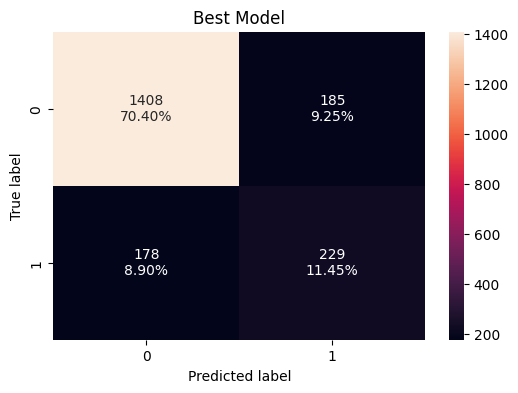

In [168]:
# adjust outputs
y_pred_test = model.predict(X_test)
y_pred_test = (y_pred_test > 0.5)
y_pred_train = model.predict(X_train_over)
y_pred_train = (y_pred_train > 0.5)

make_confusion_matrix("Best Model", y_test, y_pred_test)

In [170]:
show_scores_over(model)

{'Training Recall': 0.731896190874843,
 'Validation Recall': 0.75,
 'Training Precision': 0.8844208396560446,
 'Validation Precision': 0.46015037593984964,
 'Training F1 Score': 0.8009619789280806,
 'Validation F1 Score': 0.570363466915191}

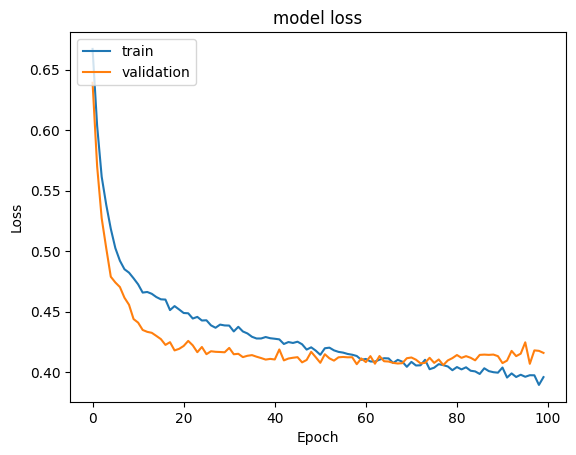

In [162]:
#Plotting Train Loss vs Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

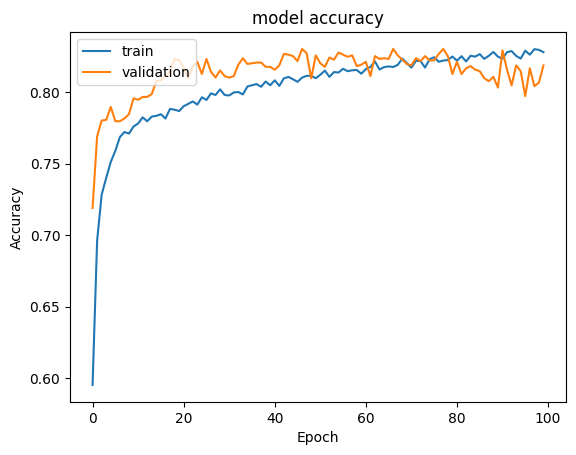

In [163]:
#Plotting Train accuracy vs Validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [164]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 48)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 112)            │         1,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 112)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           113 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,331 (13.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)